# **Website Behavior Analysis - A Supervised Learning Case study**

## **Problem**: 
The client is an online ecommerce player. They have shared a user level log data for their browsing behavior (Timestamp, UserId and website section visited). You have been provided with the final conversion data too (Timestamp, UserID, Products Purchased in the transaction, Overall Cart Value).

**Task**: Based on this data you are required to build features and model on
these characteristics of users to calculate a score/rank for conversion
probability of that user. These scores will eventually decide the bidding logic used for each user. Your model will be evaluated on these criteria: - \
a. Feature Engineering (Variable Imputation) \
b. Model Selection Criteria (Basis of choosing the final Technique) \
c. Measurement Criteria (Comparison of Various Models) \
d. Scope for improvement \

**Data**

Timestamp - Time duration of customer using the website \
UserID - User if of the customer \
Website_section_visited - Website sections visited by the user \
Products_Purchased - Product purchased by the user \
Cart_Value - cart value of each customers \

**Objective:**

To build a predictive regression model which predict the probability of a user buying a product, based on the characteristics of user observed from the website browsing history data.




## **Solution Approach**

1. Data Gathering 
2. Data Cleaning 
3. Feature Engineering / Feature Construction
4. Feature selection
5. Feature scaling
6. Model Building
7. Model Performance Evaluation
8. Model evaluation
9. Feature scope


### **Importing required libraries**

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

### **Read the data**  use with Google Colab

In [152]:
#data = pd.read_csv("/content/drive/MyDrive/websiteAnalysis/Problem2_Site_BrowingBehavior",delimiter='\t',names=['Timestamp', 'UserID','Website_section_visited'],header=None)
#data.drop_duplicates(inplace=True)

In [153]:
#finalConversion = pd.read_csv("/content/drive/MyDrive/websiteAnalysis/Problem2_FInalConversions",delimiter='\t',header=None)
#finalConversion.columns = ['Timestamp','UserID','Products_Purchased','Cart_Value']
#finalConversion.drop_duplicates(inplace=True)

## Use with jupyter notebook only

In [154]:
data = pd.read_csv(r'.\datasets\Problem2_Site_BrowingBehavior',delimiter='\t',names=['Timestamp', 'UserID','Website_section_visited'],header=None)
data.drop_duplicates(inplace=True)

In [155]:
finalConversion = pd.read_csv(r'.\datasets\Problem2_FInalConversions',delimiter='\t',header=None)
finalConversion.columns = ['Timestamp','UserID','Products_Purchased','Cart_Value']
finalConversion.drop_duplicates(inplace=True)

In [156]:
finalConversion.isnull().sum()

Timestamp             0
UserID                0
Products_Purchased    0
Cart_Value            0
dtype: int64

### **Viewing the data1**

In [157]:
data.head()

,Timestamp,UserID,Website_section_visited
0,2017-07-26 00:01:40.965,0,product
1,2017-07-26 00:03:18.448,0,product
2,2017-07-26 00:36:59.028,0,default
3,2017-07-26 00:41:17.273,0,product-listing-category
4,2017-07-26 00:45:39.197,0,content


In [158]:
data.shape

(5523793, 3)

In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5523793 entries, 0 to 5535923
Data columns (total 3 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   Timestamp                object
 1   UserID                   int64 
 2   Website_section_visited  object
dtypes: int64(1), object(2)
memory usage: 168.6+ MB


#### **Looking at the into of the data, there is no missing values in the data**

### **Viewing the data2**

In [160]:
finalConversion.head()

,Timestamp,UserID,Products_Purchased,Cart_Value
0,2017-07-26 00:00:10.465,0,A293532,52.14
1,2017-07-26 00:00:12.301,0,H209597,31.50
2,2017-07-26 00:00:12.388,0,H211370,30.48
3,2017-07-26 00:00:14.389,0,A282331,51.00
4,2017-07-26 00:00:16.837,0,H211410,16.74


In [161]:
finalConversion.shape

(79694, 4)

In [162]:
finalConversion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79694 entries, 0 to 79794
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Timestamp           79694 non-null  object 
 1   UserID              79694 non-null  int64  
 2   Products_Purchased  79694 non-null  object 
 3   Cart_Value          79694 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.0+ MB


#### **Looking at the into of the data, there is no missing values in the data**

## **EDA**

In [163]:
data.head()

,Timestamp,UserID,Website_section_visited
0,2017-07-26 00:01:40.965,0,product
1,2017-07-26 00:03:18.448,0,product
2,2017-07-26 00:36:59.028,0,default
3,2017-07-26 00:41:17.273,0,product-listing-category
4,2017-07-26 00:45:39.197,0,content


In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5523793 entries, 0 to 5535923
Data columns (total 3 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   Timestamp                object
 1   UserID                   int64 
 2   Website_section_visited  object
dtypes: int64(1), object(2)
memory usage: 168.6+ MB


In [165]:
## checkign for null values
data.isnull().sum()

Timestamp                  0
UserID                     0
Website_section_visited    0
dtype: int64

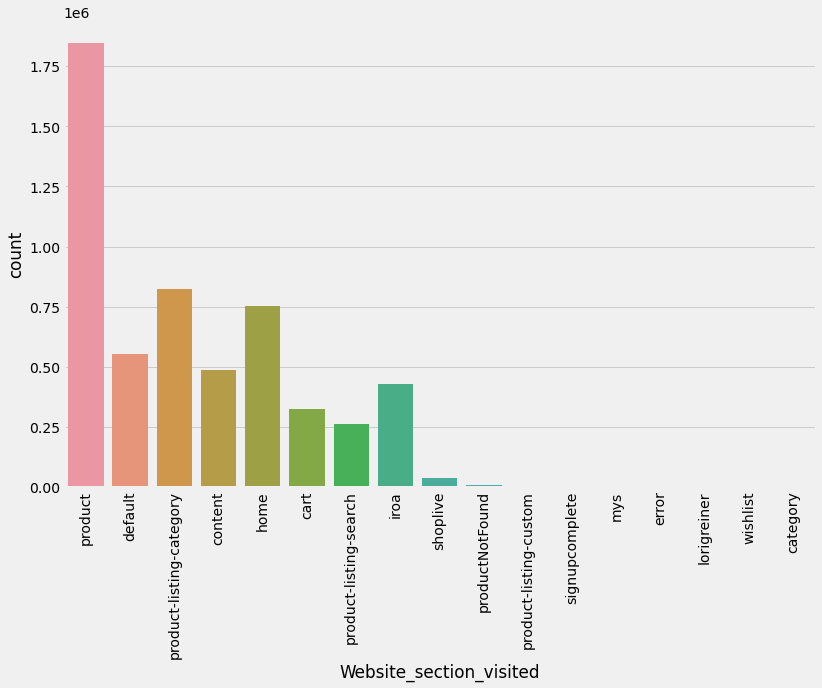

In [166]:
## Plot Website section visited
#sns.color_palette("crest", as_cmap=True)
plt.figure(figsize=(12,8))
sns.countplot(data['Website_section_visited'])
plt.xticks(rotation=90)
plt.show()


In [167]:
## Most visited page - > Product
data['Website_section_visited'].value_counts()

product                     1847953
product-listing-category     821829
home                         751095
default                      551408
content                      488322
iroa                         428241
cart                         323056
product-listing-search       262340
shoplive                      35806
productNotFound                9333
product-listing-custom         2970
signupcomplete                 1312
mys                              63
error                            60
lorigreiner                       3
category                          1
wishlist                          1
Name: Website_section_visited, dtype: int64

**Note** that the most visited section -> product

In [168]:
data['UserID'].value_counts()

0                      1395827
3077341700699443780       3106
7190685980615725949        821
1215902060999829238        723
7188604889406730572        550
                        ...   
5791830846361718036          1
8482326564935275425          1
6591960640183431757          1
4095484388804611166          1
2963422700178562967          1
Name: UserID, Length: 516932, dtype: int64

- **Note** - The frequency of guest user visiting the site is higher 

In [169]:
## how many times a user visited the site

site_login = data.groupby('UserID')['Website_section_visited'].agg(['count']).reindex()
site_login = site_login.reset_index()
site_login.columns = ['UserID_x','No_of_time_visited']
site_login.drop_duplicates(inplace=True)
site_login

,UserID_x,No_of_time_visited
0,0,1395827
1,2,15
2,5,2
3,342391,7
4,420372,2
...,...,...
516927,9223331925947099393,1
516928,9223332159306941752,5
516929,9223343967635174542,8
516930,9223348075878229938,5


## Merging two data sets

In [170]:
final_data = pd.merge(finalConversion,data,left_index=True,right_index=True)
final_data.head()

,Timestamp_x,UserID_x,Products_Purchased,Cart_Value,Timestamp_y,UserID_y,Website_section_visited
0,2017-07-26 00:00:10.465,0,A293532,52.14,2017-07-26 00:01:40.965,0,product
1,2017-07-26 00:00:12.301,0,H209597,31.50,2017-07-26 00:03:18.448,0,product
2,2017-07-26 00:00:12.388,0,H211370,30.48,2017-07-26 00:36:59.028,0,default
3,2017-07-26 00:00:14.389,0,A282331,51.00,2017-07-26 00:41:17.273,0,product-listing-category
4,2017-07-26 00:00:16.837,0,H211410,16.74,2017-07-26 00:45:39.197,0,content


In [171]:
final_data.drop(columns=['UserID_y'],inplace=True, axis =1)

In [172]:
final_data

,Timestamp_x,UserID_x,Products_Purchased,Cart_Value,Timestamp_y,Website_section_visited
0,2017-07-26 00:00:10.465,0,A293532,52.14,2017-07-26 00:01:40.965,product
1,2017-07-26 00:00:12.301,0,H209597,31.50,2017-07-26 00:03:18.448,product
2,2017-07-26 00:00:12.388,0,H211370,30.48,2017-07-26 00:36:59.028,default
3,2017-07-26 00:00:14.389,0,A282331,51.00,2017-07-26 00:41:17.273,product-listing-category
4,2017-07-26 00:00:16.837,0,H211410,16.74,2017-07-26 00:45:39.197,content
...,...,...,...,...,...,...
79790,2017-07-26 23:09:08.202,9174973170462435039,K45766,89.96,2017-07-26 00:39:14.899,home
79791,2017-07-26 23:44:19.505,9179943977593655876,V34738,24.66,2017-07-26 00:39:14.909,content
79792,2017-07-26 23:53:15.661,9179943977593655876,H210000,21.64,2017-07-26 00:39:14.944,home
79793,2017-07-26 23:13:02.55,9211905364441411643,A209343,73.00,2017-07-26 00:39:15.161,product


In [173]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78450 entries, 0 to 79794
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp_x              78450 non-null  object 
 1   UserID_x                 78450 non-null  int64  
 2   Products_Purchased       78450 non-null  object 
 3   Cart_Value               78450 non-null  float64
 4   Timestamp_y              78450 non-null  object 
 5   Website_section_visited  78450 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.2+ MB


In [174]:
## Change the timstap to datatime formate

df_final = final_data.copy()
df_final.head()

,Timestamp_x,UserID_x,Products_Purchased,Cart_Value,Timestamp_y,Website_section_visited
0,2017-07-26 00:00:10.465,0,A293532,52.14,2017-07-26 00:01:40.965,product
1,2017-07-26 00:00:12.301,0,H209597,31.50,2017-07-26 00:03:18.448,product
2,2017-07-26 00:00:12.388,0,H211370,30.48,2017-07-26 00:36:59.028,default
3,2017-07-26 00:00:14.389,0,A282331,51.00,2017-07-26 00:41:17.273,product-listing-category
4,2017-07-26 00:00:16.837,0,H211410,16.74,2017-07-26 00:45:39.197,content


In [175]:
final_data['Timestamp_x'] = pd.to_datetime(final_data['Timestamp_x'])
final_data['Timestamp_y'] = pd.to_datetime(final_data['Timestamp_y'])

In [176]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78450 entries, 0 to 79794
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Timestamp_x              78450 non-null  datetime64[ns]
 1   UserID_x                 78450 non-null  int64         
 2   Products_Purchased       78450 non-null  object        
 3   Cart_Value               78450 non-null  float64       
 4   Timestamp_y              78450 non-null  datetime64[ns]
 5   Website_section_visited  78450 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [177]:
## Caluculate time spend by a user in the section
import datetime
from datetime import timedelta

def find_time_spent(df):
    diff = df['Timestamp_x'] - df['Timestamp_y']
    tol_sec = diff.total_seconds()
    return(abs(tol_sec/60))


In [178]:
final_data['Total_minutes_spent'] = final_data.apply(find_time_spent,axis=1)
final_data

,Timestamp_x,UserID_x,Products_Purchased,Cart_Value,Timestamp_y,Website_section_visited,Total_minutes_spent
0,2017-07-26 00:00:10.465,0,A293532,52.14,2017-07-26 00:01:40.965,product,1.508333
1,2017-07-26 00:00:12.301,0,H209597,31.50,2017-07-26 00:03:18.448,product,3.102450
2,2017-07-26 00:00:12.388,0,H211370,30.48,2017-07-26 00:36:59.028,default,36.777333
3,2017-07-26 00:00:14.389,0,A282331,51.00,2017-07-26 00:41:17.273,product-listing-category,41.048067
4,2017-07-26 00:00:16.837,0,H211410,16.74,2017-07-26 00:45:39.197,content,45.372667
...,...,...,...,...,...,...,...
79790,2017-07-26 23:09:08.202,9174973170462435039,K45766,89.96,2017-07-26 00:39:14.899,home,1349.888383
79791,2017-07-26 23:44:19.505,9179943977593655876,V34738,24.66,2017-07-26 00:39:14.909,content,1385.076600
79792,2017-07-26 23:53:15.661,9179943977593655876,H210000,21.64,2017-07-26 00:39:14.944,home,1394.011950
79793,2017-07-26 23:13:02.550,9211905364441411643,A209343,73.00,2017-07-26 00:39:15.161,product,1353.789817


In [179]:
final_data.drop(columns=['Timestamp_x','Timestamp_y'],inplace=True,axis=1)
final_data.head()

,UserID_x,Products_Purchased,Cart_Value,Website_section_visited,Total_minutes_spent
0,0,A293532,52.14,product,1.508333
1,0,H209597,31.50,product,3.102450
2,0,H211370,30.48,default,36.777333
3,0,A282331,51.00,product-listing-category,41.048067
4,0,H211410,16.74,content,45.372667


In [180]:
df_final = final_data.copy()
df_final.head()

,UserID_x,Products_Purchased,Cart_Value,Website_section_visited,Total_minutes_spent
0,0,A293532,52.14,product,1.508333
1,0,H209597,31.50,product,3.102450
2,0,H211370,30.48,default,36.777333
3,0,A282331,51.00,product-listing-category,41.048067
4,0,H211410,16.74,content,45.372667


In [181]:
final_data.UserID_x.value_counts()

0                      19872
6999042003656970156       30
559346213618742389        22
1536590739380574003       20
9050159186422090402       19
                       ...  
6266938063887181185        1
4172185978708975229        1
430176095021949425         1
2719634660157263439        1
1359101187505655169        1
Name: UserID_x, Length: 40553, dtype: int64

**Note**  There are 19872 guest users.

## **Feature Engineering**

Following new features are constructed using the existing feature
1. Total transaction by each user
2. Total Money spent by each user


#### **Total money spent by user**

In [182]:
## Total money spent by user
df_total_money_spent = final_data.groupby('UserID_x')['Cart_Value'].agg(['sum']).reindex(final_data['UserID_x']).reset_index()
df_total_money_spent.columns = ['UserID_x','Total_cart_value']
df_total_money_spent.drop_duplicates(inplace=True)
df_total_money_spent

,UserID_x,Total_cart_value
0,0,1354720.87
538,5942997097932061,157.95
539,23951842225160889,60.96
541,30833658052409950,216.12
542,33873861847792934,53.24
...,...,...
78440,9138020064668426621,38.68
78441,9138678094731427197,42.72
78442,9162285675244079016,104.28
78444,9168488389924043940,35.48


**Note** - Guest users have higher cart values

#### **Number of product purchased by user**

In [183]:
## Total transactiont by user
df_total_product_purchased = final_data.groupby('UserID_x')['Cart_Value'].agg(['count']).reindex(final_data['UserID_x']).reset_index()
df_total_product_purchased.columns = ['UserID_x','Total_products_purchased']
df_total_product_purchased.drop_duplicates(inplace=True)
df_total_product_purchased

,UserID_x,Total_products_purchased
0,0,19872
538,5942997097932061,1
539,23951842225160889,2
541,30833658052409950,5
542,33873861847792934,1
...,...,...
78440,9138020064668426621,1
78441,9138678094731427197,1
78442,9162285675244079016,2
78444,9168488389924043940,1


**Note** - guest user has purchased more number of products

In [184]:
final_data.drop_duplicates(subset='UserID_x',keep='first',inplace=True)

In [185]:
final_data

,UserID_x,Products_Purchased,Cart_Value,Website_section_visited,Total_minutes_spent
0,0,A293532,52.14,product,1.508333
548,5942997097932061,K43931,157.95,product,0.449517
549,23951842225160889,H211370,33.48,product-listing-search,26.025000
551,30833658052409950,H211394,44.68,content,54.915333
552,33873861847792934,H211800,53.24,product,10.063067
...,...,...,...,...,...
79785,9138020064668426621,A282215,38.68,product-listing-category,1375.294917
79786,9138678094731427197,A280809,42.72,iroa,1393.450650
79787,9162285675244079016,A293532,52.14,product,1394.943733
79789,9168488389924043940,K45797,35.48,product,1373.752567


In [186]:
df_final = final_data.copy()
df_final.head()

,UserID_x,Products_Purchased,Cart_Value,Website_section_visited,Total_minutes_spent
0,0,A293532,52.14,product,1.508333
548,5942997097932061,K43931,157.95,product,0.449517
549,23951842225160889,H211370,33.48,product-listing-search,26.025000
551,30833658052409950,H211394,44.68,content,54.915333
552,33873861847792934,H211800,53.24,product,10.063067


In [187]:
final_data = df_final

In [188]:
## Merge all datasets
final_data = pd.merge(final_data,site_login,left_index=True,right_index=True)

In [189]:
final_data

,UserID_x_x,Products_Purchased,Cart_Value,Website_section_visited,Total_minutes_spent,UserID_x_y,No_of_time_visited
0,0,A293532,52.14,product,1.508333,0,1395827
548,5942997097932061,K43931,157.95,product,0.449517,8955734215328663,2
549,23951842225160889,H211370,33.48,product-listing-search,26.025000,8970123659292167,1
551,30833658052409950,H211394,44.68,content,54.915333,9012479228554889,1
552,33873861847792934,H211800,53.24,product,10.063067,9028446116519943,2
...,...,...,...,...,...,...,...
79785,9138020064668426621,A282215,38.68,product-listing-category,1375.294917,1424310519979112404,5
79786,9138678094731427197,A280809,42.72,iroa,1393.450650,1424336463281102006,2
79787,9162285675244079016,A293532,52.14,product,1394.943733,1424366067572593430,3
79789,9168488389924043940,K45797,35.48,product,1373.752567,1424397845890359822,4


In [190]:
final_data = pd.merge(final_data,df_total_money_spent,left_index=True,right_index=True)

In [191]:
final_data

,UserID_x_x,Products_Purchased,Cart_Value,Website_section_visited,Total_minutes_spent,UserID_x_y,No_of_time_visited,UserID_x,Total_cart_value
0,0,A293532,52.14,product,1.508333,0,1395827,0,1354720.87
548,5942997097932061,K43931,157.95,product,0.449517,8955734215328663,2,118244371903828712,198.56
549,23951842225160889,H211370,33.48,product-listing-search,26.025000,8970123659292167,1,125810344544952836,100.64
551,30833658052409950,H211394,44.68,content,54.915333,9012479228554889,1,130033468135455679,261.52
552,33873861847792934,H211800,53.24,product,10.063067,9028446116519943,2,141481290650206394,99.96
...,...,...,...,...,...,...,...,...,...
78435,5463465440582535638,K45915,276.95,default,1324.742467,1399730560133827333,3,9024991369683816348,21.14
78439,5530197553960848983,"K45766,K41372",110.44,content,1336.954717,1399775770129649102,3,9072453978507509223,154.52
78442,5664478520511423661,K45766,89.96,product,1298.123667,1399861628076062461,1,9162285675244079016,104.28
78444,5702442489318448220,H212471,69.34,iroa,1282.893550,1399943367386448073,88,9168488389924043940,35.48


In [192]:
final_data = pd.merge(final_data,df_total_product_purchased,left_index=True,right_index=True)

In [193]:
final_data

,UserID_x_x,Products_Purchased,Cart_Value,Website_section_visited,Total_minutes_spent,UserID_x_y,No_of_time_visited,UserID_x_x,Total_cart_value,UserID_x_y,Total_products_purchased
0,0,A293532,52.14,product,1.508333,0,1395827,0,1354720.87,0,19872
548,5942997097932061,K43931,157.95,product,0.449517,8955734215328663,2,118244371903828712,198.56,118244371903828712,5
549,23951842225160889,H211370,33.48,product-listing-search,26.025000,8970123659292167,1,125810344544952836,100.64,125810344544952836,3
551,30833658052409950,H211394,44.68,content,54.915333,9012479228554889,1,130033468135455679,261.52,130033468135455679,6
552,33873861847792934,H211800,53.24,product,10.063067,9028446116519943,2,141481290650206394,99.96,141481290650206394,1
...,...,...,...,...,...,...,...,...,...,...,...
78435,5463465440582535638,K45915,276.95,default,1324.742467,1399730560133827333,3,9024991369683816348,21.14,9024991369683816348,1
78439,5530197553960848983,"K45766,K41372",110.44,content,1336.954717,1399775770129649102,3,9072453978507509223,154.52,9072453978507509223,1
78442,5664478520511423661,K45766,89.96,product,1298.123667,1399861628076062461,1,9162285675244079016,104.28,9162285675244079016,2
78444,5702442489318448220,H212471,69.34,iroa,1282.893550,1399943367386448073,88,9168488389924043940,35.48,9168488389924043940,1


In [194]:
final_data.drop(columns=['UserID_x_x','UserID_x_y',],inplace=True,axis=1)

In [195]:
final_data

,Products_Purchased,Cart_Value,Website_section_visited,Total_minutes_spent,No_of_time_visited,Total_cart_value,Total_products_purchased
0,A293532,52.14,product,1.508333,1395827,1354720.87,19872
548,K43931,157.95,product,0.449517,2,198.56,5
549,H211370,33.48,product-listing-search,26.025000,1,100.64,3
551,H211394,44.68,content,54.915333,1,261.52,6
552,H211800,53.24,product,10.063067,2,99.96,1
...,...,...,...,...,...,...,...
78435,K45915,276.95,default,1324.742467,3,21.14,1
78439,"K45766,K41372",110.44,content,1336.954717,3,154.52,1
78442,K45766,89.96,product,1298.123667,1,104.28,2
78444,H212471,69.34,iroa,1282.893550,88,35.48,1


#### **We can drop some columns as they are correlated**

In [196]:
final_data.corr()

,Cart_Value,Total_minutes_spent,No_of_time_visited,Total_cart_value,Total_products_purchased
Cart_Value,1.000000,0.094835,-0.001279,-0.001248,-0.001448
Total_minutes_spent,0.094835,1.000000,-0.009314,-0.009548,-0.011061
No_of_time_visited,-0.001279,-0.009314,1.000000,0.999784,0.999966
Total_cart_value,-0.001248,-0.009548,0.999784,1.000000,0.999805
Total_products_purchased,-0.001448,-0.011061,0.999966,0.999805,1.000000


<AxesSubplot:>

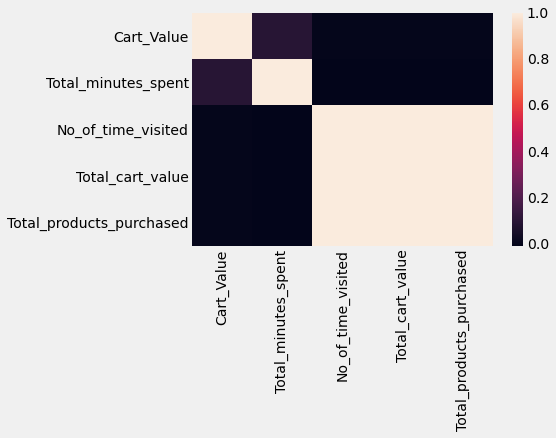

In [197]:
sns.heatmap(final_data.corr())

In [198]:
final_data.drop(columns=['Products_Purchased','Cart_Value','Website_section_visited'],inplace=True,axis=1)

In [199]:
final_data

,Total_minutes_spent,No_of_time_visited,Total_cart_value,Total_products_purchased
0,1.508333,1395827,1354720.87,19872
548,0.449517,2,198.56,5
549,26.025000,1,100.64,3
551,54.915333,1,261.52,6
552,10.063067,2,99.96,1
...,...,...,...,...
78435,1324.742467,3,21.14,1
78439,1336.954717,3,154.52,1
78442,1298.123667,1,104.28,2
78444,1282.893550,88,35.48,1


**Calulate Buy Probability**

In [200]:
final_data['Buy_Probability'] = (final_data['Total_products_purchased']/final_data['No_of_time_visited'])
final_data

,Total_minutes_spent,No_of_time_visited,Total_cart_value,Total_products_purchased,Buy_Probability
0,1.508333,1395827,1354720.87,19872,0.014237
548,0.449517,2,198.56,5,2.500000
549,26.025000,1,100.64,3,3.000000
551,54.915333,1,261.52,6,6.000000
552,10.063067,2,99.96,1,0.500000
...,...,...,...,...,...
78435,1324.742467,3,21.14,1,0.333333
78439,1336.954717,3,154.52,1,0.333333
78442,1298.123667,1,104.28,2,2.000000
78444,1282.893550,88,35.48,1,0.011364


**Calculate User Rank /Score**

In [201]:
final_data['User_rank'] = (final_data['Buy_Probability'] * final_data['Total_cart_value'])
final_data

,Total_minutes_spent,No_of_time_visited,Total_cart_value,Total_products_purchased,Buy_Probability,User_rank
0,1.508333,1395827,1354720.87,19872,0.014237,19286.783483
548,0.449517,2,198.56,5,2.500000,496.400000
549,26.025000,1,100.64,3,3.000000,301.920000
551,54.915333,1,261.52,6,6.000000,1569.120000
552,10.063067,2,99.96,1,0.500000,49.980000
...,...,...,...,...,...,...
78435,1324.742467,3,21.14,1,0.333333,7.046667
78439,1336.954717,3,154.52,1,0.333333,51.506667
78442,1298.123667,1,104.28,2,2.000000,208.560000
78444,1282.893550,88,35.48,1,0.011364,0.403182


#### The first row has guest user data, drop the first row

In [202]:
final_data.drop(final_data.index[0],inplace=True)
final_data

,Total_minutes_spent,No_of_time_visited,Total_cart_value,Total_products_purchased,Buy_Probability,User_rank
548,0.449517,2,198.56,5,2.500000,496.400000
549,26.025000,1,100.64,3,3.000000,301.920000
551,54.915333,1,261.52,6,6.000000,1569.120000
552,10.063067,2,99.96,1,0.500000,49.980000
553,14.423817,1,44.68,1,1.000000,44.680000
...,...,...,...,...,...,...
78435,1324.742467,3,21.14,1,0.333333,7.046667
78439,1336.954717,3,154.52,1,0.333333,51.506667
78442,1298.123667,1,104.28,2,2.000000,208.560000
78444,1282.893550,88,35.48,1,0.011364,0.403182


In [203]:
final_data.to_csv('.\datasets\Final_data.csv',index=False)

In [204]:
## distribution of data
from pandas_profiling import ProfileReport
profile = ProfileReport(final_data, title="Pandas Profiling Report")
profile.to_widgets()
profile.to_file("Web Browsing history.html")

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

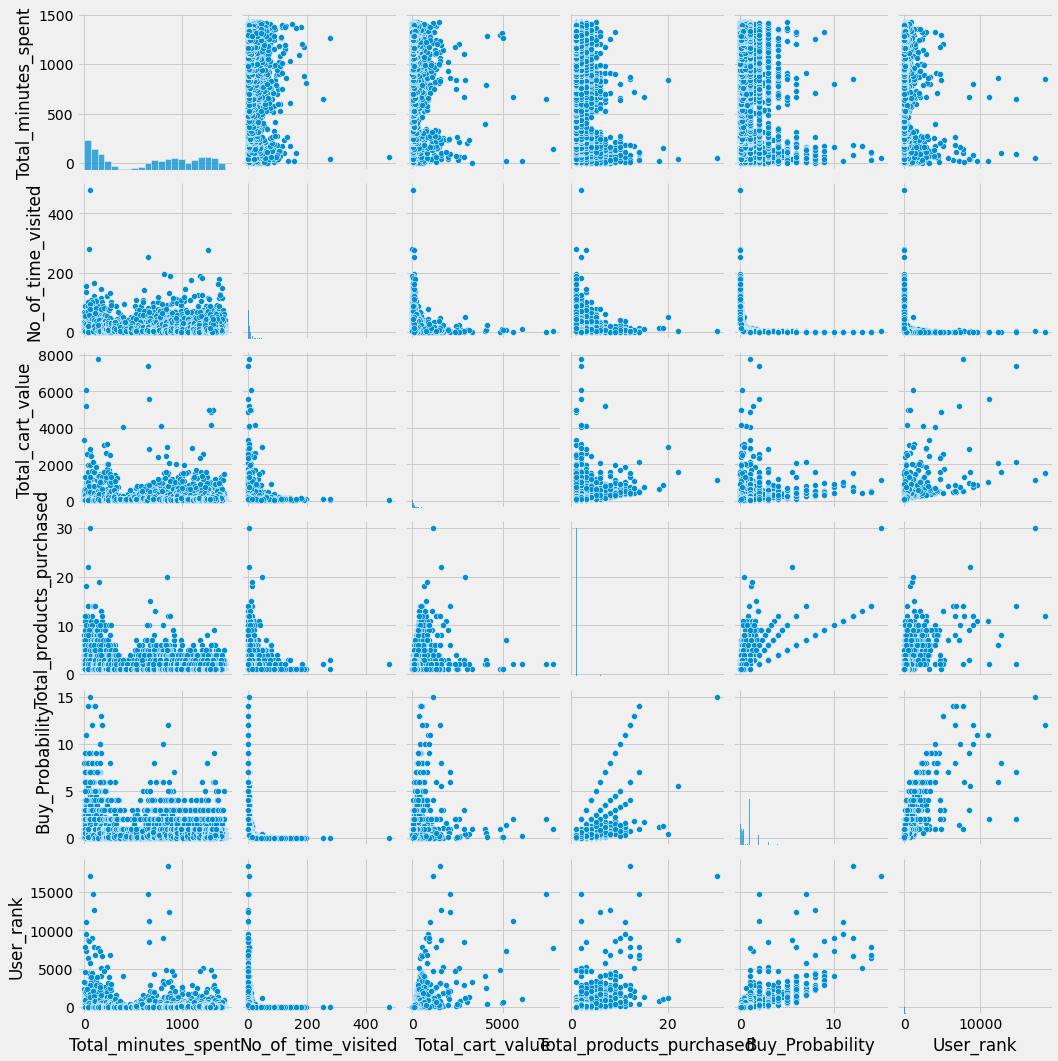

In [205]:
sns.pairplot(final_data)

##### We see sort of non linearity in the data. Buy_Probability of use has to be predicted. 
##### Aglorithms considered:
    - Randomforest 
    - XGboost

### Model Building

In [206]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [207]:
X = final_data.drop(['Buy_Probability'],axis=1)
y = final_data['Buy_Probability']

In [208]:
X

,Total_minutes_spent,No_of_time_visited,Total_cart_value,Total_products_purchased,User_rank
548,0.449517,2,198.56,5,496.400000
549,26.025000,1,100.64,3,301.920000
551,54.915333,1,261.52,6,1569.120000
552,10.063067,2,99.96,1,49.980000
553,14.423817,1,44.68,1,44.680000
...,...,...,...,...,...
78435,1324.742467,3,21.14,1,7.046667
78439,1336.954717,3,154.52,1,51.506667
78442,1298.123667,1,104.28,2,208.560000
78444,1282.893550,88,35.48,1,0.403182


In [209]:
y

548      2.500000
549      3.000000
551      6.000000
552      0.500000
553      1.000000
           ...   
78435    0.333333
78439    0.333333
78442    2.000000
78444    0.011364
78445    0.076923
Name: Buy_Probability, Length: 22111, dtype: float64

### Feature Scalling - Standardization


In [210]:
sc = StandardScaler()
X = sc.fit_transform(X)

### Splitting the data

In [211]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=10)

In [212]:
X_train.shape

(17688, 5)

In [213]:
X_test.shape

(4423, 5)

## Model Building with Randomforest

In [214]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

### Evaluate the model

In [215]:
from sklearn.metrics import mean_squared_error,r2_score

## predicting on train data
pred_train = rf.predict(X_train)

prediction_rf = pd.DataFrame({"Predicted":pred_train,"Actual":y_train},columns = ['Predicted','Actual'])

In [216]:
prediction_rf

,Predicted,Actual
2573,0.447478,0.444444
3497,0.200000,0.200000
72387,0.058824,0.058824
67393,0.498889,0.500000
47471,0.500000,0.500000
...,...,...
36227,0.333333,0.333333
29540,0.181162,0.181818
60123,1.000000,1.000000
29542,0.166667,0.166667


In [217]:
accuracy_rf = r2_score(y_train,pred_train)
accuracy_rf

0.9997000677641603

In [218]:
pred_test = rf.predict(X_test)

prediction_rf_test = pd.DataFrame({"Predicted":pred_test,"Actual":y_test},columns = ['Predicted','Actual'])

In [219]:
prediction_rf_test

,Predicted,Actual
44004,0.066933,0.066667
60071,0.050000,0.050000
40964,0.062405,0.062500
57263,0.333333,0.333333
40936,0.018864,0.018868
...,...,...
8216,1.500000,1.500000
54911,1.498333,1.500000
58824,0.142857,0.142857
71693,0.500000,0.500000


In [220]:
accuracy_rf_test = r2_score(y_test,pred_test)
accuracy_rf_test

0.9774291100586803

## Model evaluation Metrics

In [221]:
evl_metric_rf_train = pd.DataFrame({'Model':'RandomForest_train','RMSE':np.sqrt(mean_squared_error(y_train,pred_train)),
                                    "MAE":mean_squared_error(y_train,pred_train),
                                   "R2_score":r2_score(y_train,pred_train)},columns=['Model','RMSE','MAE','R2_score'],index=[0])

In [222]:
evl_metric_rf_test = pd.DataFrame({'Model':'RandomForest_test','RMSE':np.sqrt(mean_squared_error(y_test,pred_test)),
                                    "MAE":mean_squared_error(y_test,pred_test),
                                   "R2_score":r2_score(y_test,pred_test)},columns=['Model','RMSE','MAE','R2_score'],index=[0])

In [223]:
evl_metric_rf_test

,Model,RMSE,MAE,R2_score
0,RandomForest_test,0.128483,0.016508,0.977429


In [224]:
rf_model_metric_no_tuning = pd.concat([evl_metric_rf_train,evl_metric_rf_test],ignore_index=True)

In [225]:
rf_model_metric_no_tuning

,Model,RMSE,MAE,R2_score
0,RandomForest_train,0.013958,0.000195,0.999700
1,RandomForest_test,0.128483,0.016508,0.977429


#### **Note**  we clearly see randomforest is overfitting.

### Hyperparameter Tuning RandomForest

In [227]:
from sklearn.model_selection import GridSearchCV

n_estimators = [150,200,250,300,400]
max_features = ['auto','sqrt']
max_depth = [10,15,20,25,10]
min_samples_split =[5,10,15,20,25]
min_samples_leaf = [1,2,3,4,5]
bootstrap = [True,False]

param = {'n_estimators':n_estimators,
        'max_features':max_features,
        'max_depth':max_depth,
        'min_samples_split':min_samples_split,
        'min_samples_leaf':min_sample_leaf,
        'bootstrap':bootstrap}

gridseach_cv_rf = GridSearchCV(rf,param_grid=param,cv=5,verbose=3)
gridseach_cv_rf.fit(X_train,y_train)

Fitting 5 folds for each of 2500 candidates, totalling 12500 fits
[CV 1/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.995 total time=   2.7s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.999 total time=   2.5s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.998 total time=   2.6s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.997 total time=   2.6s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.993 total time=   2.6s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.996 total time=   3.5s
[CV 2/5] END boo

[CV 4/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=150;, score=0.989 total time=   3.1s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=150;, score=0.987 total time=   3.1s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=200;, score=0.992 total time=   4.0s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=200;, score=0.995 total time=   3.8s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=200;, score=0.990 total time=   3.8s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=200;, score=0.990 total time=   3.9s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_le

[CV 3/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=25, n_estimators=200;, score=0.986 total time=   3.8s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=25, n_estimators=200;, score=0.987 total time=   3.8s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=25, n_estimators=200;, score=0.981 total time=   3.8s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=25, n_estimators=250;, score=0.988 total time=   4.8s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=25, n_estimators=250;, score=0.991 total time=   4.7s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=25, n_estimators=250;, score=0.986 total time=   4.8s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_le

[CV 2/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=250;, score=0.997 total time=   5.1s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=250;, score=0.995 total time=   4.8s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=250;, score=0.993 total time=   4.7s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=250;, score=0.990 total time=   5.0s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300;, score=0.993 total time=   5.9s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300;, score=0.997 total time=   6.0s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_le

[CV 1/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=300;, score=0.990 total time=   6.6s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=300;, score=0.994 total time=   6.3s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=300;, score=0.988 total time=   5.9s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=300;, score=0.987 total time=   5.9s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=300;, score=0.982 total time=   6.7s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=400;, score=0.990 total time=  10.6s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_le

[CV 5/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=300;, score=0.993 total time=   6.2s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=400;, score=0.994 total time=   8.2s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=400;, score=0.998 total time=   8.2s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=400;, score=0.996 total time=  11.5s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=400;, score=0.995 total time=   8.7s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=400;, score=0.992 total time=   8.5s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, 

[CV 4/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=15, n_estimators=400;, score=0.989 total time=   7.8s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=15, n_estimators=400;, score=0.986 total time=   7.8s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=150;, score=0.991 total time=   3.0s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=150;, score=0.994 total time=   2.8s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=150;, score=0.987 total time=   2.8s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=150;, score=0.987 total time=   3.0s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_le

[CV 3/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=150;, score=0.991 total time=   2.8s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=150;, score=0.993 total time=   2.8s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=150;, score=0.988 total time=   3.0s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.993 total time=   4.2s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.998 total time=   4.0s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.993 total time=   3.9s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, 

[CV 2/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=200;, score=0.995 total time=   4.3s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=200;, score=0.988 total time=   4.0s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=200;, score=0.989 total time=   3.9s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=200;, score=0.983 total time=   3.8s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=250;, score=0.991 total time=   5.1s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=250;, score=0.996 total time=   5.0s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_le

[CV 1/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=25, n_estimators=250;, score=0.988 total time=   4.8s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=25, n_estimators=250;, score=0.991 total time=   4.8s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=25, n_estimators=250;, score=0.984 total time=   4.6s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=25, n_estimators=250;, score=0.986 total time=   4.6s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=25, n_estimators=250;, score=0.979 total time=   4.9s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=25, n_estimators=300;, score=0.989 total time=   5.8s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_le

[CV 5/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=250;, score=0.987 total time=   5.0s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=300;, score=0.992 total time=   5.9s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=300;, score=0.997 total time=   6.1s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=300;, score=0.990 total time=   5.9s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=300;, score=0.991 total time=   5.8s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=300;, score=0.986 total time=   5.9s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_le

[CV 4/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=300;, score=0.987 total time=   5.9s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=300;, score=0.980 total time=   6.1s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=400;, score=0.990 total time=   7.9s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=400;, score=0.993 total time=   8.0s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=400;, score=0.983 total time=   7.9s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=400;, score=0.987 total time=   7.6s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_le

[CV 3/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=0.992 total time=   4.1s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=0.995 total time=   4.0s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=0.996 total time=   3.9s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=150;, score=0.992 total time=   1.5s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=150;, score=0.994 total time=   1.4s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=150;, score=0.989 total time=   1.4s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=

[CV 2/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=150;, score=0.989 total time=   1.7s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=150;, score=0.979 total time=   1.5s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=150;, score=0.986 total time=   1.5s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=150;, score=0.987 total time=   1.5s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=200;, score=0.988 total time=   2.0s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=200;, score=0.988 total time=   2.0s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_le

[CV 1/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.995 total time=   2.1s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.996 total time=   2.2s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.991 total time=   2.1s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.994 total time=   2.1s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.995 total time=   1.9s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=250;, score=0.995 total time=   2.5s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, 

[CV 5/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200;, score=0.989 total time=   1.9s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=250;, score=0.990 total time=   2.7s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=250;, score=0.992 total time=   2.5s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=250;, score=0.983 total time=   2.5s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=250;, score=0.989 total time=   2.5s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=250;, score=0.989 total time=   2.4s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_le

[CV 4/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=25, n_estimators=250;, score=0.985 total time=   2.4s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=25, n_estimators=250;, score=0.983 total time=   2.5s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=25, n_estimators=300;, score=0.985 total time=   2.9s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=25, n_estimators=300;, score=0.988 total time=   2.9s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=25, n_estimators=300;, score=0.977 total time=   3.0s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=25, n_estimators=300;, score=0.984 total time=   2.8s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_le

[CV 3/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=300;, score=0.986 total time=   3.1s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=300;, score=0.989 total time=   3.1s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=300;, score=0.990 total time=   3.2s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=400;, score=0.993 total time=   4.4s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=400;, score=0.993 total time=   4.1s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=400;, score=0.985 total time=   4.2s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_le

[CV 2/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=20, n_estimators=400;, score=0.990 total time=   4.4s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=20, n_estimators=400;, score=0.978 total time=   4.4s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=20, n_estimators=400;, score=0.985 total time=   4.4s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=20, n_estimators=400;, score=0.986 total time=   4.5s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=25, n_estimators=150;, score=0.986 total time=   1.5s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=25, n_estimators=150;, score=0.988 total time=   1.8s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_le

[CV 1/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150;, score=0.992 total time=   1.5s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150;, score=0.992 total time=   1.5s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150;, score=0.982 total time=   1.5s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150;, score=0.988 total time=   1.5s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150;, score=0.990 total time=   1.5s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.992 total time=   2.1s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_le

[CV 5/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=150;, score=0.986 total time=   1.4s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=200;, score=0.987 total time=   2.0s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=200;, score=0.989 total time=   1.8s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=200;, score=0.976 total time=   2.0s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=200;, score=0.986 total time=   2.0s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=200;, score=0.986 total time=   1.9s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_le

[CV 4/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=0.987 total time=   1.9s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=0.989 total time=   1.9s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=250;, score=0.991 total time=   2.5s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=250;, score=0.992 total time=   2.4s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=250;, score=0.982 total time=   2.6s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=250;, score=0.988 total time=   2.6s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, 

[CV 3/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=250;, score=0.979 total time=   2.6s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=250;, score=0.985 total time=   2.5s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=250;, score=0.987 total time=   2.6s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=300;, score=0.989 total time=   3.0s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=300;, score=0.990 total time=   3.0s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=300;, score=0.979 total time=   3.0s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_le

[CV 2/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=25, n_estimators=300;, score=0.987 total time=   3.0s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=25, n_estimators=300;, score=0.973 total time=   2.9s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=25, n_estimators=300;, score=0.983 total time=   3.0s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=25, n_estimators=300;, score=0.982 total time=   3.1s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=25, n_estimators=400;, score=0.984 total time=   3.9s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=25, n_estimators=400;, score=0.987 total time=   4.1s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_le

[CV 1/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=0.992 total time=   8.2s
[CV 2/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=0.997 total time=   8.3s
[CV 3/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=0.996 total time=   8.1s
[CV 4/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=0.993 total time=   8.1s
[CV 5/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=0.991 total time=   8.4s
[CV 1/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=150;, score=0.990 total time=   2.9s
[CV 2/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_le

[CV 5/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=400;, score=0.983 total time=   8.1s
[CV 1/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=25, n_estimators=150;, score=0.990 total time=   2.8s
[CV 2/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=25, n_estimators=150;, score=0.992 total time=   2.9s
[CV 3/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=25, n_estimators=150;, score=0.987 total time=   2.9s
[CV 4/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=25, n_estimators=150;, score=0.986 total time=   2.8s
[CV 5/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=25, n_estimators=150;, score=0.980 total time=   3.0s
[CV 1/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_le

[CV 4/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.993 total time=   3.2s
[CV 5/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.989 total time=   3.3s
[CV 1/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.993 total time=   4.7s
[CV 2/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.997 total time=   4.3s
[CV 3/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.995 total time=   4.2s
[CV 4/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.993 total time=   4.8s
[CV 5/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_le

[CV 3/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=200;, score=0.988 total time=   5.2s
[CV 4/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=200;, score=0.988 total time=   5.0s
[CV 5/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=200;, score=0.983 total time=   5.0s
[CV 1/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=250;, score=0.990 total time=   6.2s
[CV 2/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=250;, score=0.994 total time=   6.3s
[CV 3/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=250;, score=0.988 total time=   5.8s
[CV 4/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_le

[CV 2/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=250;, score=0.998 total time=   5.8s
[CV 3/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=250;, score=0.995 total time=   5.7s
[CV 4/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=250;, score=0.995 total time=   5.6s
[CV 5/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=250;, score=0.992 total time=   5.9s
[CV 1/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=300;, score=0.994 total time=   7.4s
[CV 2/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=300;, score=0.998 total time=   7.3s
[CV 3/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=3, 

[CV 1/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=15, n_estimators=300;, score=0.993 total time=   7.4s
[CV 2/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=15, n_estimators=300;, score=0.995 total time=   7.6s
[CV 3/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=15, n_estimators=300;, score=0.989 total time=   7.5s
[CV 4/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=15, n_estimators=300;, score=0.989 total time=   7.5s
[CV 5/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=15, n_estimators=300;, score=0.986 total time=   8.2s
[CV 1/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=15, n_estimators=400;, score=0.991 total time=  10.1s
[CV 2/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_le

[CV 5/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=25, n_estimators=300;, score=0.979 total time=   7.8s
[CV 1/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=25, n_estimators=400;, score=0.989 total time=  10.8s
[CV 2/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=25, n_estimators=400;, score=0.991 total time=  11.2s
[CV 3/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=25, n_estimators=400;, score=0.985 total time=  11.1s
[CV 4/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=25, n_estimators=400;, score=0.987 total time=  10.6s
[CV 5/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=25, n_estimators=400;, score=0.980 total time=  10.6s
[CV 1/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_le

[CV 4/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400;, score=0.992 total time=  11.3s
[CV 5/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400;, score=0.987 total time=  11.6s
[CV 1/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=150;, score=0.993 total time=   4.1s
[CV 2/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=150;, score=0.995 total time=   4.3s
[CV 3/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=150;, score=0.988 total time=   4.3s
[CV 4/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=150;, score=0.989 total time=   4.2s
[CV 5/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_le

[CV 3/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=25, n_estimators=150;, score=0.984 total time=   3.2s
[CV 4/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=25, n_estimators=150;, score=0.986 total time=   3.1s
[CV 5/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=25, n_estimators=150;, score=0.977 total time=   3.2s
[CV 1/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=25, n_estimators=200;, score=0.989 total time=   4.3s
[CV 2/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=25, n_estimators=200;, score=0.991 total time=   4.5s
[CV 3/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=25, n_estimators=200;, score=0.985 total time=   4.2s
[CV 4/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_le

[CV 2/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.996 total time=   4.6s
[CV 3/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.990 total time=   4.6s
[CV 4/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.991 total time=   4.6s
[CV 5/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.986 total time=   4.8s
[CV 1/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=250;, score=0.993 total time=   5.9s
[CV 2/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=250;, score=0.996 total time=   6.0s
[CV 3/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_le

[CV 1/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=250;, score=0.991 total time=   6.4s
[CV 2/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=250;, score=0.994 total time=   6.1s
[CV 3/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=250;, score=0.985 total time=   6.2s
[CV 4/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=250;, score=0.987 total time=   5.9s
[CV 5/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=250;, score=0.979 total time=   6.3s
[CV 1/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=300;, score=0.990 total time=   7.4s
[CV 2/5] END bootstrap=True, max_depth=15, max_features=auto, min_samples_le

[CV 5/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=250;, score=0.996 total time=   3.7s
[CV 1/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=0.995 total time=   4.5s
[CV 2/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=0.996 total time=   4.4s
[CV 3/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=0.992 total time=   4.9s
[CV 4/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=0.995 total time=   4.4s
[CV 5/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=0.995 total time=   4.3s
[CV 1/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, 

[CV 4/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300;, score=0.989 total time=   5.1s
[CV 5/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300;, score=0.990 total time=   4.9s
[CV 1/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=400;, score=0.990 total time=   6.3s
[CV 2/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=400;, score=0.992 total time=   6.5s
[CV 3/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=400;, score=0.982 total time=   6.5s
[CV 4/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=400;, score=0.989 total time=   6.4s
[CV 5/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_le

[CV 3/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=25, n_estimators=400;, score=0.976 total time=   5.2s
[CV 4/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=25, n_estimators=400;, score=0.984 total time=   4.8s
[CV 5/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=25, n_estimators=400;, score=0.985 total time=   5.1s
[CV 1/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.995 total time=   2.0s
[CV 2/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.996 total time=   2.0s
[CV 3/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.989 total time=   2.2s
[CV 4/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=

[CV 2/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=150;, score=0.990 total time=   2.6s
[CV 3/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=150;, score=0.980 total time=   2.3s
[CV 4/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=150;, score=0.988 total time=   2.3s
[CV 5/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=150;, score=0.989 total time=   2.4s
[CV 1/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200;, score=0.990 total time=   3.1s
[CV 2/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200;, score=0.990 total time=   3.4s
[CV 3/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_le

[CV 1/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=25, n_estimators=200;, score=0.986 total time=   3.3s
[CV 2/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=25, n_estimators=200;, score=0.988 total time=   3.4s
[CV 3/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=25, n_estimators=200;, score=0.977 total time=   3.3s
[CV 4/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=25, n_estimators=200;, score=0.983 total time=   3.3s
[CV 5/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=25, n_estimators=200;, score=0.984 total time=   3.3s
[CV 1/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=25, n_estimators=250;, score=0.986 total time=   4.1s
[CV 2/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_le

[CV 5/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.991 total time=   2.8s
[CV 1/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=250;, score=0.993 total time=   3.5s
[CV 2/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=250;, score=0.993 total time=   3.5s
[CV 3/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=250;, score=0.985 total time=   3.8s
[CV 4/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=250;, score=0.989 total time=   3.6s
[CV 5/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=250;, score=0.992 total time=   3.4s
[CV 1/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_le

[CV 4/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=20, n_estimators=250;, score=0.985 total time=   3.5s
[CV 5/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=20, n_estimators=250;, score=0.986 total time=   3.4s
[CV 1/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=20, n_estimators=300;, score=0.988 total time=   4.0s
[CV 2/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=20, n_estimators=300;, score=0.989 total time=   3.9s
[CV 3/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=20, n_estimators=300;, score=0.979 total time=   4.1s
[CV 4/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=20, n_estimators=300;, score=0.986 total time=   3.9s
[CV 5/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_le

[CV 3/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300;, score=0.985 total time=   3.6s
[CV 4/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300;, score=0.990 total time=   3.8s
[CV 5/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300;, score=0.991 total time=   3.7s
[CV 1/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400;, score=0.993 total time=   4.9s
[CV 2/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400;, score=0.994 total time=   5.1s
[CV 3/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400;, score=0.985 total time=   5.1s
[CV 4/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=4, 

[CV 2/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=400;, score=0.990 total time=   4.7s
[CV 3/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=400;, score=0.980 total time=   4.9s
[CV 4/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=400;, score=0.987 total time=   4.8s
[CV 5/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=400;, score=0.987 total time=   4.9s
[CV 1/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=150;, score=0.988 total time=   1.6s
[CV 2/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=150;, score=0.989 total time=   1.7s
[CV 3/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_le

[CV 1/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=150;, score=0.992 total time=   2.0s
[CV 2/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=150;, score=0.992 total time=   2.1s
[CV 3/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=150;, score=0.982 total time=   2.1s
[CV 4/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=150;, score=0.988 total time=   2.0s
[CV 5/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=150;, score=0.989 total time=   1.9s
[CV 1/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=0.992 total time=   2.5s
[CV 2/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=5, 

[CV 5/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=150;, score=0.987 total time=   2.0s
[CV 1/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=200;, score=0.990 total time=   2.9s
[CV 2/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=200;, score=0.991 total time=   2.8s
[CV 3/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=200;, score=0.979 total time=   2.7s
[CV 4/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=200;, score=0.987 total time=   2.7s
[CV 5/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=200;, score=0.987 total time=   2.7s
[CV 1/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_le

[CV 4/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=25, n_estimators=200;, score=0.982 total time=   2.4s
[CV 5/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=25, n_estimators=200;, score=0.983 total time=   2.4s
[CV 1/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=25, n_estimators=250;, score=0.986 total time=   3.1s
[CV 2/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=25, n_estimators=250;, score=0.986 total time=   3.1s
[CV 3/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=25, n_estimators=250;, score=0.973 total time=   3.1s
[CV 4/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=25, n_estimators=250;, score=0.982 total time=   3.2s
[CV 5/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_le

[CV 3/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=250;, score=0.996 total time=   7.3s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=250;, score=0.993 total time=   6.7s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=250;, score=0.990 total time=   7.0s
[CV 1/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300;, score=0.993 total time=   8.4s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300;, score=0.997 total time=   8.5s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300;, score=0.996 total time=   8.3s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_le

[CV 2/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=300;, score=0.994 total time=   8.3s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=300;, score=0.988 total time=   8.0s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=300;, score=0.988 total time=   8.4s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=300;, score=0.983 total time=   8.0s
[CV 1/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=400;, score=0.990 total time=  11.7s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=400;, score=0.994 total time=  11.0s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_le

[CV 1/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400;, score=0.994 total time=  10.6s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400;, score=0.999 total time=  11.4s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400;, score=0.997 total time=  10.9s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400;, score=0.997 total time=  11.1s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400;, score=0.994 total time=  11.3s
[CV 1/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.991 total time=   4.3s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2,

[CV 5/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=400;, score=0.986 total time=  10.8s
[CV 1/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=150;, score=0.991 total time=   4.0s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=150;, score=0.994 total time=   4.2s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=150;, score=0.987 total time=   3.9s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=150;, score=0.987 total time=   3.9s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=150;, score=0.982 total time=   3.9s
[CV 1/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_le

[CV 4/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=150;, score=0.994 total time=   4.1s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=150;, score=0.991 total time=   4.1s
[CV 1/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200;, score=0.994 total time=   5.4s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200;, score=0.998 total time=   5.6s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200;, score=0.995 total time=   5.6s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200;, score=0.996 total time=   5.3s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, 

[CV 3/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=15, n_estimators=200;, score=0.990 total time=   5.4s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=15, n_estimators=200;, score=0.989 total time=   5.3s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=15, n_estimators=200;, score=0.986 total time=   5.4s
[CV 1/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=15, n_estimators=250;, score=0.993 total time=   6.4s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=15, n_estimators=250;, score=0.995 total time=   6.7s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=15, n_estimators=250;, score=0.989 total time=   6.4s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_le

[CV 2/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=25, n_estimators=250;, score=0.991 total time=   6.2s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=25, n_estimators=250;, score=0.985 total time=   6.3s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=25, n_estimators=250;, score=0.987 total time=   6.1s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=25, n_estimators=250;, score=0.982 total time=   6.3s
[CV 1/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=25, n_estimators=300;, score=0.989 total time=   7.1s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=25, n_estimators=300;, score=0.991 total time=   7.5s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_le

[CV 1/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300;, score=0.993 total time=   7.1s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300;, score=0.997 total time=   7.6s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300;, score=0.992 total time=   7.5s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300;, score=0.992 total time=   8.2s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300;, score=0.987 total time=   8.1s
[CV 1/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400;, score=0.993 total time=  11.0s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_le

[CV 5/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=300;, score=0.982 total time=   7.6s
[CV 1/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=400;, score=0.990 total time=   9.5s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=400;, score=0.993 total time=   9.6s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=400;, score=0.986 total time=   9.2s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=400;, score=0.987 total time=   9.7s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=400;, score=0.981 total time=   9.9s
[CV 1/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_le

[CV 4/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400;, score=0.990 total time=  10.4s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400;, score=0.986 total time=  10.3s
[CV 1/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=150;, score=0.992 total time=   4.1s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=150;, score=0.997 total time=   4.1s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=150;, score=0.990 total time=   4.0s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=150;, score=0.991 total time=   3.8s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf

[CV 3/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=150;, score=0.984 total time=   3.7s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=150;, score=0.987 total time=   3.8s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=150;, score=0.980 total time=   3.9s
[CV 1/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=200;, score=0.989 total time=   5.3s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=200;, score=0.993 total time=   5.6s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=200;, score=0.983 total time=   5.3s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_le

[CV 2/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.995 total time=   3.2s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.991 total time=   3.1s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.995 total time=   3.3s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.995 total time=   3.2s
[CV 1/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=250;, score=0.995 total time=   4.0s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=250;, score=0.996 total time=   4.1s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, 

[CV 1/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=250;, score=0.990 total time=   3.8s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=250;, score=0.992 total time=   3.9s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=250;, score=0.985 total time=   3.7s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=250;, score=0.989 total time=   3.8s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=250;, score=0.990 total time=   3.8s
[CV 1/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300;, score=0.991 total time=   4.8s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_le

[CV 5/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=25, n_estimators=250;, score=0.985 total time=   3.5s
[CV 1/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=25, n_estimators=300;, score=0.986 total time=   4.3s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=25, n_estimators=300;, score=0.987 total time=   4.2s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=25, n_estimators=300;, score=0.977 total time=   4.2s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=25, n_estimators=300;, score=0.985 total time=   4.3s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=25, n_estimators=300;, score=0.986 total time=   4.4s
[CV 1/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_le

[CV 4/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300;, score=0.991 total time=   4.6s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300;, score=0.992 total time=   4.6s
[CV 1/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400;, score=0.993 total time=   5.8s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400;, score=0.993 total time=   6.1s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400;, score=0.987 total time=   6.2s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400;, score=0.991 total time=   5.7s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_le

[CV 3/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=400;, score=0.979 total time=   6.5s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=400;, score=0.987 total time=   6.0s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=400;, score=0.987 total time=   6.0s
[CV 1/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=25, n_estimators=150;, score=0.986 total time=   2.1s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=25, n_estimators=150;, score=0.989 total time=   2.2s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=25, n_estimators=150;, score=0.974 total time=   2.3s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_le

[CV 2/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=150;, score=0.992 total time=   2.3s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=150;, score=0.986 total time=   2.2s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=150;, score=0.990 total time=   2.2s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=150;, score=0.990 total time=   2.2s
[CV 1/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.993 total time=   2.9s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.993 total time=   3.0s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_le

[CV 1/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=20, n_estimators=200;, score=0.989 total time=   3.0s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=20, n_estimators=200;, score=0.987 total time=   3.0s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=20, n_estimators=200;, score=0.976 total time=   2.8s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=20, n_estimators=200;, score=0.987 total time=   2.8s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=20, n_estimators=200;, score=0.986 total time=   2.7s
[CV 1/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=20, n_estimators=250;, score=0.988 total time=   4.3s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_le

[CV 5/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.991 total time=   3.2s
[CV 1/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=250;, score=0.992 total time=   3.7s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=250;, score=0.993 total time=   3.8s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=250;, score=0.983 total time=   4.4s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=250;, score=0.989 total time=   3.8s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=250;, score=0.991 total time=   3.9s
[CV 1/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, 

[CV 4/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=250;, score=0.985 total time=   3.0s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=250;, score=0.987 total time=   2.8s
[CV 1/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=300;, score=0.990 total time=   3.5s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=300;, score=0.990 total time=   3.6s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=300;, score=0.980 total time=   3.4s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=300;, score=0.987 total time=   3.6s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_le

[CV 3/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=25, n_estimators=300;, score=0.974 total time=   3.2s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=25, n_estimators=300;, score=0.985 total time=   3.4s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=25, n_estimators=300;, score=0.983 total time=   3.4s
[CV 1/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=25, n_estimators=400;, score=0.986 total time=   4.6s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=25, n_estimators=400;, score=0.987 total time=   4.4s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=25, n_estimators=400;, score=0.975 total time=   4.6s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_le

[CV 2/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400;, score=0.992 total time=   4.7s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400;, score=0.983 total time=   4.8s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400;, score=0.987 total time=   4.9s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400;, score=0.989 total time=   4.6s
[CV 1/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=150;, score=0.988 total time=   1.5s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=150;, score=0.990 total time=   1.6s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_le

[CV 1/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=25, n_estimators=150;, score=0.984 total time=   1.6s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=25, n_estimators=150;, score=0.985 total time=   1.6s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=25, n_estimators=150;, score=0.974 total time=   1.6s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=25, n_estimators=150;, score=0.983 total time=   1.4s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=25, n_estimators=150;, score=0.981 total time=   1.6s
[CV 1/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=25, n_estimators=200;, score=0.985 total time=   2.1s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_le

[CV 5/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=150;, score=0.990 total time=   3.2s
[CV 1/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.992 total time=   4.1s
[CV 2/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.997 total time=   4.4s
[CV 3/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.995 total time=   4.0s
[CV 4/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.993 total time=   4.0s
[CV 5/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.990 total time=   4.1s
[CV 1/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_le

[CV 4/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=200;, score=0.987 total time=   3.9s
[CV 5/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=200;, score=0.982 total time=   4.1s
[CV 1/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=250;, score=0.990 total time=   5.1s
[CV 2/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=250;, score=0.994 total time=   4.9s
[CV 3/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=250;, score=0.988 total time=   5.1s
[CV 4/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=250;, score=0.988 total time=   5.2s
[CV 5/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_le

[CV 3/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=250;, score=0.998 total time=   5.1s
[CV 4/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=250;, score=0.996 total time=   4.8s
[CV 5/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=250;, score=0.994 total time=   5.1s
[CV 1/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300;, score=0.996 total time=   6.0s
[CV 2/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300;, score=0.999 total time=   6.3s
[CV 3/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300;, score=0.998 total time=   6.0s
[CV 4/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=2, 

[CV 2/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=300;, score=0.995 total time=   6.2s
[CV 3/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=300;, score=0.991 total time=   6.1s
[CV 4/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=300;, score=0.989 total time=   6.2s
[CV 5/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=300;, score=0.985 total time=   6.1s
[CV 1/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=400;, score=0.993 total time=   8.2s
[CV 2/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=400;, score=0.995 total time=   8.2s
[CV 3/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_le

[CV 1/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=25, n_estimators=400;, score=0.988 total time=   8.5s
[CV 2/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=25, n_estimators=400;, score=0.992 total time=   8.0s
[CV 3/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=25, n_estimators=400;, score=0.986 total time=   8.6s
[CV 4/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=25, n_estimators=400;, score=0.986 total time=   8.5s
[CV 5/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=25, n_estimators=400;, score=0.981 total time=   9.0s
[CV 1/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=150;, score=0.995 total time=   3.3s
[CV 2/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_lea

[CV 5/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=400;, score=0.989 total time=   8.3s
[CV 1/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=3, min_samples_split=15, n_estimators=150;, score=0.993 total time=   3.0s
[CV 2/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=3, min_samples_split=15, n_estimators=150;, score=0.995 total time=   3.0s
[CV 3/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=3, min_samples_split=15, n_estimators=150;, score=0.990 total time=   3.1s
[CV 4/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=3, min_samples_split=15, n_estimators=150;, score=0.989 total time=   3.0s
[CV 5/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=3, min_samples_split=15, n_estimators=150;, score=0.988 total time=   3.1s
[CV 1/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_le

[CV 4/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=3, min_samples_split=25, n_estimators=150;, score=0.986 total time=   2.8s
[CV 5/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=3, min_samples_split=25, n_estimators=150;, score=0.981 total time=   2.9s
[CV 1/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=3, min_samples_split=25, n_estimators=200;, score=0.991 total time=   3.8s
[CV 2/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=3, min_samples_split=25, n_estimators=200;, score=0.991 total time=   3.9s
[CV 3/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=3, min_samples_split=25, n_estimators=200;, score=0.985 total time=   3.9s
[CV 4/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=3, min_samples_split=25, n_estimators=200;, score=0.986 total time=   4.1s
[CV 5/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_le

[CV 3/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.992 total time=   5.1s
[CV 4/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.992 total time=   5.4s
[CV 5/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.986 total time=   5.4s
[CV 1/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=250;, score=0.993 total time=   6.2s
[CV 2/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=250;, score=0.997 total time=   6.5s
[CV 3/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=250;, score=0.992 total time=   6.3s
[CV 4/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_le

[CV 2/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=250;, score=0.993 total time=   5.6s
[CV 3/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=250;, score=0.984 total time=   5.6s
[CV 4/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=250;, score=0.987 total time=   5.4s
[CV 5/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=250;, score=0.981 total time=   5.7s
[CV 1/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=300;, score=0.990 total time=   6.9s
[CV 2/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=300;, score=0.993 total time=   6.6s
[CV 3/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_le

[CV 1/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=300;, score=0.993 total time=   6.5s
[CV 2/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=300;, score=0.997 total time=   6.9s
[CV 3/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=300;, score=0.990 total time=   6.3s
[CV 4/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=300;, score=0.990 total time=   6.5s
[CV 5/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=300;, score=0.986 total time=   6.7s
[CV 1/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400;, score=0.993 total time=   8.8s
[CV 2/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=5, 

[CV 5/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=300;, score=0.984 total time=   6.7s
[CV 1/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=400;, score=0.991 total time=   8.3s
[CV 2/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=400;, score=0.995 total time=   8.7s
[CV 3/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=400;, score=0.987 total time=   8.9s
[CV 4/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=400;, score=0.988 total time=   8.5s
[CV 5/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=400;, score=0.984 total time=   8.7s
[CV 1/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_le

[CV 4/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=25, n_estimators=400;, score=0.986 total time=   8.5s
[CV 5/5] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=25, n_estimators=400;, score=0.979 total time=   8.5s
[CV 1/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.996 total time=   2.2s
[CV 2/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.996 total time=   2.1s
[CV 3/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.992 total time=   1.8s
[CV 4/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.995 total time=   1.8s
[CV 5/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=1

[CV 3/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=150;, score=0.984 total time=   1.7s
[CV 4/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=150;, score=0.989 total time=   1.7s
[CV 5/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=150;, score=0.990 total time=   1.6s
[CV 1/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=200;, score=0.991 total time=   2.3s
[CV 2/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=200;, score=0.992 total time=   2.4s
[CV 3/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=200;, score=0.984 total time=   2.4s
[CV 4/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_le

[CV 2/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=25, n_estimators=200;, score=0.985 total time=   2.5s
[CV 3/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=25, n_estimators=200;, score=0.974 total time=   2.4s
[CV 4/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=25, n_estimators=200;, score=0.983 total time=   2.5s
[CV 5/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=25, n_estimators=200;, score=0.985 total time=   2.6s
[CV 1/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=25, n_estimators=250;, score=0.986 total time=   3.1s
[CV 2/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=25, n_estimators=250;, score=0.987 total time=   3.1s
[CV 3/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_le

[CV 1/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=250;, score=0.993 total time=   3.4s
[CV 2/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=250;, score=0.992 total time=   3.4s
[CV 3/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=250;, score=0.986 total time=   3.6s
[CV 4/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=250;, score=0.991 total time=   3.5s
[CV 5/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=250;, score=0.991 total time=   3.7s
[CV 1/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300;, score=0.993 total time=   4.1s
[CV 2/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_le

[CV 5/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=250;, score=0.986 total time=   4.2s
[CV 1/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=300;, score=0.987 total time=   6.4s
[CV 2/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=300;, score=0.988 total time=   5.5s
[CV 3/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=300;, score=0.978 total time=   4.8s
[CV 4/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=300;, score=0.986 total time=   4.7s
[CV 5/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=300;, score=0.987 total time=   5.1s
[CV 1/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_le

[CV 4/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=300;, score=0.991 total time=   4.5s
[CV 5/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=300;, score=0.994 total time=   4.5s
[CV 1/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=400;, score=0.994 total time=   6.4s
[CV 2/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=400;, score=0.995 total time=   6.0s
[CV 3/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=400;, score=0.989 total time=   6.3s
[CV 4/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=400;, score=0.992 total time=   6.3s
[CV 5/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=3, 

[CV 3/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=15, n_estimators=400;, score=0.981 total time=   5.6s
[CV 4/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=15, n_estimators=400;, score=0.988 total time=   5.3s
[CV 5/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=15, n_estimators=400;, score=0.988 total time=   5.5s
[CV 1/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=20, n_estimators=150;, score=0.988 total time=   1.9s
[CV 2/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=20, n_estimators=150;, score=0.988 total time=   2.3s
[CV 3/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=20, n_estimators=150;, score=0.977 total time=   2.1s
[CV 4/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_le

[CV 2/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=150;, score=0.993 total time=   2.1s
[CV 3/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=150;, score=0.985 total time=   2.2s
[CV 4/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=150;, score=0.989 total time=   2.1s
[CV 5/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=150;, score=0.991 total time=   2.2s
[CV 1/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.993 total time=   2.8s
[CV 2/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.993 total time=   3.0s
[CV 3/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=4, 

[CV 1/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=200;, score=0.991 total time=   2.6s
[CV 2/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=200;, score=0.990 total time=   2.6s
[CV 3/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=200;, score=0.980 total time=   2.7s
[CV 4/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=200;, score=0.986 total time=   2.6s
[CV 5/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=200;, score=0.986 total time=   2.5s
[CV 1/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=250;, score=0.990 total time=   3.2s
[CV 2/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_le

[CV 5/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=25, n_estimators=200;, score=0.983 total time=   2.7s
[CV 1/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=25, n_estimators=250;, score=0.984 total time=   3.2s
[CV 2/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=25, n_estimators=250;, score=0.987 total time=   3.2s
[CV 3/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=25, n_estimators=250;, score=0.974 total time=   3.4s
[CV 4/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=25, n_estimators=250;, score=0.984 total time=   3.2s
[CV 5/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=25, n_estimators=250;, score=0.983 total time=   3.1s
[CV 1/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_le

[CV 4/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=250;, score=0.987 total time=   3.3s
[CV 5/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=250;, score=0.989 total time=   3.5s
[CV 1/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=300;, score=0.991 total time=   4.1s
[CV 2/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=300;, score=0.992 total time=   4.0s
[CV 3/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=300;, score=0.982 total time=   4.0s
[CV 4/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=300;, score=0.988 total time=   3.8s
[CV 5/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_le

[CV 3/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=300;, score=0.976 total time=   4.0s
[CV 4/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=300;, score=0.984 total time=   4.0s
[CV 5/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=300;, score=0.985 total time=   3.9s
[CV 1/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=400;, score=0.988 total time=   5.2s
[CV 2/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=400;, score=0.987 total time=   5.2s
[CV 3/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=400;, score=0.975 total time=   5.6s
[CV 4/5] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_le

[CV 2/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=0.999 total time=   8.7s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=0.998 total time=   8.8s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=0.997 total time=   8.7s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=0.994 total time=   9.1s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=150;, score=0.993 total time=   3.1s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=150;, score=0.997 total time=   3.2s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1

[CV 1/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=150;, score=0.990 total time=   3.3s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=150;, score=0.993 total time=   3.3s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=150;, score=0.988 total time=   3.2s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=150;, score=0.987 total time=   3.2s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=150;, score=0.983 total time=   3.2s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=200;, score=0.990 total time=   4.3s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_le

[CV 5/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.994 total time=   3.1s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.994 total time=   4.0s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.999 total time=   4.0s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.998 total time=   4.1s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.996 total time=   3.9s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.994 total time=   4.1s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, 

[CV 4/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=200;, score=0.989 total time=   3.8s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=200;, score=0.986 total time=   3.9s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=250;, score=0.992 total time=   4.9s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=250;, score=0.995 total time=   4.9s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=250;, score=0.991 total time=   5.0s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=250;, score=0.989 total time=   4.8s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_le

[CV 3/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=25, n_estimators=250;, score=0.985 total time=   4.8s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=25, n_estimators=250;, score=0.986 total time=   4.5s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=25, n_estimators=250;, score=0.980 total time=   4.7s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=25, n_estimators=300;, score=0.989 total time=   5.6s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=25, n_estimators=300;, score=0.992 total time=   5.9s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=25, n_estimators=300;, score=0.987 total time=   5.5s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_le

[CV 2/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=300;, score=0.997 total time=   5.5s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=300;, score=0.993 total time=   5.4s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=300;, score=0.993 total time=   5.4s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=300;, score=0.988 total time=   5.6s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=400;, score=0.994 total time=   7.5s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=400;, score=0.997 total time=   7.5s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_le

[CV 1/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=400;, score=0.991 total time=   7.3s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=400;, score=0.993 total time=   7.4s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=400;, score=0.987 total time=   7.4s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=400;, score=0.987 total time=   7.3s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=400;, score=0.982 total time=   7.5s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=25, n_estimators=150;, score=0.988 total time=   2.7s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_le

[CV 5/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400;, score=0.989 total time=   7.6s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=150;, score=0.994 total time=   2.7s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=150;, score=0.997 total time=   2.7s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=150;, score=0.991 total time=   2.7s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=150;, score=0.991 total time=   2.7s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=150;, score=0.987 total time=   2.7s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_lea

[CV 4/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=150;, score=0.987 total time=   2.6s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=150;, score=0.981 total time=   2.7s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=200;, score=0.989 total time=   3.6s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=200;, score=0.994 total time=   3.7s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=200;, score=0.985 total time=   3.6s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=200;, score=0.987 total time=   3.6s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_le

[CV 3/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=0.989 total time=   3.6s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=0.991 total time=   3.6s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=0.986 total time=   3.5s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=250;, score=0.992 total time=   4.6s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=250;, score=0.996 total time=   4.6s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=250;, score=0.989 total time=   4.5s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=5, 

[CV 2/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=250;, score=0.995 total time=   4.5s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=250;, score=0.987 total time=   4.3s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=250;, score=0.988 total time=   4.5s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=250;, score=0.984 total time=   4.6s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=300;, score=0.992 total time=   5.5s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=300;, score=0.995 total time=   5.5s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_le

[CV 1/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=25, n_estimators=300;, score=0.989 total time=   5.4s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=25, n_estimators=300;, score=0.991 total time=   5.5s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=25, n_estimators=300;, score=0.983 total time=   5.4s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=25, n_estimators=300;, score=0.986 total time=   5.3s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=25, n_estimators=300;, score=0.978 total time=   5.4s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=25, n_estimators=400;, score=0.988 total time=   7.0s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_le

[CV 5/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300;, score=0.992 total time=   2.8s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=0.994 total time=   3.4s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=0.994 total time=   3.8s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=0.987 total time=   3.7s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=0.991 total time=   3.7s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=0.993 total time=   3.6s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_le

[CV 4/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=400;, score=0.987 total time=   3.7s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=400;, score=0.987 total time=   3.8s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=25, n_estimators=150;, score=0.985 total time=   1.3s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=25, n_estimators=150;, score=0.987 total time=   1.3s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=25, n_estimators=150;, score=0.975 total time=   1.3s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=25, n_estimators=150;, score=0.985 total time=   1.4s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_le

[CV 3/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.987 total time=   1.4s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.990 total time=   1.4s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.991 total time=   1.3s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.993 total time=   1.8s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.993 total time=   1.9s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.987 total time=   1.9s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_le

[CV 2/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=200;, score=0.988 total time=   1.7s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=200;, score=0.978 total time=   1.7s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=200;, score=0.987 total time=   1.7s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=200;, score=0.987 total time=   1.8s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=250;, score=0.988 total time=   2.2s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=250;, score=0.988 total time=   2.3s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_le

[CV 1/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=250;, score=0.994 total time=   2.3s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=250;, score=0.995 total time=   2.4s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=250;, score=0.988 total time=   2.4s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=250;, score=0.992 total time=   2.2s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=250;, score=0.993 total time=   2.3s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=300;, score=0.994 total time=   2.9s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, 

[CV 5/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=15, n_estimators=250;, score=0.988 total time=   2.4s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=15, n_estimators=300;, score=0.990 total time=   2.8s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=15, n_estimators=300;, score=0.990 total time=   2.8s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=15, n_estimators=300;, score=0.982 total time=   3.0s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=15, n_estimators=300;, score=0.987 total time=   2.7s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=15, n_estimators=300;, score=0.988 total time=   2.8s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_le

[CV 4/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=25, n_estimators=300;, score=0.983 total time=   2.7s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=25, n_estimators=300;, score=0.982 total time=   2.6s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=25, n_estimators=400;, score=0.986 total time=   3.5s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=25, n_estimators=400;, score=0.987 total time=   3.7s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=25, n_estimators=400;, score=0.975 total time=   3.7s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=25, n_estimators=400;, score=0.984 total time=   3.7s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_le

[CV 3/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400;, score=0.983 total time=   3.7s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400;, score=0.989 total time=   3.7s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400;, score=0.989 total time=   3.8s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=150;, score=0.990 total time=   1.3s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=150;, score=0.991 total time=   1.3s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=150;, score=0.984 total time=   1.3s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_le

[CV 2/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=25, n_estimators=150;, score=0.986 total time=   1.4s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=25, n_estimators=150;, score=0.975 total time=   1.4s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=25, n_estimators=150;, score=0.982 total time=   1.6s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=25, n_estimators=150;, score=0.983 total time=   1.4s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=25, n_estimators=200;, score=0.986 total time=   1.9s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=25, n_estimators=200;, score=0.987 total time=   1.9s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_le

[CV 1/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.991 total time=   1.9s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.991 total time=   1.9s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.982 total time=   1.7s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.987 total time=   1.9s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.989 total time=   1.8s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=250;, score=0.991 total time=   2.3s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_le

[CV 5/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=200;, score=0.984 total time=   2.0s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=250;, score=0.988 total time=   2.4s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=250;, score=0.989 total time=   2.4s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=250;, score=0.976 total time=   2.4s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=250;, score=0.985 total time=   2.3s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=250;, score=0.985 total time=   2.5s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_le

[CV 4/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=250;, score=0.995 total time=   7.2s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=250;, score=0.982 total time=   7.4s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=0.982 total time=   8.6s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=0.996 total time=   9.0s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=0.994 total time=   8.8s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=0.995 total time=   8.6s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_l

[CV 2/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=300;, score=0.992 total time=   9.0s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=300;, score=0.985 total time=   8.9s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=300;, score=0.993 total time=   8.6s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=300;, score=0.972 total time=   9.0s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=400;, score=0.985 total time=  11.5s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=400;, score=0.992 total time=  11.8s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=auto, min_sam

[CV 5/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=25, n_estimators=300;, score=0.953 total time=   8.8s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=25, n_estimators=400;, score=0.982 total time=  11.3s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=25, n_estimators=400;, score=0.989 total time=  12.0s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=25, n_estimators=400;, score=0.981 total time=  11.9s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=25, n_estimators=400;, score=0.981 total time=  11.3s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=25, n_estimators=400;, score=0.953 total time=  11.8s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=auto, min_sam

[CV 4/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400;, score=0.993 total time=  11.6s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400;, score=0.978 total time=  11.8s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=150;, score=0.985 total time=   4.4s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=150;, score=0.992 total time=   4.4s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=150;, score=0.985 total time=   4.4s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=150;, score=0.993 total time=   4.2s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=auto, min_sam

[CV 2/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=25, n_estimators=150;, score=0.989 total time=   4.3s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=25, n_estimators=150;, score=0.981 total time=   4.4s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=25, n_estimators=150;, score=0.981 total time=   4.3s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=25, n_estimators=150;, score=0.953 total time=   4.3s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=25, n_estimators=200;, score=0.982 total time=   5.7s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=25, n_estimators=200;, score=0.989 total time=   5.9s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=auto, min_sam

[CV 1/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.984 total time=   5.7s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.995 total time=   5.7s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.988 total time=   5.9s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.993 total time=   5.9s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.979 total time=   5.8s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=250;, score=0.984 total time=   7.1s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=auto, min_sam

[CV 4/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=200;, score=0.983 total time=   5.7s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=200;, score=0.971 total time=   6.0s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=250;, score=0.983 total time=   7.5s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=250;, score=0.992 total time=   7.5s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=250;, score=0.984 total time=   7.2s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=250;, score=0.983 total time=   7.1s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=auto, min_sam

[CV 2/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=250;, score=0.995 total time=   7.4s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=250;, score=0.993 total time=   7.6s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=250;, score=0.993 total time=   7.3s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=250;, score=0.978 total time=   7.5s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300;, score=0.985 total time=   8.6s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300;, score=0.995 total time=   8.9s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_l

[CV 5/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=250;, score=0.972 total time=   7.7s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=300;, score=0.986 total time=   9.0s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=300;, score=0.992 total time=   8.9s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=300;, score=0.985 total time=   9.0s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=300;, score=0.992 total time=   8.8s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=300;, score=0.972 total time=   9.1s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=auto, min_sam

[CV 3/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=25, n_estimators=300;, score=0.981 total time=   9.4s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=25, n_estimators=300;, score=0.980 total time=   9.0s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=25, n_estimators=300;, score=0.952 total time=   9.0s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=25, n_estimators=400;, score=0.982 total time=  12.2s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=25, n_estimators=400;, score=0.989 total time=  12.4s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=25, n_estimators=400;, score=0.981 total time=  12.5s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=auto, min_sam

[CV 2/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=400;, score=0.995 total time=  11.8s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=400;, score=0.985 total time=  12.0s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=400;, score=0.992 total time=  11.3s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=400;, score=0.971 total time=  11.9s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=150;, score=0.978 total time=   4.2s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=150;, score=0.992 total time=   4.1s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=auto, min_sam

[CV 5/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=400;, score=0.971 total time=  11.6s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=25, n_estimators=150;, score=0.977 total time=   4.1s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=25, n_estimators=150;, score=0.989 total time=   4.2s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=25, n_estimators=150;, score=0.979 total time=   4.3s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=25, n_estimators=150;, score=0.980 total time=   4.2s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=25, n_estimators=150;, score=0.952 total time=   4.2s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=auto, min_sam

[CV 4/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=150;, score=0.993 total time=   2.0s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=150;, score=0.994 total time=   2.1s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.994 total time=   2.8s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.995 total time=   2.7s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.992 total time=   2.8s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.994 total time=   2.7s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_sam

[CV 2/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=200;, score=0.993 total time=   2.7s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=200;, score=0.985 total time=   2.8s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=200;, score=0.989 total time=   2.8s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=200;, score=0.991 total time=   2.7s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=250;, score=0.991 total time=   3.4s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=250;, score=0.992 total time=   3.5s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_sam

[CV 5/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.996 total time=   2.8s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=250;, score=0.995 total time=   3.6s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=250;, score=0.998 total time=   3.6s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=250;, score=0.993 total time=   3.6s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=250;, score=0.996 total time=   3.6s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=250;, score=0.996 total time=   3.6s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_l

[CV 3/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=250;, score=0.987 total time=   3.5s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=250;, score=0.992 total time=   3.6s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=250;, score=0.992 total time=   3.6s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=300;, score=0.994 total time=   4.1s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=300;, score=0.992 total time=   4.2s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=300;, score=0.987 total time=   4.3s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_sam

[CV 1/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=25, n_estimators=300;, score=0.990 total time=   4.2s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=25, n_estimators=300;, score=0.990 total time=   4.2s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=25, n_estimators=300;, score=0.983 total time=   4.1s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=25, n_estimators=300;, score=0.989 total time=   4.0s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=25, n_estimators=300;, score=0.989 total time=   4.3s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=25, n_estimators=400;, score=0.990 total time=   5.7s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_sam

[CV 5/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=300;, score=0.994 total time=   4.1s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=400;, score=0.994 total time=   5.7s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=400;, score=0.995 total time=   5.6s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=400;, score=0.990 total time=   5.6s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=400;, score=0.993 total time=   5.5s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=400;, score=0.993 total time=   5.7s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_sam

[CV 3/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=20, n_estimators=400;, score=0.985 total time=   5.5s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=20, n_estimators=400;, score=0.990 total time=   5.6s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=20, n_estimators=400;, score=0.990 total time=   5.8s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=25, n_estimators=150;, score=0.990 total time=   2.1s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=25, n_estimators=150;, score=0.989 total time=   2.0s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=25, n_estimators=150;, score=0.983 total time=   2.0s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_sam

[CV 2/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150;, score=0.996 total time=   2.1s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150;, score=0.988 total time=   2.0s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150;, score=0.994 total time=   2.0s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150;, score=0.994 total time=   1.9s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.994 total time=   2.7s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.995 total time=   2.8s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_sam

[CV 5/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=150;, score=0.990 total time=   2.1s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=200;, score=0.991 total time=   2.7s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=200;, score=0.992 total time=   2.6s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=200;, score=0.985 total time=   2.7s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=200;, score=0.990 total time=   2.7s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=200;, score=0.991 total time=   2.7s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_sam

[CV 3/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=0.988 total time=   2.7s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=0.992 total time=   2.7s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=0.993 total time=   2.5s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=250;, score=0.994 total time=   3.3s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=250;, score=0.995 total time=   3.4s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=250;, score=0.988 total time=   3.5s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_l

[CV 1/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=250;, score=0.993 total time=   3.2s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=250;, score=0.992 total time=   3.3s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=250;, score=0.986 total time=   3.4s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=250;, score=0.991 total time=   3.1s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=250;, score=0.992 total time=   3.0s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=300;, score=0.993 total time=   4.0s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_sam

[CV 4/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=25, n_estimators=250;, score=0.988 total time=   3.1s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=25, n_estimators=250;, score=0.988 total time=   3.2s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=25, n_estimators=300;, score=0.990 total time=   3.9s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=25, n_estimators=300;, score=0.991 total time=   3.9s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=25, n_estimators=300;, score=0.981 total time=   4.0s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=25, n_estimators=300;, score=0.988 total time=   3.9s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_sam

[CV 3/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300;, score=0.989 total time=   9.3s
[CV 4/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300;, score=0.994 total time=   8.6s
[CV 5/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300;, score=0.979 total time=   9.0s
[CV 1/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=0.982 total time=  11.7s
[CV 2/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=0.995 total time=  11.9s
[CV 3/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=0.989 total time=  12.5s
[CV 4/5] END bootstrap=False, max_depth=15, max_features=auto, min_sam

[CV 1/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=400;, score=0.983 total time=  10.8s
[CV 2/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=400;, score=0.992 total time=  11.3s
[CV 3/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=400;, score=0.984 total time=  11.9s
[CV 4/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=400;, score=0.983 total time=  11.4s
[CV 5/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=400;, score=0.971 total time=  12.1s
[CV 1/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=25, n_estimators=150;, score=0.982 total time=   4.2s
[CV 2/5] END bootstrap=False, max_depth=15, max_features=auto, min_sam

[CV 5/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400;, score=0.982 total time=  12.4s
[CV 1/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.984 total time=   4.4s
[CV 2/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.995 total time=   4.4s
[CV 3/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.989 total time=   4.5s
[CV 4/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.994 total time=   4.2s
[CV 5/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.979 total time=   4.5s
[CV 1/5] END bootstrap=False, max_depth=15, max_features=auto, min_samp

[CV 3/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=150;, score=0.984 total time=   4.6s
[CV 4/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=150;, score=0.983 total time=   4.3s
[CV 5/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=150;, score=0.971 total time=   4.5s
[CV 1/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=200;, score=0.983 total time=   5.7s
[CV 2/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=200;, score=0.992 total time=   5.9s
[CV 3/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=200;, score=0.984 total time=   5.9s
[CV 4/5] END bootstrap=False, max_depth=15, max_features=auto, min_sam

[CV 1/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200;, score=0.984 total time=   5.9s
[CV 2/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200;, score=0.996 total time=   6.1s
[CV 3/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200;, score=0.994 total time=   6.2s
[CV 4/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200;, score=0.994 total time=   5.9s
[CV 5/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200;, score=0.985 total time=   6.2s
[CV 1/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=250;, score=0.984 total time=   7.4s
[CV 2/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_l

[CV 4/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=15, n_estimators=200;, score=0.993 total time=   5.7s
[CV 5/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=15, n_estimators=200;, score=0.972 total time=   6.0s
[CV 1/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=15, n_estimators=250;, score=0.984 total time=   7.3s
[CV 2/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=15, n_estimators=250;, score=0.992 total time=   7.3s
[CV 3/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=15, n_estimators=250;, score=0.985 total time=   7.7s
[CV 4/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=15, n_estimators=250;, score=0.993 total time=   7.4s
[CV 5/5] END bootstrap=False, max_depth=15, max_features=auto, min_sam

[CV 2/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=25, n_estimators=250;, score=0.989 total time=   7.4s
[CV 3/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=25, n_estimators=250;, score=0.981 total time=   7.5s
[CV 4/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=25, n_estimators=250;, score=0.981 total time=   7.2s
[CV 5/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=25, n_estimators=250;, score=0.953 total time=   7.5s
[CV 1/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=25, n_estimators=300;, score=0.982 total time=   8.6s
[CV 2/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=25, n_estimators=300;, score=0.989 total time=   8.8s
[CV 3/5] END bootstrap=False, max_depth=15, max_features=auto, min_sam

[CV 1/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300;, score=0.985 total time=   8.7s
[CV 2/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300;, score=0.995 total time=   9.0s
[CV 3/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300;, score=0.988 total time=   9.0s
[CV 4/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300;, score=0.992 total time=   8.7s
[CV 5/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300;, score=0.978 total time=   9.0s
[CV 1/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400;, score=0.985 total time=  11.7s
[CV 2/5] END bootstrap=False, max_depth=15, max_features=auto, min_sam

[CV 4/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=300;, score=0.982 total time=   8.4s
[CV 5/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=300;, score=0.971 total time=   9.2s
[CV 1/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=400;, score=0.983 total time=  11.7s
[CV 2/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=400;, score=0.992 total time=  11.9s
[CV 3/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=400;, score=0.984 total time=  12.0s
[CV 4/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=400;, score=0.982 total time=  11.2s
[CV 5/5] END bootstrap=False, max_depth=15, max_features=auto, min_sam

[CV 2/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400;, score=0.995 total time=  11.9s
[CV 3/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400;, score=0.985 total time=  12.2s
[CV 4/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400;, score=0.992 total time=  11.8s
[CV 5/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400;, score=0.971 total time=  12.2s
[CV 1/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=150;, score=0.977 total time=   4.4s
[CV 2/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=150;, score=0.995 total time=   4.4s
[CV 3/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples

[CV 5/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=400;, score=0.972 total time=  12.0s
[CV 1/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=150;, score=0.974 total time=   4.3s
[CV 2/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=150;, score=0.992 total time=   4.4s
[CV 3/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=150;, score=0.982 total time=   4.5s
[CV 4/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=150;, score=0.982 total time=   4.2s
[CV 5/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=150;, score=0.971 total time=   4.5s
[CV 1/5] END bootstrap=False, max_depth=15, max_features=auto, min_sam

[CV 3/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.994 total time=   2.3s
[CV 4/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.997 total time=   2.2s
[CV 5/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.996 total time=   2.3s
[CV 1/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.996 total time=   3.1s
[CV 2/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.998 total time=   3.0s
[CV 3/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.994 total time=   3.1s
[CV 4/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_l

[CV 2/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=200;, score=0.993 total time=   3.1s
[CV 3/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=200;, score=0.989 total time=   3.1s
[CV 4/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=200;, score=0.993 total time=   3.0s
[CV 5/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=200;, score=0.993 total time=   3.0s
[CV 1/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=250;, score=0.993 total time=   3.9s
[CV 2/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=250;, score=0.994 total time=   3.8s
[CV 3/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_sam

[CV 5/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=25, n_estimators=200;, score=0.990 total time=   2.9s
[CV 1/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=25, n_estimators=250;, score=0.991 total time=   3.8s
[CV 2/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=25, n_estimators=250;, score=0.991 total time=   3.9s
[CV 3/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=25, n_estimators=250;, score=0.985 total time=   3.7s
[CV 4/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=25, n_estimators=250;, score=0.988 total time=   3.9s
[CV 5/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=25, n_estimators=250;, score=0.991 total time=   3.8s
[CV 1/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_sam

[CV 4/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=250;, score=0.994 total time=   3.9s
[CV 5/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=250;, score=0.994 total time=   3.9s
[CV 1/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300;, score=0.995 total time=   4.7s
[CV 2/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300;, score=0.996 total time=   4.6s
[CV 3/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300;, score=0.991 total time=   4.7s
[CV 4/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300;, score=0.994 total time=   4.7s
[CV 5/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_sam

[CV 2/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=300;, score=0.991 total time=   4.5s
[CV 3/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=300;, score=0.985 total time=   4.6s
[CV 4/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=300;, score=0.990 total time=   4.4s
[CV 5/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=300;, score=0.990 total time=   4.6s
[CV 1/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=400;, score=0.992 total time=   6.0s
[CV 2/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=400;, score=0.992 total time=   6.1s
[CV 3/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_sam

[CV 5/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=300;, score=0.995 total time=   4.8s
[CV 1/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=400;, score=0.995 total time=   6.3s
[CV 2/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=400;, score=0.997 total time=   6.3s
[CV 3/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=400;, score=0.992 total time=   6.5s
[CV 4/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=400;, score=0.995 total time=   6.5s
[CV 5/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=400;, score=0.995 total time=   6.3s
[CV 1/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_l

[CV 3/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=15, n_estimators=400;, score=0.988 total time=   6.6s
[CV 4/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=15, n_estimators=400;, score=0.991 total time=   6.3s
[CV 5/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=15, n_estimators=400;, score=0.992 total time=   6.7s
[CV 1/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=20, n_estimators=150;, score=0.990 total time=   2.2s
[CV 2/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=20, n_estimators=150;, score=0.990 total time=   2.4s
[CV 3/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=20, n_estimators=150;, score=0.984 total time=   2.4s
[CV 4/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_sam

[CV 1/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=150;, score=0.994 total time=   2.5s
[CV 2/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=150;, score=0.996 total time=   2.4s
[CV 3/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=150;, score=0.990 total time=   2.4s
[CV 4/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=150;, score=0.993 total time=   2.5s
[CV 5/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=150;, score=0.994 total time=   2.9s
[CV 1/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.994 total time=   3.7s
[CV 2/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_l

[CV 5/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=150;, score=0.991 total time=   2.5s
[CV 1/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=200;, score=0.993 total time=   3.3s
[CV 2/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=200;, score=0.992 total time=   3.3s
[CV 3/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=200;, score=0.987 total time=   3.2s
[CV 4/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=200;, score=0.991 total time=   3.3s
[CV 5/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=200;, score=0.991 total time=   3.3s
[CV 1/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_sam

[CV 3/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=25, n_estimators=200;, score=0.980 total time=   3.1s
[CV 4/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=25, n_estimators=200;, score=0.988 total time=   3.0s
[CV 5/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=25, n_estimators=200;, score=0.988 total time=   3.1s
[CV 1/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=25, n_estimators=250;, score=0.990 total time=   3.8s
[CV 2/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=25, n_estimators=250;, score=0.990 total time=   3.7s
[CV 3/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=25, n_estimators=250;, score=0.982 total time=   3.9s
[CV 4/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_sam

[CV 2/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=250;, score=0.994 total time=   4.0s
[CV 3/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=250;, score=0.987 total time=   3.9s
[CV 4/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=250;, score=0.992 total time=   3.9s
[CV 5/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=250;, score=0.992 total time=   3.9s
[CV 1/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=300;, score=0.994 total time=   4.7s
[CV 2/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=300;, score=0.995 total time=   4.8s
[CV 3/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_sam

[CV 5/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=250;, score=0.990 total time=   3.9s
[CV 1/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=300;, score=0.992 total time=   4.6s
[CV 2/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=300;, score=0.992 total time=   4.5s
[CV 3/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=300;, score=0.983 total time=   4.6s
[CV 4/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=300;, score=0.989 total time=   4.8s
[CV 5/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=300;, score=0.991 total time=   4.4s
[CV 1/5] END bootstrap=False, max_depth=15, max_features=sqrt, min_sam

[CV 3/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=0.994 total time=   9.2s
[CV 4/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=0.995 total time=   9.0s
[CV 5/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=0.982 total time=   9.4s
[CV 1/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=0.983 total time=  12.0s
[CV 2/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=0.996 total time=  12.4s
[CV 3/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=0.994 total time=  12.0s
[CV 4/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_l

[CV 1/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=400;, score=0.985 total time=  11.5s
[CV 2/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=400;, score=0.992 total time=  11.6s
[CV 3/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=400;, score=0.985 total time=  12.3s
[CV 4/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=400;, score=0.993 total time=  11.4s
[CV 5/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=400;, score=0.972 total time=  12.2s
[CV 1/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=150;, score=0.983 total time=   4.3s
[CV 2/5] END bootstrap=False, max_depth=20, max_features=auto, min_sam

[CV 4/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=25, n_estimators=400;, score=0.981 total time=  11.8s
[CV 5/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=25, n_estimators=400;, score=0.953 total time=  12.2s
[CV 1/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.985 total time=   4.4s
[CV 2/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.996 total time=   4.6s
[CV 3/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.994 total time=   4.7s
[CV 4/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.995 total time=   4.4s
[CV 5/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples

[CV 3/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=150;, score=0.985 total time=   4.3s
[CV 4/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=150;, score=0.993 total time=   4.3s
[CV 5/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=150;, score=0.972 total time=   4.6s
[CV 1/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=200;, score=0.985 total time=   5.9s
[CV 2/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=200;, score=0.992 total time=   5.7s
[CV 3/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=200;, score=0.985 total time=   6.2s
[CV 4/5] END bootstrap=False, max_depth=20, max_features=auto, min_sam

[CV 1/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=25, n_estimators=200;, score=0.982 total time=   5.8s
[CV 2/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=25, n_estimators=200;, score=0.989 total time=   5.9s
[CV 3/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=25, n_estimators=200;, score=0.981 total time=   6.1s
[CV 4/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=25, n_estimators=200;, score=0.981 total time=   5.9s
[CV 5/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=25, n_estimators=200;, score=0.953 total time=   6.0s
[CV 1/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=25, n_estimators=250;, score=0.982 total time=   7.0s
[CV 2/5] END bootstrap=False, max_depth=20, max_features=auto, min_sam

[CV 5/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.979 total time=   6.2s
[CV 1/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=250;, score=0.984 total time=   7.4s
[CV 2/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=250;, score=0.995 total time=   7.6s
[CV 3/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=250;, score=0.988 total time=   7.6s
[CV 4/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=250;, score=0.994 total time=   7.5s
[CV 5/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=250;, score=0.979 total time=   7.5s
[CV 1/5] END bootstrap=False, max_depth=20, max_features=auto, min_sam

[CV 3/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=250;, score=0.984 total time=   7.6s
[CV 4/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=250;, score=0.983 total time=   7.2s
[CV 5/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=250;, score=0.971 total time=   7.4s
[CV 1/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=300;, score=0.983 total time=   8.7s
[CV 2/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=300;, score=0.992 total time=   8.9s
[CV 3/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=300;, score=0.984 total time=   9.0s
[CV 4/5] END bootstrap=False, max_depth=20, max_features=auto, min_sam

[CV 1/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300;, score=0.985 total time=   8.7s
[CV 2/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300;, score=0.995 total time=   9.0s
[CV 3/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300;, score=0.993 total time=   9.0s
[CV 4/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300;, score=0.993 total time=   8.8s
[CV 5/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300;, score=0.979 total time=   9.1s
[CV 1/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400;, score=0.985 total time=  11.9s
[CV 2/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_l

[CV 4/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=300;, score=0.992 total time=   8.7s
[CV 5/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=300;, score=0.972 total time=   9.3s
[CV 1/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=400;, score=0.986 total time=  11.6s
[CV 2/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=400;, score=0.992 total time=  11.7s
[CV 3/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=400;, score=0.985 total time=  12.3s
[CV 4/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=400;, score=0.992 total time=  11.3s
[CV 5/5] END bootstrap=False, max_depth=20, max_features=auto, min_sam

[CV 2/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=25, n_estimators=400;, score=0.989 total time=  11.9s
[CV 3/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=25, n_estimators=400;, score=0.981 total time=  11.9s
[CV 4/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=25, n_estimators=400;, score=0.980 total time=  11.4s
[CV 5/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=25, n_estimators=400;, score=0.952 total time=  12.1s
[CV 1/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=150;, score=0.977 total time=   4.3s
[CV 2/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=150;, score=0.995 total time=   4.4s
[CV 3/5] END bootstrap=False, max_depth=20, max_features=auto, min_sampl

[CV 1/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=150;, score=0.978 total time=   4.4s
[CV 2/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=150;, score=0.992 total time=   4.4s
[CV 3/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=150;, score=0.983 total time=   4.5s
[CV 4/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=150;, score=0.992 total time=   4.2s
[CV 5/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=150;, score=0.972 total time=   4.5s
[CV 1/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=200;, score=0.978 total time=   5.7s
[CV 2/5] END bootstrap=False, max_depth=20, max_features=auto, min_sam

[CV 4/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=25, n_estimators=150;, score=0.980 total time=   4.3s
[CV 5/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=25, n_estimators=150;, score=0.953 total time=   4.5s
[CV 1/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=25, n_estimators=200;, score=0.977 total time=   5.8s
[CV 2/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=25, n_estimators=200;, score=0.989 total time=   6.0s
[CV 3/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=25, n_estimators=200;, score=0.979 total time=   6.0s
[CV 4/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=25, n_estimators=200;, score=0.980 total time=   5.6s
[CV 5/5] END bootstrap=False, max_depth=20, max_features=auto, min_sam

[CV 3/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.992 total time=   3.2s
[CV 4/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.994 total time=   3.2s
[CV 5/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.994 total time=   3.3s
[CV 1/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=250;, score=0.995 total time=   4.0s
[CV 2/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=250;, score=0.996 total time=   4.0s
[CV 3/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=250;, score=0.990 total time=   4.1s
[CV 4/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_sam

[CV 1/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=250;, score=0.992 total time=   3.9s
[CV 2/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=250;, score=0.991 total time=   3.8s
[CV 3/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=250;, score=0.985 total time=   3.7s
[CV 4/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=250;, score=0.990 total time=   3.8s
[CV 5/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=250;, score=0.991 total time=   3.9s
[CV 1/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=300;, score=0.991 total time=   4.6s
[CV 2/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_sam

[CV 4/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=250;, score=0.996 total time=   3.6s
[CV 5/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=250;, score=0.996 total time=   4.9s
[CV 1/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300;, score=0.995 total time=   4.9s
[CV 2/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300;, score=0.997 total time=   5.1s
[CV 3/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300;, score=0.993 total time=   4.8s
[CV 4/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300;, score=0.996 total time=   4.9s
[CV 5/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_l

[CV 2/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=300;, score=0.994 total time=   4.6s
[CV 3/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=300;, score=0.989 total time=   4.7s
[CV 4/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=300;, score=0.992 total time=   4.5s
[CV 5/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=300;, score=0.992 total time=   5.0s
[CV 1/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=400;, score=0.993 total time=   6.4s
[CV 2/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=400;, score=0.994 total time=   6.4s
[CV 3/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_sam

[CV 5/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=25, n_estimators=300;, score=0.990 total time=   4.8s
[CV 1/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=25, n_estimators=400;, score=0.991 total time=   6.5s
[CV 2/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=25, n_estimators=400;, score=0.990 total time=   6.3s
[CV 3/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=25, n_estimators=400;, score=0.984 total time=   6.0s
[CV 4/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=25, n_estimators=400;, score=0.989 total time=   6.2s
[CV 5/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=25, n_estimators=400;, score=0.990 total time=   6.2s
[CV 1/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_sam

[CV 4/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=400;, score=0.994 total time=   6.2s
[CV 5/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=400;, score=0.994 total time=   5.8s
[CV 1/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=15, n_estimators=150;, score=0.994 total time=   2.3s
[CV 2/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=15, n_estimators=150;, score=0.994 total time=   2.1s
[CV 3/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=15, n_estimators=150;, score=0.988 total time=   2.2s
[CV 4/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=15, n_estimators=150;, score=0.992 total time=   2.2s
[CV 5/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_sam

[CV 2/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=25, n_estimators=150;, score=0.991 total time=   2.2s
[CV 3/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=25, n_estimators=150;, score=0.982 total time=   2.2s
[CV 4/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=25, n_estimators=150;, score=0.989 total time=   2.2s
[CV 5/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=25, n_estimators=150;, score=0.989 total time=   2.2s
[CV 1/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=25, n_estimators=200;, score=0.989 total time=   2.9s
[CV 2/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=25, n_estimators=200;, score=0.990 total time=   3.0s
[CV 3/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_sam

[CV 1/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.995 total time=   3.1s
[CV 2/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.995 total time=   3.1s
[CV 3/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.989 total time=   3.1s
[CV 4/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.993 total time=   3.1s
[CV 5/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.993 total time=   3.1s
[CV 1/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=250;, score=0.995 total time=   3.9s
[CV 2/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_sam

[CV 4/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=200;, score=0.989 total time=   3.1s
[CV 5/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=200;, score=0.990 total time=   3.1s
[CV 1/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=250;, score=0.992 total time=   3.8s
[CV 2/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=250;, score=0.992 total time=   3.7s
[CV 3/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=250;, score=0.985 total time=   3.7s
[CV 4/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=250;, score=0.989 total time=   3.8s
[CV 5/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_sam

[CV 2/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=250;, score=0.994 total time=   3.9s
[CV 3/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=250;, score=0.988 total time=   4.0s
[CV 4/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=250;, score=0.991 total time=   4.0s
[CV 5/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=250;, score=0.993 total time=   4.1s
[CV 1/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=300;, score=0.994 total time=   4.9s
[CV 2/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=300;, score=0.995 total time=   4.7s
[CV 3/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_l

[CV 5/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=250;, score=0.991 total time=   3.9s
[CV 1/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=300;, score=0.993 total time=   4.8s
[CV 2/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=300;, score=0.993 total time=   4.8s
[CV 3/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=300;, score=0.986 total time=   4.7s
[CV 4/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=300;, score=0.991 total time=   4.8s
[CV 5/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=300;, score=0.992 total time=   4.7s
[CV 1/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_sam

[CV 3/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=25, n_estimators=300;, score=0.982 total time=   4.5s
[CV 4/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=25, n_estimators=300;, score=0.988 total time=   4.5s
[CV 5/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=25, n_estimators=300;, score=0.989 total time=   4.5s
[CV 1/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=25, n_estimators=400;, score=0.990 total time=   6.0s
[CV 2/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=25, n_estimators=400;, score=0.989 total time=   6.1s
[CV 3/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=25, n_estimators=400;, score=0.981 total time=   6.1s
[CV 4/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_sam

[CV 2/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=0.995 total time=  12.2s
[CV 3/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=0.989 total time=  12.4s
[CV 4/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=0.994 total time=  11.7s
[CV 5/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=0.979 total time=  12.1s
[CV 1/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=150;, score=0.985 total time=   4.3s
[CV 2/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=150;, score=0.992 total time=   4.5s
[CV 3/5] END bootstrap=False, max_depth=25, max_features=auto, min_sam

[CV 5/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=400;, score=0.971 total time=  12.1s
[CV 1/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=25, n_estimators=150;, score=0.982 total time=   4.3s
[CV 2/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=25, n_estimators=150;, score=0.989 total time=   4.3s
[CV 3/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=25, n_estimators=150;, score=0.981 total time=   4.5s
[CV 4/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=25, n_estimators=150;, score=0.981 total time=   4.3s
[CV 5/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=25, n_estimators=150;, score=0.953 total time=   4.4s
[CV 1/5] END bootstrap=False, max_depth=25, max_features=auto, min_sam

[CV 4/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.994 total time=   4.5s
[CV 5/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.979 total time=   4.8s
[CV 1/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.984 total time=   5.9s
[CV 2/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.995 total time=   6.4s
[CV 3/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.989 total time=   6.3s
[CV 4/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.993 total time=   6.0s
[CV 5/5] END bootstrap=False, max_depth=25, max_features=auto, min_sam

[CV 2/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=200;, score=0.992 total time=   6.0s
[CV 3/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=200;, score=0.984 total time=   6.3s
[CV 4/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=200;, score=0.983 total time=   6.0s
[CV 5/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=200;, score=0.971 total time=   6.4s
[CV 1/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=250;, score=0.983 total time=   7.1s
[CV 2/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=250;, score=0.992 total time=   7.5s
[CV 3/5] END bootstrap=False, max_depth=25, max_features=auto, min_sam

[CV 5/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200;, score=0.985 total time=   6.3s
[CV 1/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=250;, score=0.984 total time=   7.7s
[CV 2/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=250;, score=0.996 total time=   7.9s
[CV 3/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=250;, score=0.994 total time=   8.0s
[CV 4/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=250;, score=0.994 total time=   7.6s
[CV 5/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=250;, score=0.985 total time=   7.9s
[CV 1/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_l

[CV 3/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=3, min_samples_split=15, n_estimators=250;, score=0.985 total time=   7.8s
[CV 4/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=3, min_samples_split=15, n_estimators=250;, score=0.993 total time=   7.7s
[CV 5/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=3, min_samples_split=15, n_estimators=250;, score=0.972 total time=   8.0s
[CV 1/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=3, min_samples_split=15, n_estimators=300;, score=0.984 total time=   8.9s
[CV 2/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=3, min_samples_split=15, n_estimators=300;, score=0.992 total time=   9.6s
[CV 3/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=3, min_samples_split=15, n_estimators=300;, score=0.985 total time=   9.6s
[CV 4/5] END bootstrap=False, max_depth=25, max_features=auto, min_sam

[CV 1/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=3, min_samples_split=25, n_estimators=300;, score=0.982 total time=   9.1s
[CV 2/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=3, min_samples_split=25, n_estimators=300;, score=0.989 total time=   9.4s
[CV 3/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=3, min_samples_split=25, n_estimators=300;, score=0.981 total time=   9.6s
[CV 4/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=3, min_samples_split=25, n_estimators=300;, score=0.981 total time=   9.0s
[CV 5/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=3, min_samples_split=25, n_estimators=300;, score=0.953 total time=   9.3s
[CV 1/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=3, min_samples_split=25, n_estimators=400;, score=0.982 total time=  12.1s
[CV 2/5] END bootstrap=False, max_depth=25, max_features=auto, min_sam

[CV 5/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300;, score=0.978 total time=   9.6s
[CV 1/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400;, score=0.985 total time=  12.3s
[CV 2/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400;, score=0.995 total time=  13.1s
[CV 3/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400;, score=0.988 total time=  12.8s
[CV 4/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400;, score=0.992 total time=  12.3s
[CV 5/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400;, score=0.978 total time=  13.1s
[CV 1/5] END bootstrap=False, max_depth=25, max_features=auto, min_sam

[CV 3/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=400;, score=0.984 total time=  12.7s
[CV 4/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=400;, score=0.982 total time=  11.9s
[CV 5/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=400;, score=0.971 total time=  12.7s
[CV 1/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=4, min_samples_split=25, n_estimators=150;, score=0.982 total time=   4.4s
[CV 2/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=4, min_samples_split=25, n_estimators=150;, score=0.989 total time=   4.6s
[CV 3/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=4, min_samples_split=25, n_estimators=150;, score=0.981 total time=   4.8s
[CV 4/5] END bootstrap=False, max_depth=25, max_features=auto, min_sam

[CV 2/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=150;, score=0.995 total time=   4.7s
[CV 3/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=150;, score=0.985 total time=   4.7s
[CV 4/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=150;, score=0.992 total time=   4.5s
[CV 5/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=150;, score=0.972 total time=   4.8s
[CV 1/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.977 total time=   5.9s
[CV 2/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.995 total time=   6.1s
[CV 3/5] END bootstrap=False, max_depth=25, max_features=auto, min_sam

[CV 5/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=150;, score=0.971 total time=   4.5s
[CV 1/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=200;, score=0.974 total time=   5.9s
[CV 2/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=200;, score=0.992 total time=   6.3s
[CV 3/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=200;, score=0.982 total time=   6.4s
[CV 4/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=200;, score=0.982 total time=   6.0s
[CV 5/5] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=200;, score=0.971 total time=   6.2s
[CV 1/5] END bootstrap=False, max_depth=25, max_features=auto, min_sam

[CV 3/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.995 total time=   3.4s
[CV 4/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.997 total time=   3.4s
[CV 5/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.997 total time=   3.5s
[CV 1/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=250;, score=0.996 total time=   4.3s
[CV 2/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=250;, score=0.998 total time=   4.3s
[CV 3/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=250;, score=0.994 total time=   4.2s
[CV 4/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_l

[CV 1/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=250;, score=0.993 total time=   3.9s
[CV 2/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=250;, score=0.993 total time=   4.1s
[CV 3/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=250;, score=0.989 total time=   4.1s
[CV 4/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=250;, score=0.992 total time=   4.1s
[CV 5/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=250;, score=0.993 total time=   4.1s
[CV 1/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300;, score=0.993 total time=   4.9s
[CV 2/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_sam

[CV 4/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=25, n_estimators=250;, score=0.990 total time=   3.9s
[CV 5/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=25, n_estimators=250;, score=0.990 total time=   4.0s
[CV 1/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=25, n_estimators=300;, score=0.991 total time=   5.0s
[CV 2/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=25, n_estimators=300;, score=0.990 total time=   4.9s
[CV 3/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=25, n_estimators=300;, score=0.983 total time=   4.8s
[CV 4/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=25, n_estimators=300;, score=0.989 total time=   4.7s
[CV 5/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_sam

[CV 3/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300;, score=0.991 total time=   5.0s
[CV 4/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300;, score=0.994 total time=   4.9s
[CV 5/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300;, score=0.993 total time=   5.0s
[CV 1/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400;, score=0.995 total time=   6.8s
[CV 2/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400;, score=0.995 total time=   6.7s
[CV 3/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400;, score=0.990 total time=   6.8s
[CV 4/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_sam

[CV 1/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=400;, score=0.991 total time=   6.4s
[CV 2/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=400;, score=0.992 total time=   6.5s
[CV 3/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=400;, score=0.986 total time=   6.4s
[CV 4/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=400;, score=0.990 total time=   6.3s
[CV 5/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=400;, score=0.991 total time=   6.3s
[CV 1/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=25, n_estimators=150;, score=0.989 total time=   2.3s
[CV 2/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_sam

[CV 5/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=400;, score=0.995 total time=   6.8s
[CV 1/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=150;, score=0.994 total time=   2.4s
[CV 2/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=150;, score=0.995 total time=   2.3s
[CV 3/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=150;, score=0.989 total time=   2.4s
[CV 4/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=150;, score=0.994 total time=   2.4s
[CV 5/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=150;, score=0.993 total time=   2.5s
[CV 1/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samp

[CV 3/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=20, n_estimators=150;, score=0.985 total time=   2.3s
[CV 4/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=20, n_estimators=150;, score=0.990 total time=   2.4s
[CV 5/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=20, n_estimators=150;, score=0.990 total time=   2.4s
[CV 1/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=20, n_estimators=200;, score=0.991 total time=   3.1s
[CV 2/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=20, n_estimators=200;, score=0.992 total time=   3.0s
[CV 3/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=20, n_estimators=200;, score=0.986 total time=   3.4s
[CV 4/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_sam

[CV 1/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.994 total time=   3.3s
[CV 2/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.996 total time=   3.3s
[CV 3/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.990 total time=   3.3s
[CV 4/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.994 total time=   3.3s
[CV 5/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.994 total time=   3.4s
[CV 1/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=250;, score=0.995 total time=   4.1s
[CV 2/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_l

[CV 4/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=200;, score=0.991 total time=   3.2s
[CV 5/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=200;, score=0.992 total time=   3.0s
[CV 1/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=250;, score=0.993 total time=   4.1s
[CV 2/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=250;, score=0.993 total time=   4.0s
[CV 3/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=250;, score=0.987 total time=   3.9s
[CV 4/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=250;, score=0.991 total time=   3.9s
[CV 5/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_sam

[CV 2/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=25, n_estimators=250;, score=0.991 total time=   4.0s
[CV 3/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=25, n_estimators=250;, score=0.984 total time=   3.9s
[CV 4/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=25, n_estimators=250;, score=0.988 total time=   4.0s
[CV 5/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=25, n_estimators=250;, score=0.989 total time=   4.0s
[CV 1/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=25, n_estimators=300;, score=0.990 total time=   4.7s
[CV 2/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=25, n_estimators=300;, score=0.990 total time=   4.9s
[CV 3/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_sam

[CV 1/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=300;, score=0.994 total time=   4.9s
[CV 2/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=300;, score=0.994 total time=   5.0s
[CV 3/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=300;, score=0.988 total time=   4.9s
[CV 4/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=300;, score=0.992 total time=   4.9s
[CV 5/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=300;, score=0.992 total time=   5.0s
[CV 1/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400;, score=0.994 total time=   6.5s
[CV 2/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_sam

[CV 4/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=300;, score=0.990 total time=   4.6s
[CV 5/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=300;, score=0.990 total time=   4.6s
[CV 1/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=400;, score=0.992 total time=   6.4s
[CV 2/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=400;, score=0.991 total time=   6.5s
[CV 3/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=400;, score=0.985 total time=   6.3s
[CV 4/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=400;, score=0.990 total time=   6.1s
[CV 5/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_sam

[CV 2/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=0.996 total time=  12.0s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=0.994 total time=  11.8s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=0.995 total time=  11.9s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=0.982 total time=  11.9s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=150;, score=0.982 total time=   4.1s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=150;, score=0.995 total time=   4.4s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples

[CV 5/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=400;, score=0.972 total time=  12.1s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=150;, score=0.983 total time=   4.4s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=150;, score=0.992 total time=   4.4s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=150;, score=0.984 total time=   4.4s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=150;, score=0.983 total time=   4.2s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=150;, score=0.971 total time=   4.3s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=auto, min_sam

[CV 3/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.994 total time=   4.5s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.995 total time=   4.2s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.982 total time=   4.5s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.984 total time=   5.8s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.996 total time=   6.0s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.994 total time=   6.0s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_l

[CV 2/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=200;, score=0.992 total time=   6.1s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=200;, score=0.985 total time=   5.8s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=200;, score=0.993 total time=   5.9s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=200;, score=0.972 total time=   6.0s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=250;, score=0.985 total time=   7.3s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=250;, score=0.992 total time=   7.7s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=auto, min_sam

[CV 5/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=25, n_estimators=200;, score=0.953 total time=   5.9s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=25, n_estimators=250;, score=0.982 total time=   7.3s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=25, n_estimators=250;, score=0.989 total time=   7.4s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=25, n_estimators=250;, score=0.981 total time=   7.3s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=25, n_estimators=250;, score=0.981 total time=   7.2s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=25, n_estimators=250;, score=0.953 total time=   7.2s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=auto, min_sam

[CV 4/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=250;, score=0.994 total time=   7.3s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=250;, score=0.979 total time=   7.2s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=300;, score=0.984 total time=   8.8s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=300;, score=0.995 total time=   8.7s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=300;, score=0.988 total time=   9.0s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=300;, score=0.994 total time=   8.6s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=auto, min_sam

[CV 2/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=300;, score=0.992 total time=   9.2s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=300;, score=0.984 total time=   9.2s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=300;, score=0.983 total time=   8.9s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=300;, score=0.971 total time=   9.2s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=400;, score=0.983 total time=  11.6s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=400;, score=0.992 total time=  11.6s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=auto, min_sam

[CV 5/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300;, score=0.978 total time=   8.6s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400;, score=0.985 total time=  11.9s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400;, score=0.995 total time=  12.0s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400;, score=0.993 total time=  11.8s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400;, score=0.993 total time=  12.0s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400;, score=0.978 total time=  12.3s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_l

[CV 3/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=400;, score=0.985 total time=  12.2s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=400;, score=0.992 total time=  11.4s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=400;, score=0.972 total time=  12.0s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=150;, score=0.983 total time=   4.3s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=150;, score=0.992 total time=   4.3s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=150;, score=0.984 total time=   4.4s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=auto, min_sam

[CV 1/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=150;, score=0.977 total time=   4.3s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=150;, score=0.995 total time=   4.3s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=150;, score=0.985 total time=   4.4s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=150;, score=0.992 total time=   4.2s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=150;, score=0.971 total time=   4.4s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=0.977 total time=   5.8s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_l

[CV 5/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=150;, score=0.972 total time=   4.3s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=200;, score=0.978 total time=   5.8s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=200;, score=0.992 total time=   5.9s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=200;, score=0.983 total time=   6.1s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=200;, score=0.992 total time=   5.9s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=200;, score=0.972 total time=   5.9s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=auto, min_sam

[CV 3/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=25, n_estimators=200;, score=0.979 total time=   6.0s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=25, n_estimators=200;, score=0.980 total time=   5.9s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=25, n_estimators=200;, score=0.952 total time=   6.0s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=25, n_estimators=250;, score=0.977 total time=   7.6s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=25, n_estimators=250;, score=0.989 total time=   7.5s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=25, n_estimators=250;, score=0.979 total time=   7.7s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=auto, min_sam

[CV 2/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=250;, score=0.995 total time=   3.8s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=250;, score=0.991 total time=   3.6s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=250;, score=0.994 total time=   3.4s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=250;, score=0.994 total time=   3.6s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300;, score=0.995 total time=   4.3s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300;, score=0.995 total time=   4.3s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_sam

[CV 5/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=250;, score=0.992 total time=   3.4s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=300;, score=0.992 total time=   4.2s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=300;, score=0.992 total time=   4.4s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=300;, score=0.986 total time=   4.3s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=300;, score=0.989 total time=   4.4s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=300;, score=0.991 total time=   4.1s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_sam

[CV 3/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300;, score=0.994 total time=   4.2s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300;, score=0.996 total time=   4.6s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300;, score=0.996 total time=   4.2s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400;, score=0.995 total time=   5.7s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400;, score=0.997 total time=   5.8s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400;, score=0.994 total time=   5.9s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_l

[CV 1/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=400;, score=0.993 total time=   5.6s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=400;, score=0.993 total time=   5.9s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=400;, score=0.987 total time=   5.7s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=400;, score=0.991 total time=   5.8s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=400;, score=0.992 total time=   5.8s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=150;, score=0.992 total time=   2.0s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_sam

[CV 4/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=25, n_estimators=400;, score=0.989 total time=   5.8s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=25, n_estimators=400;, score=0.989 total time=   5.7s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=150;, score=0.995 total time=   2.0s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=150;, score=0.996 total time=   2.1s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=150;, score=0.992 total time=   2.2s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=150;, score=0.994 total time=   2.1s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples

[CV 3/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=15, n_estimators=150;, score=0.987 total time=   2.1s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=15, n_estimators=150;, score=0.991 total time=   2.1s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=15, n_estimators=150;, score=0.992 total time=   2.1s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=15, n_estimators=200;, score=0.992 total time=   2.8s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=15, n_estimators=200;, score=0.993 total time=   2.7s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=15, n_estimators=200;, score=0.987 total time=   2.7s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_sam

[CV 1/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=25, n_estimators=200;, score=0.991 total time=   2.9s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=25, n_estimators=200;, score=0.990 total time=   2.8s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=25, n_estimators=200;, score=0.982 total time=   2.8s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=25, n_estimators=200;, score=0.989 total time=   2.9s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=25, n_estimators=200;, score=0.989 total time=   2.9s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=25, n_estimators=250;, score=0.990 total time=   3.5s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_sam

[CV 5/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.993 total time=   2.9s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=250;, score=0.994 total time=   3.6s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=250;, score=0.995 total time=   3.5s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=250;, score=0.989 total time=   3.5s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=250;, score=0.993 total time=   3.6s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=250;, score=0.993 total time=   3.5s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_sam

[CV 3/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=250;, score=0.984 total time=   3.5s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=250;, score=0.990 total time=   3.6s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=250;, score=0.991 total time=   3.5s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=300;, score=0.991 total time=   4.3s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=300;, score=0.992 total time=   4.3s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=300;, score=0.985 total time=   4.2s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_sam

[CV 1/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=300;, score=0.994 total time=   4.5s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=300;, score=0.994 total time=   4.3s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=300;, score=0.989 total time=   4.2s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=300;, score=0.992 total time=   4.3s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=300;, score=0.992 total time=   4.4s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=400;, score=0.994 total time=   5.7s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_l

[CV 4/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=300;, score=0.991 total time=   4.1s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=300;, score=0.992 total time=   4.3s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=400;, score=0.993 total time=   5.7s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=400;, score=0.993 total time=   5.9s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=400;, score=0.986 total time=   5.7s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=400;, score=0.991 total time=   5.5s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_sam

[CV 2/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=25, n_estimators=400;, score=0.990 total time=   5.4s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=25, n_estimators=400;, score=0.982 total time=   5.7s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=25, n_estimators=400;, score=0.988 total time=   5.4s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=25, n_estimators=400;, score=0.989 total time=   5.6s


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 15, 20, 25, 10],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [5, 10, 15, 20, 25],
                         'n_estimators': [150, 200, 250, 300, 400]},
             verbose=3)

In [228]:
gridseach_cv_rf.best_params_

{'bootstrap': True,
 'max_depth': 15,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 150}

In [235]:
rf_tuned = RandomForestRegressor(**gridseach_cv_rf.best_params_)
rf_tuned.fit(X_train,y_train)
pred_rf_tune = rf_tuned.predict(X_test)

In [236]:
evl_metric_rf_tuned = pd.DataFrame({'Model':'RandomForest_tuned','RMSE':np.sqrt(mean_squared_error(y_test,pred_rf_tune)),
                                    "MAE":mean_squared_error(y_test,pred_rf_tune),
                                   "R2_score":r2_score(y_test,pred_rf_tune)},columns=['Model','RMSE','MAE','R2_score'],index=[0])

In [237]:
evl_metric_rf_tuned

,Model,RMSE,MAE,R2_score
0,RandomForest_tuned,0.131411,0.017269,0.976389


In [238]:
pred_rf_tune_train = rf_tuned.predict(X_train)

In [239]:
evl_metric_rf_tuned_train = pd.DataFrame({'Model':'RandomForest_tuned_train','RMSE':np.sqrt(mean_squared_error(y_train,pred_rf_tune_train)),
                                    "MAE":mean_squared_error(y_train,pred_rf_tune_train),
                                   "R2_score":r2_score(y_train,pred_rf_tune_train)},columns=['Model','RMSE','MAE','R2_score'],index=[0])

In [240]:
rf_model_metric_tuning = pd.concat([evl_metric_rf_tuned_train,evl_metric_rf_tuned],ignore_index=True)

In [241]:
rf_model_metric_tuning

,Model,RMSE,MAE,R2_score
0,RandomForest_tuned_train,0.020894,0.000437,0.999328
1,RandomForest_tuned,0.131411,0.017269,0.976389


In [232]:
import pickle
with open('rf_tune.pickle', 'wb') as fp:
    pickle.dump(rf_tuned, fp)

In [242]:
rf_model_metric = pd.concat([rf_model_metric_no_tuning,rf_model_metric_tuning],ignore_index=True)
rf_model_metric

,Model,RMSE,MAE,R2_score
0,RandomForest_train,0.013958,0.000195,0.999700
1,RandomForest_test,0.128483,0.016508,0.977429
2,RandomForest_tuned_train,0.020894,0.000437,0.999328
3,RandomForest_tuned,0.131411,0.017269,0.976389


**Note :** we still see overfitting with random forest algorithm

## Feature importance 

<AxesSubplot:title={'center':'Feature Importance'}>

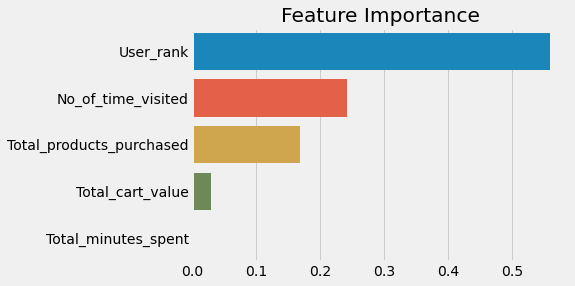

In [257]:
Feature_importance = pd.Series(data = rf_tuned.feature_importances_, 
                               index=['Total_minutes_spent',
                                      'No_of_time_visited',
                                      'Total_cart_value',
                                      'Total_products_purchased',
                                      'User_rank']).sort_values(ascending=False)
plt.title("Feature Importance")
sns.barplot(y=Feature_importance.index,x=Feature_importance.values,orient ='h')

## Model Building XGBoost

In [265]:
from xgboost import XGBRegressor
xgb = XGBRegressor(objective='reg:squarederror')
xgb.fit(X_train,y_train)
pred_xg_train = xgb.predict(X_train)

In [266]:
evl_metric_xgb_train = pd.DataFrame({'Model':'xgb_train','RMSE':np.sqrt(mean_squared_error(y_train,pred_xg_train)),
                                    "MAE":mean_squared_error(y_train,pred_xg_train),
                                   "R2_score":r2_score(y_train,pred_xg_train)},columns=['Model','RMSE','MAE','R2_score'],index=[0])

In [267]:
evl_metric_xgb_train

,Model,RMSE,MAE,R2_score
0,xgb_train,0.003521,0.000012,0.999981


In [268]:
pred_xg_test = xgb.predict(X_test)

In [269]:
evl_metric_xgb_test = pd.DataFrame({'Model':'xgb_test','RMSE':np.sqrt(mean_squared_error(y_test,pred_xg_test)),
                                    "MAE":mean_squared_error(y_test,pred_xg_test),
                                   "R2_score":r2_score(y_test,pred_xg_test)},columns=['Model','RMSE','MAE','R2_score'],index=[0])

In [270]:
evl_metric_xgb_test

,Model,RMSE,MAE,R2_score
0,xgb_test,0.133235,0.017752,0.975729


In [272]:
xgb_model_metric_no_tuning = pd.concat([evl_metric_xgb_train,evl_metric_xgb_test],ignore_index=True)
xgb_model_metric_no_tuning

,Model,RMSE,MAE,R2_score
0,xgb_train,0.003521,0.000012,0.999981
1,xgb_test,0.133235,0.017752,0.975729


## XGBoost Hyperparameter Tuning 

In [281]:
param_grid={
   
    'learning_rate':[0.1,0.2,0.3,0.4,0.5],
    'max_depth': [3,5,10,20],
    'n_estimators':[10,50,100,200],
    'reg_alpha':[0.25,0.50,0.75],
    'reg_lambda':[0.25,0.35,0.45],
    'subsample':[0.3,0.6,0.8]    
}

In [284]:
grid_xgb = GridSearchCV(XGBRegressor(objective='reg:squarederror'),param_grid =param_grid ,cv=3, verbose=3)
grid_xgb.fit(X_train,y_train)

Fitting 3 folds for each of 2160 candidates, totalling 6480 fits
[CV 1/3] END learning_rate=0.1, max_depth=3, n_estimators=10, reg_alpha=0.25, reg_lambda=0.25, subsample=0.3;, score=0.792 total time=   0.5s
[CV 2/3] END learning_rate=0.1, max_depth=3, n_estimators=10, reg_alpha=0.25, reg_lambda=0.25, subsample=0.3;, score=0.789 total time=   0.0s
[CV 3/3] END learning_rate=0.1, max_depth=3, n_estimators=10, reg_alpha=0.25, reg_lambda=0.25, subsample=0.3;, score=0.794 total time=   0.0s
[CV 1/3] END learning_rate=0.1, max_depth=3, n_estimators=10, reg_alpha=0.25, reg_lambda=0.25, subsample=0.6;, score=0.797 total time=   0.0s
[CV 2/3] END learning_rate=0.1, max_depth=3, n_estimators=10, reg_alpha=0.25, reg_lambda=0.25, subsample=0.6;, score=0.796 total time=   0.0s
[CV 3/3] END learning_rate=0.1, max_depth=3, n_estimators=10, reg_alpha=0.25, reg_lambda=0.25, subsample=0.6;, score=0.793 total time=   0.0s
[CV 1/3] END learning_rate=0.1, max_depth=3, n_estimators=10, reg_alpha=0.25, reg_l

[CV 3/3] END learning_rate=0.1, max_depth=3, n_estimators=10, reg_alpha=0.75, reg_lambda=0.25, subsample=0.8;, score=0.795 total time=   0.0s
[CV 1/3] END learning_rate=0.1, max_depth=3, n_estimators=10, reg_alpha=0.75, reg_lambda=0.35, subsample=0.3;, score=0.783 total time=   0.0s
[CV 2/3] END learning_rate=0.1, max_depth=3, n_estimators=10, reg_alpha=0.75, reg_lambda=0.35, subsample=0.3;, score=0.788 total time=   0.0s
[CV 3/3] END learning_rate=0.1, max_depth=3, n_estimators=10, reg_alpha=0.75, reg_lambda=0.35, subsample=0.3;, score=0.793 total time=   0.0s
[CV 1/3] END learning_rate=0.1, max_depth=3, n_estimators=10, reg_alpha=0.75, reg_lambda=0.35, subsample=0.6;, score=0.789 total time=   0.0s
[CV 2/3] END learning_rate=0.1, max_depth=3, n_estimators=10, reg_alpha=0.75, reg_lambda=0.35, subsample=0.6;, score=0.795 total time=   0.0s
[CV 3/3] END learning_rate=0.1, max_depth=3, n_estimators=10, reg_alpha=0.75, reg_lambda=0.35, subsample=0.6;, score=0.798 total time=   0.0s
[CV 1/

[CV 1/3] END learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0.5, reg_lambda=0.35, subsample=0.6;, score=0.989 total time=   0.1s
[CV 2/3] END learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0.5, reg_lambda=0.35, subsample=0.6;, score=0.991 total time=   0.1s
[CV 3/3] END learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0.5, reg_lambda=0.35, subsample=0.6;, score=0.993 total time=   0.0s
[CV 1/3] END learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0.5, reg_lambda=0.35, subsample=0.8;, score=0.993 total time=   0.0s
[CV 2/3] END learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0.5, reg_lambda=0.35, subsample=0.8;, score=0.991 total time=   0.1s
[CV 3/3] END learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0.5, reg_lambda=0.35, subsample=0.8;, score=0.990 total time=   0.0s
[CV 1/3] END learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0.5, reg_lambda=0.45, subsample=0.3;, score=0.984 total time=   0.1s
[CV 2/3] END 

[CV 2/3] END learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.25, reg_lambda=0.35, subsample=0.8;, score=0.996 total time=   0.2s
[CV 3/3] END learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.25, reg_lambda=0.35, subsample=0.8;, score=0.995 total time=   0.2s
[CV 1/3] END learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.25, reg_lambda=0.45, subsample=0.3;, score=0.993 total time=   0.1s
[CV 2/3] END learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.25, reg_lambda=0.45, subsample=0.3;, score=0.994 total time=   0.1s
[CV 3/3] END learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.25, reg_lambda=0.45, subsample=0.3;, score=0.995 total time=   0.1s
[CV 1/3] END learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.25, reg_lambda=0.45, subsample=0.6;, score=0.996 total time=   0.2s
[CV 2/3] END learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.25, reg_lambda=0.45, subsample=0.6;, score=0.996 total time=   0.2s

[CV 1/3] END learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6;, score=0.995 total time=   0.2s
[CV 2/3] END learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6;, score=0.996 total time=   0.3s
[CV 3/3] END learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6;, score=0.996 total time=   0.2s
[CV 1/3] END learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.8;, score=0.997 total time=   0.4s
[CV 2/3] END learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.8;, score=0.995 total time=   0.2s
[CV 3/3] END learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.8;, score=0.995 total time=   0.2s
[CV 1/3] END learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.25, reg_lambda=0.25, subsample=0.3;, score=0.996 total time=   0.5s

[CV 2/3] END learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.45, subsample=0.8;, score=0.998 total time=   0.5s
[CV 3/3] END learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.45, subsample=0.8;, score=0.997 total time=   0.5s
[CV 1/3] END learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.75, reg_lambda=0.25, subsample=0.3;, score=0.996 total time=   0.3s
[CV 2/3] END learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.75, reg_lambda=0.25, subsample=0.3;, score=0.996 total time=   0.4s
[CV 3/3] END learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.75, reg_lambda=0.25, subsample=0.3;, score=0.996 total time=   0.4s
[CV 1/3] END learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.75, reg_lambda=0.25, subsample=0.6;, score=0.995 total time=   0.5s
[CV 2/3] END learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.75, reg_lambda=0.25, subsample=0.6;, score=0.997 total time=   0.5s
[

[CV 3/3] END learning_rate=0.1, max_depth=5, n_estimators=10, reg_alpha=0.5, reg_lambda=0.25, subsample=0.3;, score=0.843 total time=   0.0s
[CV 1/3] END learning_rate=0.1, max_depth=5, n_estimators=10, reg_alpha=0.5, reg_lambda=0.25, subsample=0.6;, score=0.841 total time=   0.0s
[CV 2/3] END learning_rate=0.1, max_depth=5, n_estimators=10, reg_alpha=0.5, reg_lambda=0.25, subsample=0.6;, score=0.850 total time=   0.0s
[CV 3/3] END learning_rate=0.1, max_depth=5, n_estimators=10, reg_alpha=0.5, reg_lambda=0.25, subsample=0.6;, score=0.842 total time=   0.0s
[CV 1/3] END learning_rate=0.1, max_depth=5, n_estimators=10, reg_alpha=0.5, reg_lambda=0.25, subsample=0.8;, score=0.848 total time=   0.0s
[CV 2/3] END learning_rate=0.1, max_depth=5, n_estimators=10, reg_alpha=0.5, reg_lambda=0.25, subsample=0.8;, score=0.848 total time=   0.0s
[CV 3/3] END learning_rate=0.1, max_depth=5, n_estimators=10, reg_alpha=0.5, reg_lambda=0.25, subsample=0.8;, score=0.848 total time=   0.0s
[CV 1/3] END 

[CV 1/3] END learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.25, reg_lambda=0.25, subsample=0.8;, score=0.997 total time=   0.2s
[CV 2/3] END learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.25, reg_lambda=0.25, subsample=0.8;, score=0.996 total time=   0.2s
[CV 3/3] END learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.25, reg_lambda=0.25, subsample=0.8;, score=0.996 total time=   0.1s
[CV 1/3] END learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.25, reg_lambda=0.35, subsample=0.3;, score=0.991 total time=   0.1s
[CV 2/3] END learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.25, reg_lambda=0.35, subsample=0.3;, score=0.993 total time=   0.1s
[CV 3/3] END learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.25, reg_lambda=0.35, subsample=0.3;, score=0.994 total time=   0.1s
[CV 1/3] END learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.25, reg_lambda=0.35, subsample=0.6;, score=0.995 total time=   0.1s
[CV 2/

[CV 2/3] END learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.75, reg_lambda=0.35, subsample=0.3;, score=0.987 total time=   0.1s
[CV 3/3] END learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.75, reg_lambda=0.35, subsample=0.3;, score=0.993 total time=   0.1s
[CV 1/3] END learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.75, reg_lambda=0.35, subsample=0.6;, score=0.995 total time=   0.1s
[CV 2/3] END learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.75, reg_lambda=0.35, subsample=0.6;, score=0.996 total time=   0.1s
[CV 3/3] END learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.75, reg_lambda=0.35, subsample=0.6;, score=0.995 total time=   0.1s
[CV 1/3] END learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.75, reg_lambda=0.35, subsample=0.8;, score=0.997 total time=   0.2s
[CV 2/3] END learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.75, reg_lambda=0.35, subsample=0.8;, score=0.995 total time=   0.2s
[CV 3/

[CV 3/3] END learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.5, reg_lambda=0.35, subsample=0.6;, score=0.997 total time=   0.4s
[CV 1/3] END learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.5, reg_lambda=0.35, subsample=0.8;, score=0.997 total time=   0.4s
[CV 2/3] END learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.5, reg_lambda=0.35, subsample=0.8;, score=0.996 total time=   0.4s
[CV 3/3] END learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.5, reg_lambda=0.35, subsample=0.8;, score=0.997 total time=   0.4s
[CV 1/3] END learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.5, reg_lambda=0.45, subsample=0.3;, score=0.993 total time=   0.3s
[CV 2/3] END learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.5, reg_lambda=0.45, subsample=0.3;, score=0.994 total time=   0.3s
[CV 3/3] END learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.5, reg_lambda=0.45, subsample=0.3;, score=0.996 total time=   0.3s
[CV 1/

[CV 1/3] END learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.25, reg_lambda=0.45, subsample=0.3;, score=0.993 total time=   0.6s
[CV 2/3] END learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.25, reg_lambda=0.45, subsample=0.3;, score=0.995 total time=   0.6s
[CV 3/3] END learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.25, reg_lambda=0.45, subsample=0.3;, score=0.997 total time=   0.6s
[CV 1/3] END learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.25, reg_lambda=0.45, subsample=0.6;, score=0.997 total time=   1.0s
[CV 2/3] END learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.25, reg_lambda=0.45, subsample=0.6;, score=0.998 total time=   0.8s
[CV 3/3] END learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.25, reg_lambda=0.45, subsample=0.6;, score=0.996 total time=   0.8s
[CV 1/3] END learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.25, reg_lambda=0.45, subsample=0.8;, score=0.998 total time=   0.9s

[CV 2/3] END learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6;, score=0.997 total time=   0.8s
[CV 3/3] END learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6;, score=0.996 total time=   0.8s
[CV 1/3] END learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.75, reg_lambda=0.45, subsample=0.8;, score=0.998 total time=   0.9s
[CV 2/3] END learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.75, reg_lambda=0.45, subsample=0.8;, score=0.996 total time=   0.9s
[CV 3/3] END learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.75, reg_lambda=0.45, subsample=0.8;, score=0.997 total time=   0.9s
[CV 1/3] END learning_rate=0.1, max_depth=10, n_estimators=10, reg_alpha=0.25, reg_lambda=0.25, subsample=0.3;, score=0.850 total time=   0.1s
[CV 2/3] END learning_rate=0.1, max_depth=10, n_estimators=10, reg_alpha=0.25, reg_lambda=0.25, subsample=0.3;, score=0.850 total time=   0.0s

[CV 1/3] END learning_rate=0.1, max_depth=10, n_estimators=10, reg_alpha=0.75, reg_lambda=0.25, subsample=0.3;, score=0.845 total time=   0.1s
[CV 2/3] END learning_rate=0.1, max_depth=10, n_estimators=10, reg_alpha=0.75, reg_lambda=0.25, subsample=0.3;, score=0.843 total time=   0.0s
[CV 3/3] END learning_rate=0.1, max_depth=10, n_estimators=10, reg_alpha=0.75, reg_lambda=0.25, subsample=0.3;, score=0.841 total time=   0.0s
[CV 1/3] END learning_rate=0.1, max_depth=10, n_estimators=10, reg_alpha=0.75, reg_lambda=0.25, subsample=0.6;, score=0.853 total time=   0.0s
[CV 2/3] END learning_rate=0.1, max_depth=10, n_estimators=10, reg_alpha=0.75, reg_lambda=0.25, subsample=0.6;, score=0.858 total time=   0.0s
[CV 3/3] END learning_rate=0.1, max_depth=10, n_estimators=10, reg_alpha=0.75, reg_lambda=0.25, subsample=0.6;, score=0.851 total time=   0.0s
[CV 1/3] END learning_rate=0.1, max_depth=10, n_estimators=10, reg_alpha=0.75, reg_lambda=0.25, subsample=0.8;, score=0.860 total time=   0.0s

[CV 2/3] END learning_rate=0.1, max_depth=10, n_estimators=50, reg_alpha=0.5, reg_lambda=0.25, subsample=0.6;, score=0.997 total time=   0.3s
[CV 3/3] END learning_rate=0.1, max_depth=10, n_estimators=50, reg_alpha=0.5, reg_lambda=0.25, subsample=0.6;, score=0.995 total time=   0.3s
[CV 1/3] END learning_rate=0.1, max_depth=10, n_estimators=50, reg_alpha=0.5, reg_lambda=0.25, subsample=0.8;, score=0.998 total time=   0.3s
[CV 2/3] END learning_rate=0.1, max_depth=10, n_estimators=50, reg_alpha=0.5, reg_lambda=0.25, subsample=0.8;, score=0.996 total time=   0.3s
[CV 3/3] END learning_rate=0.1, max_depth=10, n_estimators=50, reg_alpha=0.5, reg_lambda=0.25, subsample=0.8;, score=0.997 total time=   0.3s
[CV 1/3] END learning_rate=0.1, max_depth=10, n_estimators=50, reg_alpha=0.5, reg_lambda=0.35, subsample=0.3;, score=0.991 total time=   0.2s
[CV 2/3] END learning_rate=0.1, max_depth=10, n_estimators=50, reg_alpha=0.5, reg_lambda=0.35, subsample=0.3;, score=0.986 total time=   0.2s
[CV 3/

[CV 3/3] END learning_rate=0.1, max_depth=10, n_estimators=100, reg_alpha=0.25, reg_lambda=0.25, subsample=0.8;, score=0.998 total time=   0.8s
[CV 1/3] END learning_rate=0.1, max_depth=10, n_estimators=100, reg_alpha=0.25, reg_lambda=0.35, subsample=0.3;, score=0.996 total time=   0.5s
[CV 2/3] END learning_rate=0.1, max_depth=10, n_estimators=100, reg_alpha=0.25, reg_lambda=0.35, subsample=0.3;, score=0.994 total time=   0.5s
[CV 3/3] END learning_rate=0.1, max_depth=10, n_estimators=100, reg_alpha=0.25, reg_lambda=0.35, subsample=0.3;, score=0.996 total time=   0.5s
[CV 1/3] END learning_rate=0.1, max_depth=10, n_estimators=100, reg_alpha=0.25, reg_lambda=0.35, subsample=0.6;, score=0.997 total time=   0.7s
[CV 2/3] END learning_rate=0.1, max_depth=10, n_estimators=100, reg_alpha=0.25, reg_lambda=0.35, subsample=0.6;, score=0.998 total time=   0.7s
[CV 3/3] END learning_rate=0.1, max_depth=10, n_estimators=100, reg_alpha=0.25, reg_lambda=0.35, subsample=0.6;, score=0.996 total time=

[CV 1/3] END learning_rate=0.1, max_depth=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.35, subsample=0.6;, score=0.996 total time=   0.6s
[CV 2/3] END learning_rate=0.1, max_depth=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.35, subsample=0.6;, score=0.997 total time=   0.6s
[CV 3/3] END learning_rate=0.1, max_depth=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.35, subsample=0.6;, score=0.996 total time=   0.6s
[CV 1/3] END learning_rate=0.1, max_depth=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.35, subsample=0.8;, score=0.998 total time=   0.7s
[CV 2/3] END learning_rate=0.1, max_depth=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.35, subsample=0.8;, score=0.997 total time=   0.7s
[CV 3/3] END learning_rate=0.1, max_depth=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.35, subsample=0.8;, score=0.998 total time=   0.7s
[CV 1/3] END learning_rate=0.1, max_depth=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.3;, score=0.992 total time=

[CV 1/3] END learning_rate=0.1, max_depth=10, n_estimators=200, reg_alpha=0.5, reg_lambda=0.35, subsample=0.8;, score=0.998 total time=   1.4s
[CV 2/3] END learning_rate=0.1, max_depth=10, n_estimators=200, reg_alpha=0.5, reg_lambda=0.35, subsample=0.8;, score=0.997 total time=   1.4s
[CV 3/3] END learning_rate=0.1, max_depth=10, n_estimators=200, reg_alpha=0.5, reg_lambda=0.35, subsample=0.8;, score=0.998 total time=   1.4s
[CV 1/3] END learning_rate=0.1, max_depth=10, n_estimators=200, reg_alpha=0.5, reg_lambda=0.45, subsample=0.3;, score=0.993 total time=   1.0s
[CV 2/3] END learning_rate=0.1, max_depth=10, n_estimators=200, reg_alpha=0.5, reg_lambda=0.45, subsample=0.3;, score=0.994 total time=   1.0s
[CV 3/3] END learning_rate=0.1, max_depth=10, n_estimators=200, reg_alpha=0.5, reg_lambda=0.45, subsample=0.3;, score=0.997 total time=   1.0s
[CV 1/3] END learning_rate=0.1, max_depth=10, n_estimators=200, reg_alpha=0.5, reg_lambda=0.45, subsample=0.6;, score=0.997 total time=   1.3s

[CV 2/3] END learning_rate=0.1, max_depth=20, n_estimators=10, reg_alpha=0.25, reg_lambda=0.45, subsample=0.3;, score=0.846 total time=   0.0s
[CV 3/3] END learning_rate=0.1, max_depth=20, n_estimators=10, reg_alpha=0.25, reg_lambda=0.45, subsample=0.3;, score=0.839 total time=   0.0s
[CV 1/3] END learning_rate=0.1, max_depth=20, n_estimators=10, reg_alpha=0.25, reg_lambda=0.45, subsample=0.6;, score=0.855 total time=   0.0s
[CV 2/3] END learning_rate=0.1, max_depth=20, n_estimators=10, reg_alpha=0.25, reg_lambda=0.45, subsample=0.6;, score=0.859 total time=   0.0s
[CV 3/3] END learning_rate=0.1, max_depth=20, n_estimators=10, reg_alpha=0.25, reg_lambda=0.45, subsample=0.6;, score=0.852 total time=   0.0s
[CV 1/3] END learning_rate=0.1, max_depth=20, n_estimators=10, reg_alpha=0.25, reg_lambda=0.45, subsample=0.8;, score=0.861 total time=   0.1s
[CV 2/3] END learning_rate=0.1, max_depth=20, n_estimators=10, reg_alpha=0.25, reg_lambda=0.45, subsample=0.8;, score=0.858 total time=   0.0s

[CV 2/3] END learning_rate=0.1, max_depth=20, n_estimators=10, reg_alpha=0.75, reg_lambda=0.45, subsample=0.8;, score=0.855 total time=   0.0s
[CV 3/3] END learning_rate=0.1, max_depth=20, n_estimators=10, reg_alpha=0.75, reg_lambda=0.45, subsample=0.8;, score=0.852 total time=   0.0s
[CV 1/3] END learning_rate=0.1, max_depth=20, n_estimators=50, reg_alpha=0.25, reg_lambda=0.25, subsample=0.3;, score=0.993 total time=   0.2s
[CV 2/3] END learning_rate=0.1, max_depth=20, n_estimators=50, reg_alpha=0.25, reg_lambda=0.25, subsample=0.3;, score=0.992 total time=   0.2s
[CV 3/3] END learning_rate=0.1, max_depth=20, n_estimators=50, reg_alpha=0.25, reg_lambda=0.25, subsample=0.3;, score=0.995 total time=   0.2s
[CV 1/3] END learning_rate=0.1, max_depth=20, n_estimators=50, reg_alpha=0.25, reg_lambda=0.25, subsample=0.6;, score=0.995 total time=   0.3s
[CV 2/3] END learning_rate=0.1, max_depth=20, n_estimators=50, reg_alpha=0.25, reg_lambda=0.25, subsample=0.6;, score=0.998 total time=   0.3s

[CV 3/3] END learning_rate=0.1, max_depth=20, n_estimators=50, reg_alpha=0.75, reg_lambda=0.25, subsample=0.3;, score=0.994 total time=   0.2s
[CV 1/3] END learning_rate=0.1, max_depth=20, n_estimators=50, reg_alpha=0.75, reg_lambda=0.25, subsample=0.6;, score=0.996 total time=   0.3s
[CV 2/3] END learning_rate=0.1, max_depth=20, n_estimators=50, reg_alpha=0.75, reg_lambda=0.25, subsample=0.6;, score=0.996 total time=   0.3s
[CV 3/3] END learning_rate=0.1, max_depth=20, n_estimators=50, reg_alpha=0.75, reg_lambda=0.25, subsample=0.6;, score=0.994 total time=   0.3s
[CV 1/3] END learning_rate=0.1, max_depth=20, n_estimators=50, reg_alpha=0.75, reg_lambda=0.25, subsample=0.8;, score=0.998 total time=   0.4s
[CV 2/3] END learning_rate=0.1, max_depth=20, n_estimators=50, reg_alpha=0.75, reg_lambda=0.25, subsample=0.8;, score=0.996 total time=   0.3s
[CV 3/3] END learning_rate=0.1, max_depth=20, n_estimators=50, reg_alpha=0.75, reg_lambda=0.25, subsample=0.8;, score=0.996 total time=   0.4s

[CV 1/3] END learning_rate=0.1, max_depth=20, n_estimators=100, reg_alpha=0.5, reg_lambda=0.25, subsample=0.8;, score=0.998 total time=   0.8s
[CV 2/3] END learning_rate=0.1, max_depth=20, n_estimators=100, reg_alpha=0.5, reg_lambda=0.25, subsample=0.8;, score=0.997 total time=   0.8s
[CV 3/3] END learning_rate=0.1, max_depth=20, n_estimators=100, reg_alpha=0.5, reg_lambda=0.25, subsample=0.8;, score=0.997 total time=   0.8s
[CV 1/3] END learning_rate=0.1, max_depth=20, n_estimators=100, reg_alpha=0.5, reg_lambda=0.35, subsample=0.3;, score=0.994 total time=   0.5s
[CV 2/3] END learning_rate=0.1, max_depth=20, n_estimators=100, reg_alpha=0.5, reg_lambda=0.35, subsample=0.3;, score=0.990 total time=   0.5s
[CV 3/3] END learning_rate=0.1, max_depth=20, n_estimators=100, reg_alpha=0.5, reg_lambda=0.35, subsample=0.3;, score=0.996 total time=   0.5s
[CV 1/3] END learning_rate=0.1, max_depth=20, n_estimators=100, reg_alpha=0.5, reg_lambda=0.35, subsample=0.6;, score=0.996 total time=   0.7s

[CV 2/3] END learning_rate=0.1, max_depth=20, n_estimators=200, reg_alpha=0.25, reg_lambda=0.35, subsample=0.3;, score=0.994 total time=   1.3s
[CV 3/3] END learning_rate=0.1, max_depth=20, n_estimators=200, reg_alpha=0.25, reg_lambda=0.35, subsample=0.3;, score=0.997 total time=   1.3s
[CV 1/3] END learning_rate=0.1, max_depth=20, n_estimators=200, reg_alpha=0.25, reg_lambda=0.35, subsample=0.6;, score=0.997 total time=   1.5s
[CV 2/3] END learning_rate=0.1, max_depth=20, n_estimators=200, reg_alpha=0.25, reg_lambda=0.35, subsample=0.6;, score=0.998 total time=   1.5s
[CV 3/3] END learning_rate=0.1, max_depth=20, n_estimators=200, reg_alpha=0.25, reg_lambda=0.35, subsample=0.6;, score=0.997 total time=   1.5s
[CV 1/3] END learning_rate=0.1, max_depth=20, n_estimators=200, reg_alpha=0.25, reg_lambda=0.35, subsample=0.8;, score=0.998 total time=   1.7s
[CV 2/3] END learning_rate=0.1, max_depth=20, n_estimators=200, reg_alpha=0.25, reg_lambda=0.35, subsample=0.8;, score=0.997 total time=

[CV 3/3] END learning_rate=0.1, max_depth=20, n_estimators=200, reg_alpha=0.75, reg_lambda=0.35, subsample=0.6;, score=0.997 total time=   1.3s
[CV 1/3] END learning_rate=0.1, max_depth=20, n_estimators=200, reg_alpha=0.75, reg_lambda=0.35, subsample=0.8;, score=0.998 total time=   1.4s
[CV 2/3] END learning_rate=0.1, max_depth=20, n_estimators=200, reg_alpha=0.75, reg_lambda=0.35, subsample=0.8;, score=0.997 total time=   1.4s
[CV 3/3] END learning_rate=0.1, max_depth=20, n_estimators=200, reg_alpha=0.75, reg_lambda=0.35, subsample=0.8;, score=0.998 total time=   1.4s
[CV 1/3] END learning_rate=0.1, max_depth=20, n_estimators=200, reg_alpha=0.75, reg_lambda=0.45, subsample=0.3;, score=0.993 total time=   1.3s
[CV 2/3] END learning_rate=0.1, max_depth=20, n_estimators=200, reg_alpha=0.75, reg_lambda=0.45, subsample=0.3;, score=0.994 total time=   1.2s
[CV 3/3] END learning_rate=0.1, max_depth=20, n_estimators=200, reg_alpha=0.75, reg_lambda=0.45, subsample=0.3;, score=0.996 total time=

[CV 2/3] END learning_rate=0.2, max_depth=3, n_estimators=10, reg_alpha=0.5, reg_lambda=0.45, subsample=0.3;, score=0.941 total time=   0.0s
[CV 3/3] END learning_rate=0.2, max_depth=3, n_estimators=10, reg_alpha=0.5, reg_lambda=0.45, subsample=0.3;, score=0.939 total time=   0.0s
[CV 1/3] END learning_rate=0.2, max_depth=3, n_estimators=10, reg_alpha=0.5, reg_lambda=0.45, subsample=0.6;, score=0.939 total time=   0.0s
[CV 2/3] END learning_rate=0.2, max_depth=3, n_estimators=10, reg_alpha=0.5, reg_lambda=0.45, subsample=0.6;, score=0.938 total time=   0.0s
[CV 3/3] END learning_rate=0.2, max_depth=3, n_estimators=10, reg_alpha=0.5, reg_lambda=0.45, subsample=0.6;, score=0.948 total time=   0.0s
[CV 1/3] END learning_rate=0.2, max_depth=3, n_estimators=10, reg_alpha=0.5, reg_lambda=0.45, subsample=0.8;, score=0.947 total time=   0.0s
[CV 2/3] END learning_rate=0.2, max_depth=3, n_estimators=10, reg_alpha=0.5, reg_lambda=0.45, subsample=0.8;, score=0.943 total time=   0.0s
[CV 3/3] END 

[CV 3/3] END learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.25, reg_lambda=0.45, subsample=0.6;, score=0.996 total time=   0.1s
[CV 1/3] END learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.25, reg_lambda=0.45, subsample=0.8;, score=0.993 total time=   0.1s
[CV 2/3] END learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.25, reg_lambda=0.45, subsample=0.8;, score=0.994 total time=   0.1s
[CV 3/3] END learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.25, reg_lambda=0.45, subsample=0.8;, score=0.995 total time=   0.1s
[CV 1/3] END learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.5, reg_lambda=0.25, subsample=0.3;, score=0.993 total time=   0.1s
[CV 2/3] END learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.5, reg_lambda=0.25, subsample=0.3;, score=0.988 total time=   0.2s
[CV 3/3] END learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.5, reg_lambda=0.25, subsample=0.3;, score=0.993 total time=   0.0s
[CV 1/3] 

[CV 1/3] END learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0.25, reg_lambda=0.25, subsample=0.3;, score=0.996 total time=   0.2s
[CV 2/3] END learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0.25, reg_lambda=0.25, subsample=0.3;, score=0.992 total time=   0.2s
[CV 3/3] END learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0.25, reg_lambda=0.25, subsample=0.3;, score=0.995 total time=   0.3s
[CV 1/3] END learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0.25, reg_lambda=0.25, subsample=0.6;, score=0.997 total time=   0.2s
[CV 2/3] END learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0.25, reg_lambda=0.25, subsample=0.6;, score=0.994 total time=   0.2s
[CV 3/3] END learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0.25, reg_lambda=0.25, subsample=0.6;, score=0.997 total time=   0.2s
[CV 1/3] END learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0.25, reg_lambda=0.25, subsample=0.8;, score=0.994 total time=   0.3s

[CV 2/3] END learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0.75, reg_lambda=0.25, subsample=0.6;, score=0.995 total time=   0.2s
[CV 3/3] END learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0.75, reg_lambda=0.25, subsample=0.6;, score=0.997 total time=   0.2s
[CV 1/3] END learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0.75, reg_lambda=0.25, subsample=0.8;, score=0.996 total time=   0.3s
[CV 2/3] END learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0.75, reg_lambda=0.25, subsample=0.8;, score=0.995 total time=   0.3s
[CV 3/3] END learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0.75, reg_lambda=0.25, subsample=0.8;, score=0.997 total time=   0.3s
[CV 1/3] END learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0.75, reg_lambda=0.35, subsample=0.3;, score=0.991 total time=   0.2s
[CV 2/3] END learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0.75, reg_lambda=0.35, subsample=0.3;, score=0.992 total time=   0.2s

[CV 3/3] END learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.25, subsample=0.8;, score=0.998 total time=   0.7s
[CV 1/3] END learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.35, subsample=0.3;, score=0.997 total time=   0.4s
[CV 2/3] END learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.35, subsample=0.3;, score=0.994 total time=   0.4s
[CV 3/3] END learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.35, subsample=0.3;, score=0.996 total time=   0.4s
[CV 1/3] END learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.35, subsample=0.6;, score=0.997 total time=   0.7s
[CV 2/3] END learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.35, subsample=0.6;, score=0.996 total time=   0.6s
[CV 3/3] END learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.35, subsample=0.6;, score=0.998 total time=   0.6s
[CV 1/

[CV 1/3] END learning_rate=0.2, max_depth=5, n_estimators=10, reg_alpha=0.25, reg_lambda=0.35, subsample=0.6;, score=0.973 total time=   0.0s
[CV 2/3] END learning_rate=0.2, max_depth=5, n_estimators=10, reg_alpha=0.25, reg_lambda=0.35, subsample=0.6;, score=0.973 total time=   0.0s
[CV 3/3] END learning_rate=0.2, max_depth=5, n_estimators=10, reg_alpha=0.25, reg_lambda=0.35, subsample=0.6;, score=0.971 total time=   0.0s
[CV 1/3] END learning_rate=0.2, max_depth=5, n_estimators=10, reg_alpha=0.25, reg_lambda=0.35, subsample=0.8;, score=0.975 total time=   0.0s
[CV 2/3] END learning_rate=0.2, max_depth=5, n_estimators=10, reg_alpha=0.25, reg_lambda=0.35, subsample=0.8;, score=0.974 total time=   0.0s
[CV 3/3] END learning_rate=0.2, max_depth=5, n_estimators=10, reg_alpha=0.25, reg_lambda=0.35, subsample=0.8;, score=0.977 total time=   0.0s
[CV 1/3] END learning_rate=0.2, max_depth=5, n_estimators=10, reg_alpha=0.25, reg_lambda=0.45, subsample=0.3;, score=0.960 total time=   0.0s
[CV 2/

[CV 1/3] END learning_rate=0.2, max_depth=5, n_estimators=10, reg_alpha=0.75, reg_lambda=0.45, subsample=0.3;, score=0.963 total time=   0.0s
[CV 2/3] END learning_rate=0.2, max_depth=5, n_estimators=10, reg_alpha=0.75, reg_lambda=0.45, subsample=0.3;, score=0.962 total time=   0.0s
[CV 3/3] END learning_rate=0.2, max_depth=5, n_estimators=10, reg_alpha=0.75, reg_lambda=0.45, subsample=0.3;, score=0.961 total time=   0.0s
[CV 1/3] END learning_rate=0.2, max_depth=5, n_estimators=10, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6;, score=0.974 total time=   0.0s
[CV 2/3] END learning_rate=0.2, max_depth=5, n_estimators=10, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6;, score=0.973 total time=   0.0s
[CV 3/3] END learning_rate=0.2, max_depth=5, n_estimators=10, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6;, score=0.970 total time=   0.0s
[CV 1/3] END learning_rate=0.2, max_depth=5, n_estimators=10, reg_alpha=0.75, reg_lambda=0.45, subsample=0.8;, score=0.976 total time=   0.0s
[CV 2/

[CV 2/3] END learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.5, reg_lambda=0.45, subsample=0.6;, score=0.997 total time=   0.2s
[CV 3/3] END learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.5, reg_lambda=0.45, subsample=0.6;, score=0.996 total time=   0.2s
[CV 1/3] END learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.5, reg_lambda=0.45, subsample=0.8;, score=0.997 total time=   0.2s
[CV 2/3] END learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.5, reg_lambda=0.45, subsample=0.8;, score=0.995 total time=   0.2s
[CV 3/3] END learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.5, reg_lambda=0.45, subsample=0.8;, score=0.996 total time=   0.2s
[CV 1/3] END learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.75, reg_lambda=0.25, subsample=0.3;, score=0.994 total time=   0.2s
[CV 2/3] END learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.75, reg_lambda=0.25, subsample=0.3;, score=0.989 total time=   0.1s
[CV 3/3] EN

[CV 3/3] END learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0.25, reg_lambda=0.45, subsample=0.8;, score=0.997 total time=   0.6s
[CV 1/3] END learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0.5, reg_lambda=0.25, subsample=0.3;, score=0.995 total time=   0.3s
[CV 2/3] END learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0.5, reg_lambda=0.25, subsample=0.3;, score=0.992 total time=   0.3s
[CV 3/3] END learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0.5, reg_lambda=0.25, subsample=0.3;, score=0.996 total time=   0.3s
[CV 1/3] END learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0.5, reg_lambda=0.25, subsample=0.6;, score=0.997 total time=   0.4s
[CV 2/3] END learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0.5, reg_lambda=0.25, subsample=0.6;, score=0.997 total time=   0.4s
[CV 3/3] END learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0.5, reg_lambda=0.25, subsample=0.6;, score=0.997 total time=   0.4s
[CV 1

[CV 1/3] END learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.25, reg_lambda=0.25, subsample=0.6;, score=0.997 total time=   0.9s
[CV 2/3] END learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.25, reg_lambda=0.25, subsample=0.6;, score=0.997 total time=   0.9s
[CV 3/3] END learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.25, reg_lambda=0.25, subsample=0.6;, score=0.997 total time=   1.1s
[CV 1/3] END learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.25, reg_lambda=0.25, subsample=0.8;, score=0.998 total time=   1.1s
[CV 2/3] END learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.25, reg_lambda=0.25, subsample=0.8;, score=0.996 total time=   1.0s
[CV 3/3] END learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.25, reg_lambda=0.25, subsample=0.8;, score=0.998 total time=   1.0s
[CV 1/3] END learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.25, reg_lambda=0.35, subsample=0.3;, score=0.995 total time=   0.7s

[CV 2/3] END learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.75, reg_lambda=0.25, subsample=0.8;, score=0.996 total time=   1.0s
[CV 3/3] END learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.75, reg_lambda=0.25, subsample=0.8;, score=0.997 total time=   0.9s
[CV 1/3] END learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.75, reg_lambda=0.35, subsample=0.3;, score=0.996 total time=   0.9s
[CV 2/3] END learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.75, reg_lambda=0.35, subsample=0.3;, score=0.993 total time=   0.6s
[CV 3/3] END learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.75, reg_lambda=0.35, subsample=0.3;, score=0.996 total time=   0.6s
[CV 1/3] END learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.75, reg_lambda=0.35, subsample=0.6;, score=0.997 total time=   0.8s
[CV 2/3] END learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.75, reg_lambda=0.35, subsample=0.6;, score=0.997 total time=   0.8s

[CV 2/3] END learning_rate=0.2, max_depth=10, n_estimators=10, reg_alpha=0.5, reg_lambda=0.35, subsample=0.6;, score=0.979 total time=   0.0s
[CV 3/3] END learning_rate=0.2, max_depth=10, n_estimators=10, reg_alpha=0.5, reg_lambda=0.35, subsample=0.6;, score=0.975 total time=   0.0s
[CV 1/3] END learning_rate=0.2, max_depth=10, n_estimators=10, reg_alpha=0.5, reg_lambda=0.35, subsample=0.8;, score=0.977 total time=   0.0s
[CV 2/3] END learning_rate=0.2, max_depth=10, n_estimators=10, reg_alpha=0.5, reg_lambda=0.35, subsample=0.8;, score=0.980 total time=   0.0s
[CV 3/3] END learning_rate=0.2, max_depth=10, n_estimators=10, reg_alpha=0.5, reg_lambda=0.35, subsample=0.8;, score=0.977 total time=   0.0s
[CV 1/3] END learning_rate=0.2, max_depth=10, n_estimators=10, reg_alpha=0.5, reg_lambda=0.45, subsample=0.3;, score=0.961 total time=   0.0s
[CV 2/3] END learning_rate=0.2, max_depth=10, n_estimators=10, reg_alpha=0.5, reg_lambda=0.45, subsample=0.3;, score=0.962 total time=   0.0s
[CV 3/

[CV 3/3] END learning_rate=0.2, max_depth=10, n_estimators=50, reg_alpha=0.25, reg_lambda=0.35, subsample=0.8;, score=0.997 total time=   0.4s
[CV 1/3] END learning_rate=0.2, max_depth=10, n_estimators=50, reg_alpha=0.25, reg_lambda=0.45, subsample=0.3;, score=0.993 total time=   0.2s
[CV 2/3] END learning_rate=0.2, max_depth=10, n_estimators=50, reg_alpha=0.25, reg_lambda=0.45, subsample=0.3;, score=0.992 total time=   0.2s
[CV 3/3] END learning_rate=0.2, max_depth=10, n_estimators=50, reg_alpha=0.25, reg_lambda=0.45, subsample=0.3;, score=0.995 total time=   0.2s
[CV 1/3] END learning_rate=0.2, max_depth=10, n_estimators=50, reg_alpha=0.25, reg_lambda=0.45, subsample=0.6;, score=0.994 total time=   0.3s
[CV 2/3] END learning_rate=0.2, max_depth=10, n_estimators=50, reg_alpha=0.25, reg_lambda=0.45, subsample=0.6;, score=0.996 total time=   0.3s
[CV 3/3] END learning_rate=0.2, max_depth=10, n_estimators=50, reg_alpha=0.25, reg_lambda=0.45, subsample=0.6;, score=0.996 total time=   0.3s

[CV 1/3] END learning_rate=0.2, max_depth=10, n_estimators=50, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6;, score=0.996 total time=   0.3s
[CV 2/3] END learning_rate=0.2, max_depth=10, n_estimators=50, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6;, score=0.996 total time=   0.4s
[CV 3/3] END learning_rate=0.2, max_depth=10, n_estimators=50, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6;, score=0.997 total time=   0.4s
[CV 1/3] END learning_rate=0.2, max_depth=10, n_estimators=50, reg_alpha=0.75, reg_lambda=0.45, subsample=0.8;, score=0.998 total time=   0.4s
[CV 2/3] END learning_rate=0.2, max_depth=10, n_estimators=50, reg_alpha=0.75, reg_lambda=0.45, subsample=0.8;, score=0.995 total time=   0.4s
[CV 3/3] END learning_rate=0.2, max_depth=10, n_estimators=50, reg_alpha=0.75, reg_lambda=0.45, subsample=0.8;, score=0.997 total time=   0.3s
[CV 1/3] END learning_rate=0.2, max_depth=10, n_estimators=100, reg_alpha=0.25, reg_lambda=0.25, subsample=0.3;, score=0.992 total time=   0.6

[CV 2/3] END learning_rate=0.2, max_depth=10, n_estimators=100, reg_alpha=0.5, reg_lambda=0.45, subsample=0.8;, score=0.997 total time=   0.7s
[CV 3/3] END learning_rate=0.2, max_depth=10, n_estimators=100, reg_alpha=0.5, reg_lambda=0.45, subsample=0.8;, score=0.997 total time=   0.7s
[CV 1/3] END learning_rate=0.2, max_depth=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.25, subsample=0.3;, score=0.994 total time=   0.6s
[CV 2/3] END learning_rate=0.2, max_depth=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.25, subsample=0.3;, score=0.988 total time=   0.6s
[CV 3/3] END learning_rate=0.2, max_depth=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.25, subsample=0.3;, score=0.996 total time=   0.5s
[CV 1/3] END learning_rate=0.2, max_depth=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.25, subsample=0.6;, score=0.996 total time=   0.6s
[CV 2/3] END learning_rate=0.2, max_depth=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.25, subsample=0.6;, score=0.996 total time=  

[CV 2/3] END learning_rate=0.2, max_depth=10, n_estimators=200, reg_alpha=0.5, reg_lambda=0.25, subsample=0.3;, score=0.992 total time=   1.0s
[CV 3/3] END learning_rate=0.2, max_depth=10, n_estimators=200, reg_alpha=0.5, reg_lambda=0.25, subsample=0.3;, score=0.997 total time=   0.9s
[CV 1/3] END learning_rate=0.2, max_depth=10, n_estimators=200, reg_alpha=0.5, reg_lambda=0.25, subsample=0.6;, score=0.996 total time=   1.2s
[CV 2/3] END learning_rate=0.2, max_depth=10, n_estimators=200, reg_alpha=0.5, reg_lambda=0.25, subsample=0.6;, score=0.996 total time=   1.1s
[CV 3/3] END learning_rate=0.2, max_depth=10, n_estimators=200, reg_alpha=0.5, reg_lambda=0.25, subsample=0.6;, score=0.997 total time=   1.2s
[CV 1/3] END learning_rate=0.2, max_depth=10, n_estimators=200, reg_alpha=0.5, reg_lambda=0.25, subsample=0.8;, score=0.996 total time=   1.3s
[CV 2/3] END learning_rate=0.2, max_depth=10, n_estimators=200, reg_alpha=0.5, reg_lambda=0.25, subsample=0.8;, score=0.997 total time=   1.2s

[CV 3/3] END learning_rate=0.2, max_depth=20, n_estimators=10, reg_alpha=0.25, reg_lambda=0.25, subsample=0.6;, score=0.975 total time=   0.0s
[CV 1/3] END learning_rate=0.2, max_depth=20, n_estimators=10, reg_alpha=0.25, reg_lambda=0.25, subsample=0.8;, score=0.981 total time=   0.0s
[CV 2/3] END learning_rate=0.2, max_depth=20, n_estimators=10, reg_alpha=0.25, reg_lambda=0.25, subsample=0.8;, score=0.977 total time=   0.0s
[CV 3/3] END learning_rate=0.2, max_depth=20, n_estimators=10, reg_alpha=0.25, reg_lambda=0.25, subsample=0.8;, score=0.979 total time=   0.0s
[CV 1/3] END learning_rate=0.2, max_depth=20, n_estimators=10, reg_alpha=0.25, reg_lambda=0.35, subsample=0.3;, score=0.970 total time=   0.0s
[CV 2/3] END learning_rate=0.2, max_depth=20, n_estimators=10, reg_alpha=0.25, reg_lambda=0.35, subsample=0.3;, score=0.970 total time=   0.0s
[CV 3/3] END learning_rate=0.2, max_depth=20, n_estimators=10, reg_alpha=0.25, reg_lambda=0.35, subsample=0.3;, score=0.971 total time=   0.0s

[CV 2/3] END learning_rate=0.2, max_depth=20, n_estimators=10, reg_alpha=0.75, reg_lambda=0.35, subsample=0.3;, score=0.962 total time=   0.0s
[CV 3/3] END learning_rate=0.2, max_depth=20, n_estimators=10, reg_alpha=0.75, reg_lambda=0.35, subsample=0.3;, score=0.967 total time=   0.0s
[CV 1/3] END learning_rate=0.2, max_depth=20, n_estimators=10, reg_alpha=0.75, reg_lambda=0.35, subsample=0.6;, score=0.974 total time=   0.0s
[CV 2/3] END learning_rate=0.2, max_depth=20, n_estimators=10, reg_alpha=0.75, reg_lambda=0.35, subsample=0.6;, score=0.976 total time=   0.0s
[CV 3/3] END learning_rate=0.2, max_depth=20, n_estimators=10, reg_alpha=0.75, reg_lambda=0.35, subsample=0.6;, score=0.974 total time=   0.0s
[CV 1/3] END learning_rate=0.2, max_depth=20, n_estimators=10, reg_alpha=0.75, reg_lambda=0.35, subsample=0.8;, score=0.977 total time=   0.0s
[CV 2/3] END learning_rate=0.2, max_depth=20, n_estimators=10, reg_alpha=0.75, reg_lambda=0.35, subsample=0.8;, score=0.978 total time=   0.0s

[CV 3/3] END learning_rate=0.2, max_depth=20, n_estimators=50, reg_alpha=0.5, reg_lambda=0.35, subsample=0.6;, score=0.997 total time=   0.4s
[CV 1/3] END learning_rate=0.2, max_depth=20, n_estimators=50, reg_alpha=0.5, reg_lambda=0.35, subsample=0.8;, score=0.996 total time=   0.4s
[CV 2/3] END learning_rate=0.2, max_depth=20, n_estimators=50, reg_alpha=0.5, reg_lambda=0.35, subsample=0.8;, score=0.997 total time=   0.4s
[CV 3/3] END learning_rate=0.2, max_depth=20, n_estimators=50, reg_alpha=0.5, reg_lambda=0.35, subsample=0.8;, score=0.997 total time=   0.5s
[CV 1/3] END learning_rate=0.2, max_depth=20, n_estimators=50, reg_alpha=0.5, reg_lambda=0.45, subsample=0.3;, score=0.992 total time=   0.3s
[CV 2/3] END learning_rate=0.2, max_depth=20, n_estimators=50, reg_alpha=0.5, reg_lambda=0.45, subsample=0.3;, score=0.991 total time=   0.3s
[CV 3/3] END learning_rate=0.2, max_depth=20, n_estimators=50, reg_alpha=0.5, reg_lambda=0.45, subsample=0.3;, score=0.994 total time=   0.2s
[CV 1/

[CV 1/3] END learning_rate=0.2, max_depth=20, n_estimators=100, reg_alpha=0.25, reg_lambda=0.45, subsample=0.3;, score=0.993 total time=   0.7s
[CV 2/3] END learning_rate=0.2, max_depth=20, n_estimators=100, reg_alpha=0.25, reg_lambda=0.45, subsample=0.3;, score=0.993 total time=   0.9s
[CV 3/3] END learning_rate=0.2, max_depth=20, n_estimators=100, reg_alpha=0.25, reg_lambda=0.45, subsample=0.3;, score=0.996 total time=   0.7s
[CV 1/3] END learning_rate=0.2, max_depth=20, n_estimators=100, reg_alpha=0.25, reg_lambda=0.45, subsample=0.6;, score=0.994 total time=   0.8s
[CV 2/3] END learning_rate=0.2, max_depth=20, n_estimators=100, reg_alpha=0.25, reg_lambda=0.45, subsample=0.6;, score=0.996 total time=   0.8s
[CV 3/3] END learning_rate=0.2, max_depth=20, n_estimators=100, reg_alpha=0.25, reg_lambda=0.45, subsample=0.6;, score=0.997 total time=   0.8s
[CV 1/3] END learning_rate=0.2, max_depth=20, n_estimators=100, reg_alpha=0.25, reg_lambda=0.45, subsample=0.8;, score=0.997 total time=

[CV 2/3] END learning_rate=0.2, max_depth=20, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6;, score=0.997 total time=   0.6s
[CV 3/3] END learning_rate=0.2, max_depth=20, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6;, score=0.997 total time=   0.7s
[CV 1/3] END learning_rate=0.2, max_depth=20, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.8;, score=0.998 total time=   0.7s
[CV 2/3] END learning_rate=0.2, max_depth=20, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.8;, score=0.996 total time=   0.7s
[CV 3/3] END learning_rate=0.2, max_depth=20, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.8;, score=0.997 total time=   0.9s
[CV 1/3] END learning_rate=0.2, max_depth=20, n_estimators=200, reg_alpha=0.25, reg_lambda=0.25, subsample=0.3;, score=0.992 total time=   1.3s
[CV 2/3] END learning_rate=0.2, max_depth=20, n_estimators=200, reg_alpha=0.25, reg_lambda=0.25, subsample=0.3;, score=0.991 total time=

[CV 3/3] END learning_rate=0.2, max_depth=20, n_estimators=200, reg_alpha=0.5, reg_lambda=0.45, subsample=0.8;, score=0.997 total time=   1.6s
[CV 1/3] END learning_rate=0.2, max_depth=20, n_estimators=200, reg_alpha=0.75, reg_lambda=0.25, subsample=0.3;, score=0.995 total time=   0.9s
[CV 2/3] END learning_rate=0.2, max_depth=20, n_estimators=200, reg_alpha=0.75, reg_lambda=0.25, subsample=0.3;, score=0.989 total time=   1.0s
[CV 3/3] END learning_rate=0.2, max_depth=20, n_estimators=200, reg_alpha=0.75, reg_lambda=0.25, subsample=0.3;, score=0.996 total time=   1.0s
[CV 1/3] END learning_rate=0.2, max_depth=20, n_estimators=200, reg_alpha=0.75, reg_lambda=0.25, subsample=0.6;, score=0.996 total time=   1.1s
[CV 2/3] END learning_rate=0.2, max_depth=20, n_estimators=200, reg_alpha=0.75, reg_lambda=0.25, subsample=0.6;, score=0.996 total time=   1.4s
[CV 3/3] END learning_rate=0.2, max_depth=20, n_estimators=200, reg_alpha=0.75, reg_lambda=0.25, subsample=0.6;, score=0.996 total time= 

[CV 1/3] END learning_rate=0.3, max_depth=3, n_estimators=10, reg_alpha=0.5, reg_lambda=0.25, subsample=0.6;, score=0.973 total time=   0.0s
[CV 2/3] END learning_rate=0.3, max_depth=3, n_estimators=10, reg_alpha=0.5, reg_lambda=0.25, subsample=0.6;, score=0.972 total time=   0.0s
[CV 3/3] END learning_rate=0.3, max_depth=3, n_estimators=10, reg_alpha=0.5, reg_lambda=0.25, subsample=0.6;, score=0.978 total time=   0.0s
[CV 1/3] END learning_rate=0.3, max_depth=3, n_estimators=10, reg_alpha=0.5, reg_lambda=0.25, subsample=0.8;, score=0.979 total time=   0.0s
[CV 2/3] END learning_rate=0.3, max_depth=3, n_estimators=10, reg_alpha=0.5, reg_lambda=0.25, subsample=0.8;, score=0.974 total time=   0.0s
[CV 3/3] END learning_rate=0.3, max_depth=3, n_estimators=10, reg_alpha=0.5, reg_lambda=0.25, subsample=0.8;, score=0.975 total time=   0.0s
[CV 1/3] END learning_rate=0.3, max_depth=3, n_estimators=10, reg_alpha=0.5, reg_lambda=0.35, subsample=0.3;, score=0.978 total time=   0.0s
[CV 2/3] END 

[CV 2/3] END learning_rate=0.3, max_depth=3, n_estimators=50, reg_alpha=0.25, reg_lambda=0.25, subsample=0.8;, score=0.994 total time=   0.1s
[CV 3/3] END learning_rate=0.3, max_depth=3, n_estimators=50, reg_alpha=0.25, reg_lambda=0.25, subsample=0.8;, score=0.995 total time=   0.1s
[CV 1/3] END learning_rate=0.3, max_depth=3, n_estimators=50, reg_alpha=0.25, reg_lambda=0.35, subsample=0.3;, score=0.994 total time=   0.0s
[CV 2/3] END learning_rate=0.3, max_depth=3, n_estimators=50, reg_alpha=0.25, reg_lambda=0.35, subsample=0.3;, score=0.988 total time=   0.0s
[CV 3/3] END learning_rate=0.3, max_depth=3, n_estimators=50, reg_alpha=0.25, reg_lambda=0.35, subsample=0.3;, score=0.990 total time=   0.0s
[CV 1/3] END learning_rate=0.3, max_depth=3, n_estimators=50, reg_alpha=0.25, reg_lambda=0.35, subsample=0.6;, score=0.993 total time=   0.1s
[CV 2/3] END learning_rate=0.3, max_depth=3, n_estimators=50, reg_alpha=0.25, reg_lambda=0.35, subsample=0.6;, score=0.994 total time=   0.1s
[CV 3/

[CV 1/3] END learning_rate=0.3, max_depth=3, n_estimators=50, reg_alpha=0.75, reg_lambda=0.35, subsample=0.6;, score=0.995 total time=   0.1s
[CV 2/3] END learning_rate=0.3, max_depth=3, n_estimators=50, reg_alpha=0.75, reg_lambda=0.35, subsample=0.6;, score=0.993 total time=   0.1s
[CV 3/3] END learning_rate=0.3, max_depth=3, n_estimators=50, reg_alpha=0.75, reg_lambda=0.35, subsample=0.6;, score=0.995 total time=   0.1s
[CV 1/3] END learning_rate=0.3, max_depth=3, n_estimators=50, reg_alpha=0.75, reg_lambda=0.35, subsample=0.8;, score=0.994 total time=   0.1s
[CV 2/3] END learning_rate=0.3, max_depth=3, n_estimators=50, reg_alpha=0.75, reg_lambda=0.35, subsample=0.8;, score=0.993 total time=   0.2s
[CV 3/3] END learning_rate=0.3, max_depth=3, n_estimators=50, reg_alpha=0.75, reg_lambda=0.35, subsample=0.8;, score=0.995 total time=   0.1s
[CV 1/3] END learning_rate=0.3, max_depth=3, n_estimators=50, reg_alpha=0.75, reg_lambda=0.45, subsample=0.3;, score=0.993 total time=   0.0s
[CV 2/

[CV 2/3] END learning_rate=0.3, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.35, subsample=0.8;, score=0.995 total time=   0.3s
[CV 3/3] END learning_rate=0.3, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.35, subsample=0.8;, score=0.997 total time=   0.2s
[CV 1/3] END learning_rate=0.3, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.45, subsample=0.3;, score=0.997 total time=   0.2s
[CV 2/3] END learning_rate=0.3, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.45, subsample=0.3;, score=0.990 total time=   0.2s
[CV 3/3] END learning_rate=0.3, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.45, subsample=0.3;, score=0.994 total time=   0.2s
[CV 1/3] END learning_rate=0.3, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.45, subsample=0.6;, score=0.995 total time=   0.2s
[CV 2/3] END learning_rate=0.3, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.45, subsample=0.6;, score=0.996 total time=   0.2s
[CV 3/

[CV 3/3] END learning_rate=0.3, max_depth=3, n_estimators=200, reg_alpha=0.25, reg_lambda=0.45, subsample=0.3;, score=0.996 total time=   0.4s
[CV 1/3] END learning_rate=0.3, max_depth=3, n_estimators=200, reg_alpha=0.25, reg_lambda=0.45, subsample=0.6;, score=0.995 total time=   0.6s
[CV 2/3] END learning_rate=0.3, max_depth=3, n_estimators=200, reg_alpha=0.25, reg_lambda=0.45, subsample=0.6;, score=0.996 total time=   0.6s
[CV 3/3] END learning_rate=0.3, max_depth=3, n_estimators=200, reg_alpha=0.25, reg_lambda=0.45, subsample=0.6;, score=0.998 total time=   0.7s
[CV 1/3] END learning_rate=0.3, max_depth=3, n_estimators=200, reg_alpha=0.25, reg_lambda=0.45, subsample=0.8;, score=0.994 total time=   0.6s
[CV 2/3] END learning_rate=0.3, max_depth=3, n_estimators=200, reg_alpha=0.25, reg_lambda=0.45, subsample=0.8;, score=0.997 total time=   0.7s
[CV 3/3] END learning_rate=0.3, max_depth=3, n_estimators=200, reg_alpha=0.25, reg_lambda=0.45, subsample=0.8;, score=0.998 total time=   0.7s

[CV 1/3] END learning_rate=0.3, max_depth=3, n_estimators=200, reg_alpha=0.75, reg_lambda=0.45, subsample=0.8;, score=0.993 total time=   0.7s
[CV 2/3] END learning_rate=0.3, max_depth=3, n_estimators=200, reg_alpha=0.75, reg_lambda=0.45, subsample=0.8;, score=0.996 total time=   0.6s
[CV 3/3] END learning_rate=0.3, max_depth=3, n_estimators=200, reg_alpha=0.75, reg_lambda=0.45, subsample=0.8;, score=0.998 total time=   0.6s
[CV 1/3] END learning_rate=0.3, max_depth=5, n_estimators=10, reg_alpha=0.25, reg_lambda=0.25, subsample=0.3;, score=0.987 total time=   0.0s
[CV 2/3] END learning_rate=0.3, max_depth=5, n_estimators=10, reg_alpha=0.25, reg_lambda=0.25, subsample=0.3;, score=0.986 total time=   0.0s
[CV 3/3] END learning_rate=0.3, max_depth=5, n_estimators=10, reg_alpha=0.25, reg_lambda=0.25, subsample=0.3;, score=0.988 total time=   0.1s
[CV 1/3] END learning_rate=0.3, max_depth=5, n_estimators=10, reg_alpha=0.25, reg_lambda=0.25, subsample=0.6;, score=0.989 total time=   0.0s
[CV

[CV 2/3] END learning_rate=0.3, max_depth=5, n_estimators=10, reg_alpha=0.75, reg_lambda=0.25, subsample=0.6;, score=0.989 total time=   0.0s
[CV 3/3] END learning_rate=0.3, max_depth=5, n_estimators=10, reg_alpha=0.75, reg_lambda=0.25, subsample=0.6;, score=0.986 total time=   0.0s
[CV 1/3] END learning_rate=0.3, max_depth=5, n_estimators=10, reg_alpha=0.75, reg_lambda=0.25, subsample=0.8;, score=0.994 total time=   0.0s
[CV 2/3] END learning_rate=0.3, max_depth=5, n_estimators=10, reg_alpha=0.75, reg_lambda=0.25, subsample=0.8;, score=0.986 total time=   0.0s
[CV 3/3] END learning_rate=0.3, max_depth=5, n_estimators=10, reg_alpha=0.75, reg_lambda=0.25, subsample=0.8;, score=0.992 total time=   0.0s
[CV 1/3] END learning_rate=0.3, max_depth=5, n_estimators=10, reg_alpha=0.75, reg_lambda=0.35, subsample=0.3;, score=0.983 total time=   0.0s
[CV 2/3] END learning_rate=0.3, max_depth=5, n_estimators=10, reg_alpha=0.75, reg_lambda=0.35, subsample=0.3;, score=0.981 total time=   0.0s
[CV 3/

[CV 3/3] END learning_rate=0.3, max_depth=5, n_estimators=50, reg_alpha=0.5, reg_lambda=0.25, subsample=0.8;, score=0.996 total time=   0.2s
[CV 1/3] END learning_rate=0.3, max_depth=5, n_estimators=50, reg_alpha=0.5, reg_lambda=0.35, subsample=0.3;, score=0.993 total time=   0.1s
[CV 2/3] END learning_rate=0.3, max_depth=5, n_estimators=50, reg_alpha=0.5, reg_lambda=0.35, subsample=0.3;, score=0.993 total time=   0.1s
[CV 3/3] END learning_rate=0.3, max_depth=5, n_estimators=50, reg_alpha=0.5, reg_lambda=0.35, subsample=0.3;, score=0.993 total time=   0.1s
[CV 1/3] END learning_rate=0.3, max_depth=5, n_estimators=50, reg_alpha=0.5, reg_lambda=0.35, subsample=0.6;, score=0.995 total time=   0.2s
[CV 2/3] END learning_rate=0.3, max_depth=5, n_estimators=50, reg_alpha=0.5, reg_lambda=0.35, subsample=0.6;, score=0.995 total time=   0.2s
[CV 3/3] END learning_rate=0.3, max_depth=5, n_estimators=50, reg_alpha=0.5, reg_lambda=0.35, subsample=0.6;, score=0.994 total time=   0.2s
[CV 1/3] END 

[CV 1/3] END learning_rate=0.3, max_depth=5, n_estimators=100, reg_alpha=0.25, reg_lambda=0.35, subsample=0.6;, score=0.995 total time=   0.4s
[CV 2/3] END learning_rate=0.3, max_depth=5, n_estimators=100, reg_alpha=0.25, reg_lambda=0.35, subsample=0.6;, score=0.994 total time=   0.4s
[CV 3/3] END learning_rate=0.3, max_depth=5, n_estimators=100, reg_alpha=0.25, reg_lambda=0.35, subsample=0.6;, score=0.996 total time=   0.4s
[CV 1/3] END learning_rate=0.3, max_depth=5, n_estimators=100, reg_alpha=0.25, reg_lambda=0.35, subsample=0.8;, score=0.998 total time=   0.5s
[CV 2/3] END learning_rate=0.3, max_depth=5, n_estimators=100, reg_alpha=0.25, reg_lambda=0.35, subsample=0.8;, score=0.994 total time=   0.4s
[CV 3/3] END learning_rate=0.3, max_depth=5, n_estimators=100, reg_alpha=0.25, reg_lambda=0.35, subsample=0.8;, score=0.996 total time=   0.4s
[CV 1/3] END learning_rate=0.3, max_depth=5, n_estimators=100, reg_alpha=0.25, reg_lambda=0.45, subsample=0.3;, score=0.985 total time=   0.4s

[CV 2/3] END learning_rate=0.3, max_depth=5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.35, subsample=0.8;, score=0.994 total time=   0.4s
[CV 3/3] END learning_rate=0.3, max_depth=5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.35, subsample=0.8;, score=0.997 total time=   0.6s
[CV 1/3] END learning_rate=0.3, max_depth=5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.3;, score=0.994 total time=   0.3s
[CV 2/3] END learning_rate=0.3, max_depth=5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.3;, score=0.991 total time=   0.3s
[CV 3/3] END learning_rate=0.3, max_depth=5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.3;, score=0.995 total time=   0.3s
[CV 1/3] END learning_rate=0.3, max_depth=5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6;, score=0.996 total time=   0.4s
[CV 2/3] END learning_rate=0.3, max_depth=5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6;, score=0.996 total time=   0.4s

[CV 3/3] END learning_rate=0.3, max_depth=5, n_estimators=200, reg_alpha=0.5, reg_lambda=0.45, subsample=0.3;, score=0.994 total time=   0.6s
[CV 1/3] END learning_rate=0.3, max_depth=5, n_estimators=200, reg_alpha=0.5, reg_lambda=0.45, subsample=0.6;, score=0.996 total time=   0.9s
[CV 2/3] END learning_rate=0.3, max_depth=5, n_estimators=200, reg_alpha=0.5, reg_lambda=0.45, subsample=0.6;, score=0.996 total time=   0.9s
[CV 3/3] END learning_rate=0.3, max_depth=5, n_estimators=200, reg_alpha=0.5, reg_lambda=0.45, subsample=0.6;, score=0.996 total time=   1.0s
[CV 1/3] END learning_rate=0.3, max_depth=5, n_estimators=200, reg_alpha=0.5, reg_lambda=0.45, subsample=0.8;, score=0.996 total time=   1.1s
[CV 2/3] END learning_rate=0.3, max_depth=5, n_estimators=200, reg_alpha=0.5, reg_lambda=0.45, subsample=0.8;, score=0.995 total time=   1.0s
[CV 3/3] END learning_rate=0.3, max_depth=5, n_estimators=200, reg_alpha=0.5, reg_lambda=0.45, subsample=0.8;, score=0.997 total time=   1.0s
[CV 1/

[CV 1/3] END learning_rate=0.3, max_depth=10, n_estimators=10, reg_alpha=0.25, reg_lambda=0.45, subsample=0.8;, score=0.991 total time=   0.0s
[CV 2/3] END learning_rate=0.3, max_depth=10, n_estimators=10, reg_alpha=0.25, reg_lambda=0.45, subsample=0.8;, score=0.992 total time=   0.0s
[CV 3/3] END learning_rate=0.3, max_depth=10, n_estimators=10, reg_alpha=0.25, reg_lambda=0.45, subsample=0.8;, score=0.995 total time=   0.0s
[CV 1/3] END learning_rate=0.3, max_depth=10, n_estimators=10, reg_alpha=0.5, reg_lambda=0.25, subsample=0.3;, score=0.986 total time=   0.0s
[CV 2/3] END learning_rate=0.3, max_depth=10, n_estimators=10, reg_alpha=0.5, reg_lambda=0.25, subsample=0.3;, score=0.976 total time=   0.0s
[CV 3/3] END learning_rate=0.3, max_depth=10, n_estimators=10, reg_alpha=0.5, reg_lambda=0.25, subsample=0.3;, score=0.989 total time=   0.0s
[CV 1/3] END learning_rate=0.3, max_depth=10, n_estimators=10, reg_alpha=0.5, reg_lambda=0.25, subsample=0.6;, score=0.991 total time=   0.0s
[CV

[CV 2/3] END learning_rate=0.3, max_depth=10, n_estimators=50, reg_alpha=0.25, reg_lambda=0.25, subsample=0.3;, score=0.984 total time=   0.2s
[CV 3/3] END learning_rate=0.3, max_depth=10, n_estimators=50, reg_alpha=0.25, reg_lambda=0.25, subsample=0.3;, score=0.995 total time=   0.2s
[CV 1/3] END learning_rate=0.3, max_depth=10, n_estimators=50, reg_alpha=0.25, reg_lambda=0.25, subsample=0.6;, score=0.994 total time=   0.3s
[CV 2/3] END learning_rate=0.3, max_depth=10, n_estimators=50, reg_alpha=0.25, reg_lambda=0.25, subsample=0.6;, score=0.995 total time=   0.3s
[CV 3/3] END learning_rate=0.3, max_depth=10, n_estimators=50, reg_alpha=0.25, reg_lambda=0.25, subsample=0.6;, score=0.996 total time=   0.4s
[CV 1/3] END learning_rate=0.3, max_depth=10, n_estimators=50, reg_alpha=0.25, reg_lambda=0.25, subsample=0.8;, score=0.996 total time=   0.4s
[CV 2/3] END learning_rate=0.3, max_depth=10, n_estimators=50, reg_alpha=0.25, reg_lambda=0.25, subsample=0.8;, score=0.997 total time=   0.4s

[CV 3/3] END learning_rate=0.3, max_depth=10, n_estimators=50, reg_alpha=0.75, reg_lambda=0.25, subsample=0.6;, score=0.994 total time=   0.3s
[CV 1/3] END learning_rate=0.3, max_depth=10, n_estimators=50, reg_alpha=0.75, reg_lambda=0.25, subsample=0.8;, score=0.996 total time=   0.3s
[CV 2/3] END learning_rate=0.3, max_depth=10, n_estimators=50, reg_alpha=0.75, reg_lambda=0.25, subsample=0.8;, score=0.996 total time=   0.3s
[CV 3/3] END learning_rate=0.3, max_depth=10, n_estimators=50, reg_alpha=0.75, reg_lambda=0.25, subsample=0.8;, score=0.997 total time=   0.3s
[CV 1/3] END learning_rate=0.3, max_depth=10, n_estimators=50, reg_alpha=0.75, reg_lambda=0.35, subsample=0.3;, score=0.989 total time=   0.2s
[CV 2/3] END learning_rate=0.3, max_depth=10, n_estimators=50, reg_alpha=0.75, reg_lambda=0.35, subsample=0.3;, score=0.988 total time=   0.2s
[CV 3/3] END learning_rate=0.3, max_depth=10, n_estimators=50, reg_alpha=0.75, reg_lambda=0.35, subsample=0.3;, score=0.995 total time=   0.2s

[CV 1/3] END learning_rate=0.3, max_depth=10, n_estimators=100, reg_alpha=0.5, reg_lambda=0.35, subsample=0.3;, score=0.993 total time=   0.5s
[CV 2/3] END learning_rate=0.3, max_depth=10, n_estimators=100, reg_alpha=0.5, reg_lambda=0.35, subsample=0.3;, score=0.984 total time=   0.5s
[CV 3/3] END learning_rate=0.3, max_depth=10, n_estimators=100, reg_alpha=0.5, reg_lambda=0.35, subsample=0.3;, score=0.995 total time=   0.5s
[CV 1/3] END learning_rate=0.3, max_depth=10, n_estimators=100, reg_alpha=0.5, reg_lambda=0.35, subsample=0.6;, score=0.995 total time=   0.7s
[CV 2/3] END learning_rate=0.3, max_depth=10, n_estimators=100, reg_alpha=0.5, reg_lambda=0.35, subsample=0.6;, score=0.993 total time=   0.9s
[CV 3/3] END learning_rate=0.3, max_depth=10, n_estimators=100, reg_alpha=0.5, reg_lambda=0.35, subsample=0.6;, score=0.996 total time=   0.6s
[CV 1/3] END learning_rate=0.3, max_depth=10, n_estimators=100, reg_alpha=0.5, reg_lambda=0.35, subsample=0.8;, score=0.996 total time=   0.7s

[CV 2/3] END learning_rate=0.3, max_depth=10, n_estimators=200, reg_alpha=0.25, reg_lambda=0.35, subsample=0.6;, score=0.996 total time=   1.3s
[CV 3/3] END learning_rate=0.3, max_depth=10, n_estimators=200, reg_alpha=0.25, reg_lambda=0.35, subsample=0.6;, score=0.996 total time=   1.2s
[CV 1/3] END learning_rate=0.3, max_depth=10, n_estimators=200, reg_alpha=0.25, reg_lambda=0.35, subsample=0.8;, score=0.995 total time=   1.3s
[CV 2/3] END learning_rate=0.3, max_depth=10, n_estimators=200, reg_alpha=0.25, reg_lambda=0.35, subsample=0.8;, score=0.994 total time=   1.2s
[CV 3/3] END learning_rate=0.3, max_depth=10, n_estimators=200, reg_alpha=0.25, reg_lambda=0.35, subsample=0.8;, score=0.998 total time=   1.2s
[CV 1/3] END learning_rate=0.3, max_depth=10, n_estimators=200, reg_alpha=0.25, reg_lambda=0.45, subsample=0.3;, score=0.988 total time=   1.1s
[CV 2/3] END learning_rate=0.3, max_depth=10, n_estimators=200, reg_alpha=0.25, reg_lambda=0.45, subsample=0.3;, score=0.990 total time=

[CV 3/3] END learning_rate=0.3, max_depth=10, n_estimators=200, reg_alpha=0.75, reg_lambda=0.35, subsample=0.8;, score=0.998 total time=   1.2s
[CV 1/3] END learning_rate=0.3, max_depth=10, n_estimators=200, reg_alpha=0.75, reg_lambda=0.45, subsample=0.3;, score=0.992 total time=   0.9s
[CV 2/3] END learning_rate=0.3, max_depth=10, n_estimators=200, reg_alpha=0.75, reg_lambda=0.45, subsample=0.3;, score=0.992 total time=   0.9s
[CV 3/3] END learning_rate=0.3, max_depth=10, n_estimators=200, reg_alpha=0.75, reg_lambda=0.45, subsample=0.3;, score=0.991 total time=   0.9s
[CV 1/3] END learning_rate=0.3, max_depth=10, n_estimators=200, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6;, score=0.993 total time=   1.1s
[CV 2/3] END learning_rate=0.3, max_depth=10, n_estimators=200, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6;, score=0.995 total time=   1.1s
[CV 3/3] END learning_rate=0.3, max_depth=10, n_estimators=200, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6;, score=0.995 total time=

[CV 1/3] END learning_rate=0.3, max_depth=20, n_estimators=10, reg_alpha=0.5, reg_lambda=0.45, subsample=0.6;, score=0.992 total time=   0.0s
[CV 2/3] END learning_rate=0.3, max_depth=20, n_estimators=10, reg_alpha=0.5, reg_lambda=0.45, subsample=0.6;, score=0.988 total time=   0.0s
[CV 3/3] END learning_rate=0.3, max_depth=20, n_estimators=10, reg_alpha=0.5, reg_lambda=0.45, subsample=0.6;, score=0.990 total time=   0.0s
[CV 1/3] END learning_rate=0.3, max_depth=20, n_estimators=10, reg_alpha=0.5, reg_lambda=0.45, subsample=0.8;, score=0.993 total time=   0.0s
[CV 2/3] END learning_rate=0.3, max_depth=20, n_estimators=10, reg_alpha=0.5, reg_lambda=0.45, subsample=0.8;, score=0.990 total time=   0.0s
[CV 3/3] END learning_rate=0.3, max_depth=20, n_estimators=10, reg_alpha=0.5, reg_lambda=0.45, subsample=0.8;, score=0.993 total time=   0.1s
[CV 1/3] END learning_rate=0.3, max_depth=20, n_estimators=10, reg_alpha=0.75, reg_lambda=0.25, subsample=0.3;, score=0.987 total time=   0.0s
[CV 2

[CV 2/3] END learning_rate=0.3, max_depth=20, n_estimators=50, reg_alpha=0.25, reg_lambda=0.45, subsample=0.8;, score=0.995 total time=   0.4s
[CV 3/3] END learning_rate=0.3, max_depth=20, n_estimators=50, reg_alpha=0.25, reg_lambda=0.45, subsample=0.8;, score=0.998 total time=   0.5s
[CV 1/3] END learning_rate=0.3, max_depth=20, n_estimators=50, reg_alpha=0.5, reg_lambda=0.25, subsample=0.3;, score=0.991 total time=   0.2s
[CV 2/3] END learning_rate=0.3, max_depth=20, n_estimators=50, reg_alpha=0.5, reg_lambda=0.25, subsample=0.3;, score=0.984 total time=   0.4s
[CV 3/3] END learning_rate=0.3, max_depth=20, n_estimators=50, reg_alpha=0.5, reg_lambda=0.25, subsample=0.3;, score=0.995 total time=   0.4s
[CV 1/3] END learning_rate=0.3, max_depth=20, n_estimators=50, reg_alpha=0.5, reg_lambda=0.25, subsample=0.6;, score=0.995 total time=   0.4s
[CV 2/3] END learning_rate=0.3, max_depth=20, n_estimators=50, reg_alpha=0.5, reg_lambda=0.25, subsample=0.6;, score=0.994 total time=   0.3s
[CV 

[CV 3/3] END learning_rate=0.3, max_depth=20, n_estimators=100, reg_alpha=0.25, reg_lambda=0.25, subsample=0.3;, score=0.995 total time=   0.7s
[CV 1/3] END learning_rate=0.3, max_depth=20, n_estimators=100, reg_alpha=0.25, reg_lambda=0.25, subsample=0.6;, score=0.994 total time=   1.0s
[CV 2/3] END learning_rate=0.3, max_depth=20, n_estimators=100, reg_alpha=0.25, reg_lambda=0.25, subsample=0.6;, score=0.995 total time=   0.7s
[CV 3/3] END learning_rate=0.3, max_depth=20, n_estimators=100, reg_alpha=0.25, reg_lambda=0.25, subsample=0.6;, score=0.996 total time=   0.8s
[CV 1/3] END learning_rate=0.3, max_depth=20, n_estimators=100, reg_alpha=0.25, reg_lambda=0.25, subsample=0.8;, score=0.995 total time=   0.8s
[CV 2/3] END learning_rate=0.3, max_depth=20, n_estimators=100, reg_alpha=0.25, reg_lambda=0.25, subsample=0.8;, score=0.997 total time=   0.8s
[CV 3/3] END learning_rate=0.3, max_depth=20, n_estimators=100, reg_alpha=0.25, reg_lambda=0.25, subsample=0.8;, score=0.997 total time=

[CV 1/3] END learning_rate=0.3, max_depth=20, n_estimators=100, reg_alpha=0.75, reg_lambda=0.25, subsample=0.8;, score=0.996 total time=   0.7s
[CV 2/3] END learning_rate=0.3, max_depth=20, n_estimators=100, reg_alpha=0.75, reg_lambda=0.25, subsample=0.8;, score=0.996 total time=   0.6s
[CV 3/3] END learning_rate=0.3, max_depth=20, n_estimators=100, reg_alpha=0.75, reg_lambda=0.25, subsample=0.8;, score=0.997 total time=   0.6s
[CV 1/3] END learning_rate=0.3, max_depth=20, n_estimators=100, reg_alpha=0.75, reg_lambda=0.35, subsample=0.3;, score=0.989 total time=   0.5s
[CV 2/3] END learning_rate=0.3, max_depth=20, n_estimators=100, reg_alpha=0.75, reg_lambda=0.35, subsample=0.3;, score=0.988 total time=   0.5s
[CV 3/3] END learning_rate=0.3, max_depth=20, n_estimators=100, reg_alpha=0.75, reg_lambda=0.35, subsample=0.3;, score=0.997 total time=   0.5s
[CV 1/3] END learning_rate=0.3, max_depth=20, n_estimators=100, reg_alpha=0.75, reg_lambda=0.35, subsample=0.6;, score=0.994 total time=

[CV 1/3] END learning_rate=0.3, max_depth=20, n_estimators=200, reg_alpha=0.5, reg_lambda=0.35, subsample=0.3;, score=0.994 total time=   1.1s
[CV 2/3] END learning_rate=0.3, max_depth=20, n_estimators=200, reg_alpha=0.5, reg_lambda=0.35, subsample=0.3;, score=0.985 total time=   1.1s
[CV 3/3] END learning_rate=0.3, max_depth=20, n_estimators=200, reg_alpha=0.5, reg_lambda=0.35, subsample=0.3;, score=0.996 total time=   1.0s
[CV 1/3] END learning_rate=0.3, max_depth=20, n_estimators=200, reg_alpha=0.5, reg_lambda=0.35, subsample=0.6;, score=0.995 total time=   1.2s
[CV 2/3] END learning_rate=0.3, max_depth=20, n_estimators=200, reg_alpha=0.5, reg_lambda=0.35, subsample=0.6;, score=0.993 total time=   1.2s
[CV 3/3] END learning_rate=0.3, max_depth=20, n_estimators=200, reg_alpha=0.5, reg_lambda=0.35, subsample=0.6;, score=0.997 total time=   1.2s
[CV 1/3] END learning_rate=0.3, max_depth=20, n_estimators=200, reg_alpha=0.5, reg_lambda=0.35, subsample=0.8;, score=0.996 total time=   1.3s

[CV 3/3] END learning_rate=0.4, max_depth=3, n_estimators=10, reg_alpha=0.25, reg_lambda=0.35, subsample=0.6;, score=0.983 total time=   0.0s
[CV 1/3] END learning_rate=0.4, max_depth=3, n_estimators=10, reg_alpha=0.25, reg_lambda=0.35, subsample=0.8;, score=0.982 total time=   0.0s
[CV 2/3] END learning_rate=0.4, max_depth=3, n_estimators=10, reg_alpha=0.25, reg_lambda=0.35, subsample=0.8;, score=0.979 total time=   0.0s
[CV 3/3] END learning_rate=0.4, max_depth=3, n_estimators=10, reg_alpha=0.25, reg_lambda=0.35, subsample=0.8;, score=0.986 total time=   0.0s
[CV 1/3] END learning_rate=0.4, max_depth=3, n_estimators=10, reg_alpha=0.25, reg_lambda=0.45, subsample=0.3;, score=0.975 total time=   0.0s
[CV 2/3] END learning_rate=0.4, max_depth=3, n_estimators=10, reg_alpha=0.25, reg_lambda=0.45, subsample=0.3;, score=0.963 total time=   0.0s
[CV 3/3] END learning_rate=0.4, max_depth=3, n_estimators=10, reg_alpha=0.25, reg_lambda=0.45, subsample=0.3;, score=0.973 total time=   0.0s
[CV 1/

[CV 3/3] END learning_rate=0.4, max_depth=3, n_estimators=10, reg_alpha=0.75, reg_lambda=0.45, subsample=0.3;, score=0.968 total time=   0.0s
[CV 1/3] END learning_rate=0.4, max_depth=3, n_estimators=10, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6;, score=0.977 total time=   0.0s
[CV 2/3] END learning_rate=0.4, max_depth=3, n_estimators=10, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6;, score=0.974 total time=   0.0s
[CV 3/3] END learning_rate=0.4, max_depth=3, n_estimators=10, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6;, score=0.981 total time=   0.0s
[CV 1/3] END learning_rate=0.4, max_depth=3, n_estimators=10, reg_alpha=0.75, reg_lambda=0.45, subsample=0.8;, score=0.984 total time=   0.0s
[CV 2/3] END learning_rate=0.4, max_depth=3, n_estimators=10, reg_alpha=0.75, reg_lambda=0.45, subsample=0.8;, score=0.977 total time=   0.0s
[CV 3/3] END learning_rate=0.4, max_depth=3, n_estimators=10, reg_alpha=0.75, reg_lambda=0.45, subsample=0.8;, score=0.985 total time=   0.0s
[CV 1/

[CV 2/3] END learning_rate=0.4, max_depth=3, n_estimators=50, reg_alpha=0.5, reg_lambda=0.45, subsample=0.8;, score=0.992 total time=   0.1s
[CV 3/3] END learning_rate=0.4, max_depth=3, n_estimators=50, reg_alpha=0.5, reg_lambda=0.45, subsample=0.8;, score=0.997 total time=   0.1s
[CV 1/3] END learning_rate=0.4, max_depth=3, n_estimators=50, reg_alpha=0.75, reg_lambda=0.25, subsample=0.3;, score=0.993 total time=   0.0s
[CV 2/3] END learning_rate=0.4, max_depth=3, n_estimators=50, reg_alpha=0.75, reg_lambda=0.25, subsample=0.3;, score=0.989 total time=   0.0s
[CV 3/3] END learning_rate=0.4, max_depth=3, n_estimators=50, reg_alpha=0.75, reg_lambda=0.25, subsample=0.3;, score=0.991 total time=   0.0s
[CV 1/3] END learning_rate=0.4, max_depth=3, n_estimators=50, reg_alpha=0.75, reg_lambda=0.25, subsample=0.6;, score=0.993 total time=   0.1s
[CV 2/3] END learning_rate=0.4, max_depth=3, n_estimators=50, reg_alpha=0.75, reg_lambda=0.25, subsample=0.6;, score=0.993 total time=   0.2s
[CV 3/3]

[CV 3/3] END learning_rate=0.4, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.25, subsample=0.3;, score=0.994 total time=   0.2s
[CV 1/3] END learning_rate=0.4, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.25, subsample=0.6;, score=0.996 total time=   0.2s
[CV 2/3] END learning_rate=0.4, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.25, subsample=0.6;, score=0.993 total time=   0.2s
[CV 3/3] END learning_rate=0.4, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.25, subsample=0.6;, score=0.996 total time=   0.2s
[CV 1/3] END learning_rate=0.4, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.25, subsample=0.8;, score=0.997 total time=   0.3s
[CV 2/3] END learning_rate=0.4, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.25, subsample=0.8;, score=0.992 total time=   0.3s
[CV 3/3] END learning_rate=0.4, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.25, subsample=0.8;, score=0.998 total time=   0.2s
[CV 1/

[CV 1/3] END learning_rate=0.4, max_depth=3, n_estimators=200, reg_alpha=0.25, reg_lambda=0.25, subsample=0.8;, score=0.996 total time=   0.7s
[CV 2/3] END learning_rate=0.4, max_depth=3, n_estimators=200, reg_alpha=0.25, reg_lambda=0.25, subsample=0.8;, score=0.994 total time=   0.6s
[CV 3/3] END learning_rate=0.4, max_depth=3, n_estimators=200, reg_alpha=0.25, reg_lambda=0.25, subsample=0.8;, score=0.998 total time=   0.6s
[CV 1/3] END learning_rate=0.4, max_depth=3, n_estimators=200, reg_alpha=0.25, reg_lambda=0.35, subsample=0.3;, score=0.994 total time=   0.6s
[CV 2/3] END learning_rate=0.4, max_depth=3, n_estimators=200, reg_alpha=0.25, reg_lambda=0.35, subsample=0.3;, score=0.991 total time=   0.5s
[CV 3/3] END learning_rate=0.4, max_depth=3, n_estimators=200, reg_alpha=0.25, reg_lambda=0.35, subsample=0.3;, score=0.994 total time=   0.4s
[CV 1/3] END learning_rate=0.4, max_depth=3, n_estimators=200, reg_alpha=0.25, reg_lambda=0.35, subsample=0.6;, score=0.996 total time=   0.6s

[CV 2/3] END learning_rate=0.4, max_depth=3, n_estimators=200, reg_alpha=0.75, reg_lambda=0.35, subsample=0.3;, score=0.992 total time=   0.5s
[CV 3/3] END learning_rate=0.4, max_depth=3, n_estimators=200, reg_alpha=0.75, reg_lambda=0.35, subsample=0.3;, score=0.994 total time=   0.5s
[CV 1/3] END learning_rate=0.4, max_depth=3, n_estimators=200, reg_alpha=0.75, reg_lambda=0.35, subsample=0.6;, score=0.996 total time=   0.5s
[CV 2/3] END learning_rate=0.4, max_depth=3, n_estimators=200, reg_alpha=0.75, reg_lambda=0.35, subsample=0.6;, score=0.995 total time=   0.5s
[CV 3/3] END learning_rate=0.4, max_depth=3, n_estimators=200, reg_alpha=0.75, reg_lambda=0.35, subsample=0.6;, score=0.997 total time=   0.7s
[CV 1/3] END learning_rate=0.4, max_depth=3, n_estimators=200, reg_alpha=0.75, reg_lambda=0.35, subsample=0.8;, score=0.997 total time=   0.6s
[CV 2/3] END learning_rate=0.4, max_depth=3, n_estimators=200, reg_alpha=0.75, reg_lambda=0.35, subsample=0.8;, score=0.994 total time=   0.6s

[CV 1/3] END learning_rate=0.4, max_depth=5, n_estimators=10, reg_alpha=0.5, reg_lambda=0.35, subsample=0.8;, score=0.994 total time=   0.1s
[CV 2/3] END learning_rate=0.4, max_depth=5, n_estimators=10, reg_alpha=0.5, reg_lambda=0.35, subsample=0.8;, score=0.989 total time=   0.0s
[CV 3/3] END learning_rate=0.4, max_depth=5, n_estimators=10, reg_alpha=0.5, reg_lambda=0.35, subsample=0.8;, score=0.993 total time=   0.0s
[CV 1/3] END learning_rate=0.4, max_depth=5, n_estimators=10, reg_alpha=0.5, reg_lambda=0.45, subsample=0.3;, score=0.988 total time=   0.0s
[CV 2/3] END learning_rate=0.4, max_depth=5, n_estimators=10, reg_alpha=0.5, reg_lambda=0.45, subsample=0.3;, score=0.980 total time=   0.0s
[CV 3/3] END learning_rate=0.4, max_depth=5, n_estimators=10, reg_alpha=0.5, reg_lambda=0.45, subsample=0.3;, score=0.984 total time=   0.0s
[CV 1/3] END learning_rate=0.4, max_depth=5, n_estimators=10, reg_alpha=0.5, reg_lambda=0.45, subsample=0.6;, score=0.989 total time=   0.0s
[CV 2/3] END 

[CV 2/3] END learning_rate=0.4, max_depth=5, n_estimators=50, reg_alpha=0.25, reg_lambda=0.45, subsample=0.3;, score=0.990 total time=   0.1s
[CV 3/3] END learning_rate=0.4, max_depth=5, n_estimators=50, reg_alpha=0.25, reg_lambda=0.45, subsample=0.3;, score=0.989 total time=   0.1s
[CV 1/3] END learning_rate=0.4, max_depth=5, n_estimators=50, reg_alpha=0.25, reg_lambda=0.45, subsample=0.6;, score=0.996 total time=   0.2s
[CV 2/3] END learning_rate=0.4, max_depth=5, n_estimators=50, reg_alpha=0.25, reg_lambda=0.45, subsample=0.6;, score=0.992 total time=   0.2s
[CV 3/3] END learning_rate=0.4, max_depth=5, n_estimators=50, reg_alpha=0.25, reg_lambda=0.45, subsample=0.6;, score=0.994 total time=   0.2s
[CV 1/3] END learning_rate=0.4, max_depth=5, n_estimators=50, reg_alpha=0.25, reg_lambda=0.45, subsample=0.8;, score=0.996 total time=   0.2s
[CV 2/3] END learning_rate=0.4, max_depth=5, n_estimators=50, reg_alpha=0.25, reg_lambda=0.45, subsample=0.8;, score=0.993 total time=   0.2s
[CV 3/

[CV 3/3] END learning_rate=0.4, max_depth=5, n_estimators=50, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6;, score=0.994 total time=   0.2s
[CV 1/3] END learning_rate=0.4, max_depth=5, n_estimators=50, reg_alpha=0.75, reg_lambda=0.45, subsample=0.8;, score=0.996 total time=   0.2s
[CV 2/3] END learning_rate=0.4, max_depth=5, n_estimators=50, reg_alpha=0.75, reg_lambda=0.45, subsample=0.8;, score=0.992 total time=   0.2s
[CV 3/3] END learning_rate=0.4, max_depth=5, n_estimators=50, reg_alpha=0.75, reg_lambda=0.45, subsample=0.8;, score=0.996 total time=   0.2s
[CV 1/3] END learning_rate=0.4, max_depth=5, n_estimators=100, reg_alpha=0.25, reg_lambda=0.25, subsample=0.3;, score=0.994 total time=   0.4s
[CV 2/3] END learning_rate=0.4, max_depth=5, n_estimators=100, reg_alpha=0.25, reg_lambda=0.25, subsample=0.3;, score=0.984 total time=   0.4s
[CV 3/3] END learning_rate=0.4, max_depth=5, n_estimators=100, reg_alpha=0.25, reg_lambda=0.25, subsample=0.3;, score=0.992 total time=   0.3s
[CV

[CV 1/3] END learning_rate=0.4, max_depth=5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.25, subsample=0.3;, score=0.994 total time=   0.3s
[CV 2/3] END learning_rate=0.4, max_depth=5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.25, subsample=0.3;, score=0.984 total time=   0.3s
[CV 3/3] END learning_rate=0.4, max_depth=5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.25, subsample=0.3;, score=0.993 total time=   0.3s
[CV 1/3] END learning_rate=0.4, max_depth=5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.25, subsample=0.6;, score=0.994 total time=   0.4s
[CV 2/3] END learning_rate=0.4, max_depth=5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.25, subsample=0.6;, score=0.992 total time=   0.4s
[CV 3/3] END learning_rate=0.4, max_depth=5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.25, subsample=0.6;, score=0.995 total time=   0.4s
[CV 1/3] END learning_rate=0.4, max_depth=5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.25, subsample=0.8;, score=0.996 total time=   0.4s

[CV 2/3] END learning_rate=0.4, max_depth=5, n_estimators=200, reg_alpha=0.5, reg_lambda=0.25, subsample=0.6;, score=0.992 total time=   0.9s
[CV 3/3] END learning_rate=0.4, max_depth=5, n_estimators=200, reg_alpha=0.5, reg_lambda=0.25, subsample=0.6;, score=0.994 total time=   1.0s
[CV 1/3] END learning_rate=0.4, max_depth=5, n_estimators=200, reg_alpha=0.5, reg_lambda=0.25, subsample=0.8;, score=0.996 total time=   1.0s
[CV 2/3] END learning_rate=0.4, max_depth=5, n_estimators=200, reg_alpha=0.5, reg_lambda=0.25, subsample=0.8;, score=0.992 total time=   1.0s
[CV 3/3] END learning_rate=0.4, max_depth=5, n_estimators=200, reg_alpha=0.5, reg_lambda=0.25, subsample=0.8;, score=0.997 total time=   1.0s
[CV 1/3] END learning_rate=0.4, max_depth=5, n_estimators=200, reg_alpha=0.5, reg_lambda=0.35, subsample=0.3;, score=0.994 total time=   0.7s
[CV 2/3] END learning_rate=0.4, max_depth=5, n_estimators=200, reg_alpha=0.5, reg_lambda=0.35, subsample=0.3;, score=0.988 total time=   0.7s
[CV 3/

[CV 1/3] END learning_rate=0.4, max_depth=10, n_estimators=10, reg_alpha=0.25, reg_lambda=0.35, subsample=0.3;, score=0.987 total time=   0.0s
[CV 2/3] END learning_rate=0.4, max_depth=10, n_estimators=10, reg_alpha=0.25, reg_lambda=0.35, subsample=0.3;, score=0.983 total time=   0.0s
[CV 3/3] END learning_rate=0.4, max_depth=10, n_estimators=10, reg_alpha=0.25, reg_lambda=0.35, subsample=0.3;, score=0.992 total time=   0.0s
[CV 1/3] END learning_rate=0.4, max_depth=10, n_estimators=10, reg_alpha=0.25, reg_lambda=0.35, subsample=0.6;, score=0.993 total time=   0.0s
[CV 2/3] END learning_rate=0.4, max_depth=10, n_estimators=10, reg_alpha=0.25, reg_lambda=0.35, subsample=0.6;, score=0.988 total time=   0.0s
[CV 3/3] END learning_rate=0.4, max_depth=10, n_estimators=10, reg_alpha=0.25, reg_lambda=0.35, subsample=0.6;, score=0.994 total time=   0.0s
[CV 1/3] END learning_rate=0.4, max_depth=10, n_estimators=10, reg_alpha=0.25, reg_lambda=0.35, subsample=0.8;, score=0.994 total time=   0.0s

[CV 3/3] END learning_rate=0.4, max_depth=10, n_estimators=10, reg_alpha=0.75, reg_lambda=0.35, subsample=0.6;, score=0.993 total time=   0.0s
[CV 1/3] END learning_rate=0.4, max_depth=10, n_estimators=10, reg_alpha=0.75, reg_lambda=0.35, subsample=0.8;, score=0.991 total time=   0.0s
[CV 2/3] END learning_rate=0.4, max_depth=10, n_estimators=10, reg_alpha=0.75, reg_lambda=0.35, subsample=0.8;, score=0.992 total time=   0.0s
[CV 3/3] END learning_rate=0.4, max_depth=10, n_estimators=10, reg_alpha=0.75, reg_lambda=0.35, subsample=0.8;, score=0.994 total time=   0.0s
[CV 1/3] END learning_rate=0.4, max_depth=10, n_estimators=10, reg_alpha=0.75, reg_lambda=0.45, subsample=0.3;, score=0.980 total time=   0.1s
[CV 2/3] END learning_rate=0.4, max_depth=10, n_estimators=10, reg_alpha=0.75, reg_lambda=0.45, subsample=0.3;, score=0.978 total time=   0.0s
[CV 3/3] END learning_rate=0.4, max_depth=10, n_estimators=10, reg_alpha=0.75, reg_lambda=0.45, subsample=0.3;, score=0.988 total time=   0.0s

[CV 1/3] END learning_rate=0.4, max_depth=10, n_estimators=50, reg_alpha=0.5, reg_lambda=0.45, subsample=0.3;, score=0.979 total time=   0.3s
[CV 2/3] END learning_rate=0.4, max_depth=10, n_estimators=50, reg_alpha=0.5, reg_lambda=0.45, subsample=0.3;, score=0.980 total time=   0.3s
[CV 3/3] END learning_rate=0.4, max_depth=10, n_estimators=50, reg_alpha=0.5, reg_lambda=0.45, subsample=0.3;, score=0.992 total time=   0.2s
[CV 1/3] END learning_rate=0.4, max_depth=10, n_estimators=50, reg_alpha=0.5, reg_lambda=0.45, subsample=0.6;, score=0.993 total time=   0.3s
[CV 2/3] END learning_rate=0.4, max_depth=10, n_estimators=50, reg_alpha=0.5, reg_lambda=0.45, subsample=0.6;, score=0.989 total time=   0.3s
[CV 3/3] END learning_rate=0.4, max_depth=10, n_estimators=50, reg_alpha=0.5, reg_lambda=0.45, subsample=0.6;, score=0.994 total time=   0.3s
[CV 1/3] END learning_rate=0.4, max_depth=10, n_estimators=50, reg_alpha=0.5, reg_lambda=0.45, subsample=0.8;, score=0.996 total time=   0.4s
[CV 2/

[CV 2/3] END learning_rate=0.4, max_depth=10, n_estimators=100, reg_alpha=0.25, reg_lambda=0.45, subsample=0.6;, score=0.992 total time=   1.0s
[CV 3/3] END learning_rate=0.4, max_depth=10, n_estimators=100, reg_alpha=0.25, reg_lambda=0.45, subsample=0.6;, score=0.995 total time=   0.8s
[CV 1/3] END learning_rate=0.4, max_depth=10, n_estimators=100, reg_alpha=0.25, reg_lambda=0.45, subsample=0.8;, score=0.995 total time=   0.8s
[CV 2/3] END learning_rate=0.4, max_depth=10, n_estimators=100, reg_alpha=0.25, reg_lambda=0.45, subsample=0.8;, score=0.994 total time=   0.7s
[CV 3/3] END learning_rate=0.4, max_depth=10, n_estimators=100, reg_alpha=0.25, reg_lambda=0.45, subsample=0.8;, score=0.997 total time=   0.7s
[CV 1/3] END learning_rate=0.4, max_depth=10, n_estimators=100, reg_alpha=0.5, reg_lambda=0.25, subsample=0.3;, score=0.989 total time=   0.5s
[CV 2/3] END learning_rate=0.4, max_depth=10, n_estimators=100, reg_alpha=0.5, reg_lambda=0.25, subsample=0.3;, score=0.988 total time=  

[CV 3/3] END learning_rate=0.4, max_depth=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.8;, score=0.996 total time=   0.7s
[CV 1/3] END learning_rate=0.4, max_depth=10, n_estimators=200, reg_alpha=0.25, reg_lambda=0.25, subsample=0.3;, score=0.988 total time=   1.2s
[CV 2/3] END learning_rate=0.4, max_depth=10, n_estimators=200, reg_alpha=0.25, reg_lambda=0.25, subsample=0.3;, score=0.980 total time=   1.3s
[CV 3/3] END learning_rate=0.4, max_depth=10, n_estimators=200, reg_alpha=0.25, reg_lambda=0.25, subsample=0.3;, score=0.997 total time=   1.2s
[CV 1/3] END learning_rate=0.4, max_depth=10, n_estimators=200, reg_alpha=0.25, reg_lambda=0.25, subsample=0.6;, score=0.995 total time=   1.5s
[CV 2/3] END learning_rate=0.4, max_depth=10, n_estimators=200, reg_alpha=0.25, reg_lambda=0.25, subsample=0.6;, score=0.990 total time=   1.4s
[CV 3/3] END learning_rate=0.4, max_depth=10, n_estimators=200, reg_alpha=0.25, reg_lambda=0.25, subsample=0.6;, score=0.996 total time=

[CV 1/3] END learning_rate=0.4, max_depth=10, n_estimators=200, reg_alpha=0.75, reg_lambda=0.25, subsample=0.6;, score=0.993 total time=   1.2s
[CV 2/3] END learning_rate=0.4, max_depth=10, n_estimators=200, reg_alpha=0.75, reg_lambda=0.25, subsample=0.6;, score=0.991 total time=   1.2s
[CV 3/3] END learning_rate=0.4, max_depth=10, n_estimators=200, reg_alpha=0.75, reg_lambda=0.25, subsample=0.6;, score=0.995 total time=   1.2s
[CV 1/3] END learning_rate=0.4, max_depth=10, n_estimators=200, reg_alpha=0.75, reg_lambda=0.25, subsample=0.8;, score=0.995 total time=   1.3s
[CV 2/3] END learning_rate=0.4, max_depth=10, n_estimators=200, reg_alpha=0.75, reg_lambda=0.25, subsample=0.8;, score=0.994 total time=   1.2s
[CV 3/3] END learning_rate=0.4, max_depth=10, n_estimators=200, reg_alpha=0.75, reg_lambda=0.25, subsample=0.8;, score=0.997 total time=   1.3s
[CV 1/3] END learning_rate=0.4, max_depth=10, n_estimators=200, reg_alpha=0.75, reg_lambda=0.35, subsample=0.3;, score=0.982 total time=

[CV 1/3] END learning_rate=0.4, max_depth=20, n_estimators=10, reg_alpha=0.5, reg_lambda=0.35, subsample=0.3;, score=0.987 total time=   0.0s
[CV 2/3] END learning_rate=0.4, max_depth=20, n_estimators=10, reg_alpha=0.5, reg_lambda=0.35, subsample=0.3;, score=0.970 total time=   0.0s
[CV 3/3] END learning_rate=0.4, max_depth=20, n_estimators=10, reg_alpha=0.5, reg_lambda=0.35, subsample=0.3;, score=0.990 total time=   0.0s
[CV 1/3] END learning_rate=0.4, max_depth=20, n_estimators=10, reg_alpha=0.5, reg_lambda=0.35, subsample=0.6;, score=0.990 total time=   0.0s
[CV 2/3] END learning_rate=0.4, max_depth=20, n_estimators=10, reg_alpha=0.5, reg_lambda=0.35, subsample=0.6;, score=0.989 total time=   0.0s
[CV 3/3] END learning_rate=0.4, max_depth=20, n_estimators=10, reg_alpha=0.5, reg_lambda=0.35, subsample=0.6;, score=0.993 total time=   0.0s
[CV 1/3] END learning_rate=0.4, max_depth=20, n_estimators=10, reg_alpha=0.5, reg_lambda=0.35, subsample=0.8;, score=0.993 total time=   0.0s
[CV 2/

[CV 2/3] END learning_rate=0.4, max_depth=20, n_estimators=50, reg_alpha=0.25, reg_lambda=0.35, subsample=0.6;, score=0.990 total time=   0.7s
[CV 3/3] END learning_rate=0.4, max_depth=20, n_estimators=50, reg_alpha=0.25, reg_lambda=0.35, subsample=0.6;, score=0.996 total time=   0.4s
[CV 1/3] END learning_rate=0.4, max_depth=20, n_estimators=50, reg_alpha=0.25, reg_lambda=0.35, subsample=0.8;, score=0.995 total time=   0.4s
[CV 2/3] END learning_rate=0.4, max_depth=20, n_estimators=50, reg_alpha=0.25, reg_lambda=0.35, subsample=0.8;, score=0.993 total time=   0.4s
[CV 3/3] END learning_rate=0.4, max_depth=20, n_estimators=50, reg_alpha=0.25, reg_lambda=0.35, subsample=0.8;, score=0.998 total time=   0.4s
[CV 1/3] END learning_rate=0.4, max_depth=20, n_estimators=50, reg_alpha=0.25, reg_lambda=0.45, subsample=0.3;, score=0.973 total time=   0.4s
[CV 2/3] END learning_rate=0.4, max_depth=20, n_estimators=50, reg_alpha=0.25, reg_lambda=0.45, subsample=0.3;, score=0.982 total time=   0.4s

[CV 3/3] END learning_rate=0.4, max_depth=20, n_estimators=50, reg_alpha=0.75, reg_lambda=0.35, subsample=0.8;, score=0.996 total time=   0.4s
[CV 1/3] END learning_rate=0.4, max_depth=20, n_estimators=50, reg_alpha=0.75, reg_lambda=0.45, subsample=0.3;, score=0.981 total time=   0.3s
[CV 2/3] END learning_rate=0.4, max_depth=20, n_estimators=50, reg_alpha=0.75, reg_lambda=0.45, subsample=0.3;, score=0.984 total time=   0.3s
[CV 3/3] END learning_rate=0.4, max_depth=20, n_estimators=50, reg_alpha=0.75, reg_lambda=0.45, subsample=0.3;, score=0.994 total time=   0.3s
[CV 1/3] END learning_rate=0.4, max_depth=20, n_estimators=50, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6;, score=0.993 total time=   0.4s
[CV 2/3] END learning_rate=0.4, max_depth=20, n_estimators=50, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6;, score=0.992 total time=   0.4s
[CV 3/3] END learning_rate=0.4, max_depth=20, n_estimators=50, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6;, score=0.993 total time=   0.3s

[CV 1/3] END learning_rate=0.4, max_depth=20, n_estimators=100, reg_alpha=0.5, reg_lambda=0.45, subsample=0.6;, score=0.993 total time=   0.7s
[CV 2/3] END learning_rate=0.4, max_depth=20, n_estimators=100, reg_alpha=0.5, reg_lambda=0.45, subsample=0.6;, score=0.989 total time=   0.7s
[CV 3/3] END learning_rate=0.4, max_depth=20, n_estimators=100, reg_alpha=0.5, reg_lambda=0.45, subsample=0.6;, score=0.994 total time=   0.7s
[CV 1/3] END learning_rate=0.4, max_depth=20, n_estimators=100, reg_alpha=0.5, reg_lambda=0.45, subsample=0.8;, score=0.996 total time=   0.7s
[CV 2/3] END learning_rate=0.4, max_depth=20, n_estimators=100, reg_alpha=0.5, reg_lambda=0.45, subsample=0.8;, score=0.993 total time=   0.7s
[CV 3/3] END learning_rate=0.4, max_depth=20, n_estimators=100, reg_alpha=0.5, reg_lambda=0.45, subsample=0.8;, score=0.997 total time=   0.7s
[CV 1/3] END learning_rate=0.4, max_depth=20, n_estimators=100, reg_alpha=0.75, reg_lambda=0.25, subsample=0.3;, score=0.988 total time=   0.5

[CV 1/3] END learning_rate=0.4, max_depth=20, n_estimators=200, reg_alpha=0.25, reg_lambda=0.45, subsample=0.8;, score=0.996 total time=   1.4s
[CV 2/3] END learning_rate=0.4, max_depth=20, n_estimators=200, reg_alpha=0.25, reg_lambda=0.45, subsample=0.8;, score=0.994 total time=   1.4s
[CV 3/3] END learning_rate=0.4, max_depth=20, n_estimators=200, reg_alpha=0.25, reg_lambda=0.45, subsample=0.8;, score=0.997 total time=   1.4s
[CV 1/3] END learning_rate=0.4, max_depth=20, n_estimators=200, reg_alpha=0.5, reg_lambda=0.25, subsample=0.3;, score=0.989 total time=   1.1s
[CV 2/3] END learning_rate=0.4, max_depth=20, n_estimators=200, reg_alpha=0.5, reg_lambda=0.25, subsample=0.3;, score=0.985 total time=   1.2s
[CV 3/3] END learning_rate=0.4, max_depth=20, n_estimators=200, reg_alpha=0.5, reg_lambda=0.25, subsample=0.3;, score=0.995 total time=   1.1s
[CV 1/3] END learning_rate=0.4, max_depth=20, n_estimators=200, reg_alpha=0.5, reg_lambda=0.25, subsample=0.6;, score=0.993 total time=   1

[CV 3/3] END learning_rate=0.5, max_depth=3, n_estimators=10, reg_alpha=0.25, reg_lambda=0.25, subsample=0.6;, score=0.981 total time=   0.0s
[CV 1/3] END learning_rate=0.5, max_depth=3, n_estimators=10, reg_alpha=0.25, reg_lambda=0.25, subsample=0.8;, score=0.981 total time=   0.0s
[CV 2/3] END learning_rate=0.5, max_depth=3, n_estimators=10, reg_alpha=0.25, reg_lambda=0.25, subsample=0.8;, score=0.971 total time=   0.0s
[CV 3/3] END learning_rate=0.5, max_depth=3, n_estimators=10, reg_alpha=0.25, reg_lambda=0.25, subsample=0.8;, score=0.984 total time=   0.0s
[CV 1/3] END learning_rate=0.5, max_depth=3, n_estimators=10, reg_alpha=0.25, reg_lambda=0.35, subsample=0.3;, score=0.978 total time=   0.0s
[CV 2/3] END learning_rate=0.5, max_depth=3, n_estimators=10, reg_alpha=0.25, reg_lambda=0.35, subsample=0.3;, score=0.967 total time=   0.0s
[CV 3/3] END learning_rate=0.5, max_depth=3, n_estimators=10, reg_alpha=0.25, reg_lambda=0.35, subsample=0.3;, score=0.974 total time=   0.0s
[CV 1/

[CV 2/3] END learning_rate=0.5, max_depth=3, n_estimators=10, reg_alpha=0.75, reg_lambda=0.35, subsample=0.3;, score=0.961 total time=   0.0s
[CV 3/3] END learning_rate=0.5, max_depth=3, n_estimators=10, reg_alpha=0.75, reg_lambda=0.35, subsample=0.3;, score=0.977 total time=   0.0s
[CV 1/3] END learning_rate=0.5, max_depth=3, n_estimators=10, reg_alpha=0.75, reg_lambda=0.35, subsample=0.6;, score=0.977 total time=   0.2s
[CV 2/3] END learning_rate=0.5, max_depth=3, n_estimators=10, reg_alpha=0.75, reg_lambda=0.35, subsample=0.6;, score=0.974 total time=   0.0s
[CV 3/3] END learning_rate=0.5, max_depth=3, n_estimators=10, reg_alpha=0.75, reg_lambda=0.35, subsample=0.6;, score=0.978 total time=   0.0s
[CV 1/3] END learning_rate=0.5, max_depth=3, n_estimators=10, reg_alpha=0.75, reg_lambda=0.35, subsample=0.8;, score=0.981 total time=   0.0s
[CV 2/3] END learning_rate=0.5, max_depth=3, n_estimators=10, reg_alpha=0.75, reg_lambda=0.35, subsample=0.8;, score=0.974 total time=   0.0s
[CV 3/

[CV 1/3] END learning_rate=0.5, max_depth=3, n_estimators=50, reg_alpha=0.5, reg_lambda=0.35, subsample=0.8;, score=0.995 total time=   0.1s
[CV 2/3] END learning_rate=0.5, max_depth=3, n_estimators=50, reg_alpha=0.5, reg_lambda=0.35, subsample=0.8;, score=0.989 total time=   0.1s
[CV 3/3] END learning_rate=0.5, max_depth=3, n_estimators=50, reg_alpha=0.5, reg_lambda=0.35, subsample=0.8;, score=0.995 total time=   0.1s
[CV 1/3] END learning_rate=0.5, max_depth=3, n_estimators=50, reg_alpha=0.5, reg_lambda=0.45, subsample=0.3;, score=0.988 total time=   0.0s
[CV 2/3] END learning_rate=0.5, max_depth=3, n_estimators=50, reg_alpha=0.5, reg_lambda=0.45, subsample=0.3;, score=0.986 total time=   0.0s
[CV 3/3] END learning_rate=0.5, max_depth=3, n_estimators=50, reg_alpha=0.5, reg_lambda=0.45, subsample=0.3;, score=0.988 total time=   0.0s
[CV 1/3] END learning_rate=0.5, max_depth=3, n_estimators=50, reg_alpha=0.5, reg_lambda=0.45, subsample=0.6;, score=0.991 total time=   0.1s
[CV 2/3] END 

[CV 2/3] END learning_rate=0.5, max_depth=3, n_estimators=100, reg_alpha=0.25, reg_lambda=0.45, subsample=0.3;, score=0.987 total time=   0.2s
[CV 3/3] END learning_rate=0.5, max_depth=3, n_estimators=100, reg_alpha=0.25, reg_lambda=0.45, subsample=0.3;, score=0.991 total time=   0.2s
[CV 1/3] END learning_rate=0.5, max_depth=3, n_estimators=100, reg_alpha=0.25, reg_lambda=0.45, subsample=0.6;, score=0.993 total time=   0.2s
[CV 2/3] END learning_rate=0.5, max_depth=3, n_estimators=100, reg_alpha=0.25, reg_lambda=0.45, subsample=0.6;, score=0.991 total time=   0.2s
[CV 3/3] END learning_rate=0.5, max_depth=3, n_estimators=100, reg_alpha=0.25, reg_lambda=0.45, subsample=0.6;, score=0.994 total time=   0.2s
[CV 1/3] END learning_rate=0.5, max_depth=3, n_estimators=100, reg_alpha=0.25, reg_lambda=0.45, subsample=0.8;, score=0.997 total time=   0.3s
[CV 2/3] END learning_rate=0.5, max_depth=3, n_estimators=100, reg_alpha=0.25, reg_lambda=0.45, subsample=0.8;, score=0.991 total time=   0.3s

[CV 3/3] END learning_rate=0.5, max_depth=3, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6;, score=0.995 total time=   0.2s
[CV 1/3] END learning_rate=0.5, max_depth=3, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.8;, score=0.994 total time=   0.3s
[CV 2/3] END learning_rate=0.5, max_depth=3, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.8;, score=0.991 total time=   0.3s
[CV 3/3] END learning_rate=0.5, max_depth=3, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.8;, score=0.996 total time=   0.3s
[CV 1/3] END learning_rate=0.5, max_depth=3, n_estimators=200, reg_alpha=0.25, reg_lambda=0.25, subsample=0.3;, score=0.988 total time=   0.4s
[CV 2/3] END learning_rate=0.5, max_depth=3, n_estimators=200, reg_alpha=0.25, reg_lambda=0.25, subsample=0.3;, score=0.986 total time=   0.4s
[CV 3/3] END learning_rate=0.5, max_depth=3, n_estimators=200, reg_alpha=0.25, reg_lambda=0.25, subsample=0.3;, score=0.993 total time=   0.4s

[CV 1/3] END learning_rate=0.5, max_depth=3, n_estimators=200, reg_alpha=0.75, reg_lambda=0.25, subsample=0.3;, score=0.989 total time=   0.5s
[CV 2/3] END learning_rate=0.5, max_depth=3, n_estimators=200, reg_alpha=0.75, reg_lambda=0.25, subsample=0.3;, score=0.989 total time=   0.5s
[CV 3/3] END learning_rate=0.5, max_depth=3, n_estimators=200, reg_alpha=0.75, reg_lambda=0.25, subsample=0.3;, score=0.992 total time=   0.5s
[CV 1/3] END learning_rate=0.5, max_depth=3, n_estimators=200, reg_alpha=0.75, reg_lambda=0.25, subsample=0.6;, score=0.993 total time=   0.7s
[CV 2/3] END learning_rate=0.5, max_depth=3, n_estimators=200, reg_alpha=0.75, reg_lambda=0.25, subsample=0.6;, score=0.991 total time=   0.7s
[CV 3/3] END learning_rate=0.5, max_depth=3, n_estimators=200, reg_alpha=0.75, reg_lambda=0.25, subsample=0.6;, score=0.995 total time=   0.8s
[CV 1/3] END learning_rate=0.5, max_depth=3, n_estimators=200, reg_alpha=0.75, reg_lambda=0.25, subsample=0.8;, score=0.996 total time=   0.7s

[CV 3/3] END learning_rate=0.5, max_depth=5, n_estimators=10, reg_alpha=0.5, reg_lambda=0.25, subsample=0.6;, score=0.990 total time=   0.0s
[CV 1/3] END learning_rate=0.5, max_depth=5, n_estimators=10, reg_alpha=0.5, reg_lambda=0.25, subsample=0.8;, score=0.994 total time=   0.0s
[CV 2/3] END learning_rate=0.5, max_depth=5, n_estimators=10, reg_alpha=0.5, reg_lambda=0.25, subsample=0.8;, score=0.987 total time=   0.0s
[CV 3/3] END learning_rate=0.5, max_depth=5, n_estimators=10, reg_alpha=0.5, reg_lambda=0.25, subsample=0.8;, score=0.994 total time=   0.0s
[CV 1/3] END learning_rate=0.5, max_depth=5, n_estimators=10, reg_alpha=0.5, reg_lambda=0.35, subsample=0.3;, score=0.988 total time=   0.0s
[CV 2/3] END learning_rate=0.5, max_depth=5, n_estimators=10, reg_alpha=0.5, reg_lambda=0.35, subsample=0.3;, score=0.973 total time=   0.0s
[CV 3/3] END learning_rate=0.5, max_depth=5, n_estimators=10, reg_alpha=0.5, reg_lambda=0.35, subsample=0.3;, score=0.986 total time=   0.0s
[CV 1/3] END 

[CV 1/3] END learning_rate=0.5, max_depth=5, n_estimators=50, reg_alpha=0.25, reg_lambda=0.35, subsample=0.3;, score=0.992 total time=   0.1s
[CV 2/3] END learning_rate=0.5, max_depth=5, n_estimators=50, reg_alpha=0.25, reg_lambda=0.35, subsample=0.3;, score=0.973 total time=   0.2s
[CV 3/3] END learning_rate=0.5, max_depth=5, n_estimators=50, reg_alpha=0.25, reg_lambda=0.35, subsample=0.3;, score=0.991 total time=   0.1s
[CV 1/3] END learning_rate=0.5, max_depth=5, n_estimators=50, reg_alpha=0.25, reg_lambda=0.35, subsample=0.6;, score=0.992 total time=   0.2s
[CV 2/3] END learning_rate=0.5, max_depth=5, n_estimators=50, reg_alpha=0.25, reg_lambda=0.35, subsample=0.6;, score=0.989 total time=   0.3s
[CV 3/3] END learning_rate=0.5, max_depth=5, n_estimators=50, reg_alpha=0.25, reg_lambda=0.35, subsample=0.6;, score=0.992 total time=   0.2s
[CV 1/3] END learning_rate=0.5, max_depth=5, n_estimators=50, reg_alpha=0.25, reg_lambda=0.35, subsample=0.8;, score=0.995 total time=   0.2s
[CV 2/

[CV 2/3] END learning_rate=0.5, max_depth=5, n_estimators=50, reg_alpha=0.75, reg_lambda=0.35, subsample=0.6;, score=0.988 total time=   0.2s
[CV 3/3] END learning_rate=0.5, max_depth=5, n_estimators=50, reg_alpha=0.75, reg_lambda=0.35, subsample=0.6;, score=0.993 total time=   0.2s
[CV 1/3] END learning_rate=0.5, max_depth=5, n_estimators=50, reg_alpha=0.75, reg_lambda=0.35, subsample=0.8;, score=0.995 total time=   0.2s
[CV 2/3] END learning_rate=0.5, max_depth=5, n_estimators=50, reg_alpha=0.75, reg_lambda=0.35, subsample=0.8;, score=0.989 total time=   0.2s
[CV 3/3] END learning_rate=0.5, max_depth=5, n_estimators=50, reg_alpha=0.75, reg_lambda=0.35, subsample=0.8;, score=0.995 total time=   0.2s
[CV 1/3] END learning_rate=0.5, max_depth=5, n_estimators=50, reg_alpha=0.75, reg_lambda=0.45, subsample=0.3;, score=0.974 total time=   0.1s
[CV 2/3] END learning_rate=0.5, max_depth=5, n_estimators=50, reg_alpha=0.75, reg_lambda=0.45, subsample=0.3;, score=0.979 total time=   0.1s
[CV 3/

[CV 3/3] END learning_rate=0.5, max_depth=5, n_estimators=100, reg_alpha=0.5, reg_lambda=0.35, subsample=0.8;, score=0.996 total time=   0.6s
[CV 1/3] END learning_rate=0.5, max_depth=5, n_estimators=100, reg_alpha=0.5, reg_lambda=0.45, subsample=0.3;, score=0.983 total time=   0.4s
[CV 2/3] END learning_rate=0.5, max_depth=5, n_estimators=100, reg_alpha=0.5, reg_lambda=0.45, subsample=0.3;, score=0.983 total time=   0.4s
[CV 3/3] END learning_rate=0.5, max_depth=5, n_estimators=100, reg_alpha=0.5, reg_lambda=0.45, subsample=0.3;, score=0.990 total time=   0.4s
[CV 1/3] END learning_rate=0.5, max_depth=5, n_estimators=100, reg_alpha=0.5, reg_lambda=0.45, subsample=0.6;, score=0.991 total time=   0.5s
[CV 2/3] END learning_rate=0.5, max_depth=5, n_estimators=100, reg_alpha=0.5, reg_lambda=0.45, subsample=0.6;, score=0.987 total time=   0.4s
[CV 3/3] END learning_rate=0.5, max_depth=5, n_estimators=100, reg_alpha=0.5, reg_lambda=0.45, subsample=0.6;, score=0.993 total time=   0.6s
[CV 1/

[CV 1/3] END learning_rate=0.5, max_depth=5, n_estimators=200, reg_alpha=0.25, reg_lambda=0.45, subsample=0.6;, score=0.994 total time=   0.9s
[CV 2/3] END learning_rate=0.5, max_depth=5, n_estimators=200, reg_alpha=0.25, reg_lambda=0.45, subsample=0.6;, score=0.988 total time=   0.9s
[CV 3/3] END learning_rate=0.5, max_depth=5, n_estimators=200, reg_alpha=0.25, reg_lambda=0.45, subsample=0.6;, score=0.995 total time=   1.0s
[CV 1/3] END learning_rate=0.5, max_depth=5, n_estimators=200, reg_alpha=0.25, reg_lambda=0.45, subsample=0.8;, score=0.994 total time=   1.1s
[CV 2/3] END learning_rate=0.5, max_depth=5, n_estimators=200, reg_alpha=0.25, reg_lambda=0.45, subsample=0.8;, score=0.990 total time=   1.0s
[CV 3/3] END learning_rate=0.5, max_depth=5, n_estimators=200, reg_alpha=0.25, reg_lambda=0.45, subsample=0.8;, score=0.996 total time=   1.0s
[CV 1/3] END learning_rate=0.5, max_depth=5, n_estimators=200, reg_alpha=0.5, reg_lambda=0.25, subsample=0.3;, score=0.992 total time=   0.7s


[CV 2/3] END learning_rate=0.5, max_depth=5, n_estimators=200, reg_alpha=0.75, reg_lambda=0.45, subsample=0.8;, score=0.991 total time=   1.2s
[CV 3/3] END learning_rate=0.5, max_depth=5, n_estimators=200, reg_alpha=0.75, reg_lambda=0.45, subsample=0.8;, score=0.995 total time=   1.0s
[CV 1/3] END learning_rate=0.5, max_depth=10, n_estimators=10, reg_alpha=0.25, reg_lambda=0.25, subsample=0.3;, score=0.989 total time=   0.0s
[CV 2/3] END learning_rate=0.5, max_depth=10, n_estimators=10, reg_alpha=0.25, reg_lambda=0.25, subsample=0.3;, score=0.975 total time=   0.0s
[CV 3/3] END learning_rate=0.5, max_depth=10, n_estimators=10, reg_alpha=0.25, reg_lambda=0.25, subsample=0.3;, score=0.992 total time=   0.1s
[CV 1/3] END learning_rate=0.5, max_depth=10, n_estimators=10, reg_alpha=0.25, reg_lambda=0.25, subsample=0.6;, score=0.989 total time=   0.0s
[CV 2/3] END learning_rate=0.5, max_depth=10, n_estimators=10, reg_alpha=0.25, reg_lambda=0.25, subsample=0.6;, score=0.985 total time=   0.0s

[CV 1/3] END learning_rate=0.5, max_depth=10, n_estimators=10, reg_alpha=0.75, reg_lambda=0.25, subsample=0.6;, score=0.990 total time=   0.0s
[CV 2/3] END learning_rate=0.5, max_depth=10, n_estimators=10, reg_alpha=0.75, reg_lambda=0.25, subsample=0.6;, score=0.984 total time=   0.0s
[CV 3/3] END learning_rate=0.5, max_depth=10, n_estimators=10, reg_alpha=0.75, reg_lambda=0.25, subsample=0.6;, score=0.991 total time=   0.0s
[CV 1/3] END learning_rate=0.5, max_depth=10, n_estimators=10, reg_alpha=0.75, reg_lambda=0.25, subsample=0.8;, score=0.992 total time=   0.0s
[CV 2/3] END learning_rate=0.5, max_depth=10, n_estimators=10, reg_alpha=0.75, reg_lambda=0.25, subsample=0.8;, score=0.988 total time=   0.0s
[CV 3/3] END learning_rate=0.5, max_depth=10, n_estimators=10, reg_alpha=0.75, reg_lambda=0.25, subsample=0.8;, score=0.995 total time=   0.0s
[CV 1/3] END learning_rate=0.5, max_depth=10, n_estimators=10, reg_alpha=0.75, reg_lambda=0.35, subsample=0.3;, score=0.981 total time=   0.0s

[CV 2/3] END learning_rate=0.5, max_depth=10, n_estimators=50, reg_alpha=0.5, reg_lambda=0.25, subsample=0.8;, score=0.987 total time=   0.3s
[CV 3/3] END learning_rate=0.5, max_depth=10, n_estimators=50, reg_alpha=0.5, reg_lambda=0.25, subsample=0.8;, score=0.997 total time=   0.4s
[CV 1/3] END learning_rate=0.5, max_depth=10, n_estimators=50, reg_alpha=0.5, reg_lambda=0.35, subsample=0.3;, score=0.984 total time=   0.5s
[CV 2/3] END learning_rate=0.5, max_depth=10, n_estimators=50, reg_alpha=0.5, reg_lambda=0.35, subsample=0.3;, score=0.979 total time=   0.3s
[CV 3/3] END learning_rate=0.5, max_depth=10, n_estimators=50, reg_alpha=0.5, reg_lambda=0.35, subsample=0.3;, score=0.993 total time=   0.3s
[CV 1/3] END learning_rate=0.5, max_depth=10, n_estimators=50, reg_alpha=0.5, reg_lambda=0.35, subsample=0.6;, score=0.991 total time=   0.4s
[CV 2/3] END learning_rate=0.5, max_depth=10, n_estimators=50, reg_alpha=0.5, reg_lambda=0.35, subsample=0.6;, score=0.983 total time=   0.3s
[CV 3/

[CV 3/3] END learning_rate=0.5, max_depth=10, n_estimators=100, reg_alpha=0.25, reg_lambda=0.35, subsample=0.3;, score=0.995 total time=   0.6s
[CV 1/3] END learning_rate=0.5, max_depth=10, n_estimators=100, reg_alpha=0.25, reg_lambda=0.35, subsample=0.6;, score=0.994 total time=   0.7s
[CV 2/3] END learning_rate=0.5, max_depth=10, n_estimators=100, reg_alpha=0.25, reg_lambda=0.35, subsample=0.6;, score=0.985 total time=   0.7s
[CV 3/3] END learning_rate=0.5, max_depth=10, n_estimators=100, reg_alpha=0.25, reg_lambda=0.35, subsample=0.6;, score=0.993 total time=   0.7s
[CV 1/3] END learning_rate=0.5, max_depth=10, n_estimators=100, reg_alpha=0.25, reg_lambda=0.35, subsample=0.8;, score=0.996 total time=   0.8s
[CV 2/3] END learning_rate=0.5, max_depth=10, n_estimators=100, reg_alpha=0.25, reg_lambda=0.35, subsample=0.8;, score=0.989 total time=   0.7s
[CV 3/3] END learning_rate=0.5, max_depth=10, n_estimators=100, reg_alpha=0.25, reg_lambda=0.35, subsample=0.8;, score=0.997 total time=

[CV 1/3] END learning_rate=0.5, max_depth=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.35, subsample=0.8;, score=0.991 total time=   0.7s
[CV 2/3] END learning_rate=0.5, max_depth=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.35, subsample=0.8;, score=0.988 total time=   0.7s
[CV 3/3] END learning_rate=0.5, max_depth=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.35, subsample=0.8;, score=0.996 total time=   0.7s
[CV 1/3] END learning_rate=0.5, max_depth=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.3;, score=0.983 total time=   0.6s
[CV 2/3] END learning_rate=0.5, max_depth=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.3;, score=0.981 total time=   1.0s
[CV 3/3] END learning_rate=0.5, max_depth=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.3;, score=0.992 total time=   0.5s
[CV 1/3] END learning_rate=0.5, max_depth=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6;, score=0.991 total time=

[CV 2/3] END learning_rate=0.5, max_depth=10, n_estimators=200, reg_alpha=0.5, reg_lambda=0.45, subsample=0.3;, score=0.979 total time=   1.1s
[CV 3/3] END learning_rate=0.5, max_depth=10, n_estimators=200, reg_alpha=0.5, reg_lambda=0.45, subsample=0.3;, score=0.992 total time=   1.1s
[CV 1/3] END learning_rate=0.5, max_depth=10, n_estimators=200, reg_alpha=0.5, reg_lambda=0.45, subsample=0.6;, score=0.989 total time=   1.3s
[CV 2/3] END learning_rate=0.5, max_depth=10, n_estimators=200, reg_alpha=0.5, reg_lambda=0.45, subsample=0.6;, score=0.986 total time=   1.2s
[CV 3/3] END learning_rate=0.5, max_depth=10, n_estimators=200, reg_alpha=0.5, reg_lambda=0.45, subsample=0.6;, score=0.992 total time=   1.4s
[CV 1/3] END learning_rate=0.5, max_depth=10, n_estimators=200, reg_alpha=0.5, reg_lambda=0.45, subsample=0.8;, score=0.994 total time=   1.2s
[CV 2/3] END learning_rate=0.5, max_depth=10, n_estimators=200, reg_alpha=0.5, reg_lambda=0.45, subsample=0.8;, score=0.991 total time=   1.4s

[CV 1/3] END learning_rate=0.5, max_depth=20, n_estimators=10, reg_alpha=0.25, reg_lambda=0.45, subsample=0.8;, score=0.994 total time=   0.0s
[CV 2/3] END learning_rate=0.5, max_depth=20, n_estimators=10, reg_alpha=0.25, reg_lambda=0.45, subsample=0.8;, score=0.989 total time=   0.0s
[CV 3/3] END learning_rate=0.5, max_depth=20, n_estimators=10, reg_alpha=0.25, reg_lambda=0.45, subsample=0.8;, score=0.996 total time=   0.0s
[CV 1/3] END learning_rate=0.5, max_depth=20, n_estimators=10, reg_alpha=0.5, reg_lambda=0.25, subsample=0.3;, score=0.989 total time=   0.0s
[CV 2/3] END learning_rate=0.5, max_depth=20, n_estimators=10, reg_alpha=0.5, reg_lambda=0.25, subsample=0.3;, score=0.979 total time=   0.0s
[CV 3/3] END learning_rate=0.5, max_depth=20, n_estimators=10, reg_alpha=0.5, reg_lambda=0.25, subsample=0.3;, score=0.991 total time=   0.0s
[CV 1/3] END learning_rate=0.5, max_depth=20, n_estimators=10, reg_alpha=0.5, reg_lambda=0.25, subsample=0.6;, score=0.994 total time=   0.0s
[CV

[CV 2/3] END learning_rate=0.5, max_depth=20, n_estimators=50, reg_alpha=0.25, reg_lambda=0.25, subsample=0.3;, score=0.979 total time=   0.5s
[CV 3/3] END learning_rate=0.5, max_depth=20, n_estimators=50, reg_alpha=0.25, reg_lambda=0.25, subsample=0.3;, score=0.994 total time=   0.4s
[CV 1/3] END learning_rate=0.5, max_depth=20, n_estimators=50, reg_alpha=0.25, reg_lambda=0.25, subsample=0.6;, score=0.990 total time=   0.4s
[CV 2/3] END learning_rate=0.5, max_depth=20, n_estimators=50, reg_alpha=0.25, reg_lambda=0.25, subsample=0.6;, score=0.985 total time=   0.4s
[CV 3/3] END learning_rate=0.5, max_depth=20, n_estimators=50, reg_alpha=0.25, reg_lambda=0.25, subsample=0.6;, score=0.994 total time=   0.4s
[CV 1/3] END learning_rate=0.5, max_depth=20, n_estimators=50, reg_alpha=0.25, reg_lambda=0.25, subsample=0.8;, score=0.996 total time=   0.4s
[CV 2/3] END learning_rate=0.5, max_depth=20, n_estimators=50, reg_alpha=0.25, reg_lambda=0.25, subsample=0.8;, score=0.993 total time=   0.4s

[CV 3/3] END learning_rate=0.5, max_depth=20, n_estimators=50, reg_alpha=0.75, reg_lambda=0.25, subsample=0.6;, score=0.993 total time=   0.4s
[CV 1/3] END learning_rate=0.5, max_depth=20, n_estimators=50, reg_alpha=0.75, reg_lambda=0.25, subsample=0.8;, score=0.994 total time=   0.4s
[CV 2/3] END learning_rate=0.5, max_depth=20, n_estimators=50, reg_alpha=0.75, reg_lambda=0.25, subsample=0.8;, score=0.989 total time=   0.3s
[CV 3/3] END learning_rate=0.5, max_depth=20, n_estimators=50, reg_alpha=0.75, reg_lambda=0.25, subsample=0.8;, score=0.996 total time=   0.4s
[CV 1/3] END learning_rate=0.5, max_depth=20, n_estimators=50, reg_alpha=0.75, reg_lambda=0.35, subsample=0.3;, score=0.980 total time=   0.3s
[CV 2/3] END learning_rate=0.5, max_depth=20, n_estimators=50, reg_alpha=0.75, reg_lambda=0.35, subsample=0.3;, score=0.977 total time=   0.4s
[CV 3/3] END learning_rate=0.5, max_depth=20, n_estimators=50, reg_alpha=0.75, reg_lambda=0.35, subsample=0.3;, score=0.991 total time=   0.3s

[CV 1/3] END learning_rate=0.5, max_depth=20, n_estimators=100, reg_alpha=0.5, reg_lambda=0.35, subsample=0.3;, score=0.988 total time=   0.6s
[CV 2/3] END learning_rate=0.5, max_depth=20, n_estimators=100, reg_alpha=0.5, reg_lambda=0.35, subsample=0.3;, score=0.982 total time=   0.7s
[CV 3/3] END learning_rate=0.5, max_depth=20, n_estimators=100, reg_alpha=0.5, reg_lambda=0.35, subsample=0.3;, score=0.993 total time=   0.6s
[CV 1/3] END learning_rate=0.5, max_depth=20, n_estimators=100, reg_alpha=0.5, reg_lambda=0.35, subsample=0.6;, score=0.991 total time=   0.8s
[CV 2/3] END learning_rate=0.5, max_depth=20, n_estimators=100, reg_alpha=0.5, reg_lambda=0.35, subsample=0.6;, score=0.984 total time=   0.8s
[CV 3/3] END learning_rate=0.5, max_depth=20, n_estimators=100, reg_alpha=0.5, reg_lambda=0.35, subsample=0.6;, score=0.993 total time=   0.7s
[CV 1/3] END learning_rate=0.5, max_depth=20, n_estimators=100, reg_alpha=0.5, reg_lambda=0.35, subsample=0.8;, score=0.994 total time=   0.7s

[CV 2/3] END learning_rate=0.5, max_depth=20, n_estimators=200, reg_alpha=0.25, reg_lambda=0.35, subsample=0.6;, score=0.984 total time=   1.5s
[CV 3/3] END learning_rate=0.5, max_depth=20, n_estimators=200, reg_alpha=0.25, reg_lambda=0.35, subsample=0.6;, score=0.993 total time=   1.3s
[CV 1/3] END learning_rate=0.5, max_depth=20, n_estimators=200, reg_alpha=0.25, reg_lambda=0.35, subsample=0.8;, score=0.995 total time=   1.3s
[CV 2/3] END learning_rate=0.5, max_depth=20, n_estimators=200, reg_alpha=0.25, reg_lambda=0.35, subsample=0.8;, score=0.989 total time=   1.3s
[CV 3/3] END learning_rate=0.5, max_depth=20, n_estimators=200, reg_alpha=0.25, reg_lambda=0.35, subsample=0.8;, score=0.997 total time=   1.5s
[CV 1/3] END learning_rate=0.5, max_depth=20, n_estimators=200, reg_alpha=0.25, reg_lambda=0.45, subsample=0.3;, score=0.973 total time=   1.3s
[CV 2/3] END learning_rate=0.5, max_depth=20, n_estimators=200, reg_alpha=0.25, reg_lambda=0.45, subsample=0.3;, score=0.983 total time=

[CV 3/3] END learning_rate=0.5, max_depth=20, n_estimators=200, reg_alpha=0.75, reg_lambda=0.35, subsample=0.8;, score=0.996 total time=   1.3s
[CV 1/3] END learning_rate=0.5, max_depth=20, n_estimators=200, reg_alpha=0.75, reg_lambda=0.45, subsample=0.3;, score=0.983 total time=   1.2s
[CV 2/3] END learning_rate=0.5, max_depth=20, n_estimators=200, reg_alpha=0.75, reg_lambda=0.45, subsample=0.3;, score=0.983 total time=   1.0s
[CV 3/3] END learning_rate=0.5, max_depth=20, n_estimators=200, reg_alpha=0.75, reg_lambda=0.45, subsample=0.3;, score=0.992 total time=   1.0s
[CV 1/3] END learning_rate=0.5, max_depth=20, n_estimators=200, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6;, score=0.991 total time=   1.2s
[CV 2/3] END learning_rate=0.5, max_depth=20, n_estimators=200, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6;, score=0.989 total time=   1.2s
[CV 3/3] END learning_rate=0.5, max_depth=20, n_estimators=200, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6;, score=0.992 total time=

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parame

In [285]:
grid_xgb.best_params_

{'learning_rate': 0.1,
 'max_depth': 10,
 'n_estimators': 200,
 'reg_alpha': 0.25,
 'reg_lambda': 0.45,
 'subsample': 0.8}

In [287]:
xbg_tuned = XGBRegressor(**grid_xgb.best_params_)
xbg_tuned.fit(X_train,y_train)
pred_xg_tuned_train = xgb.predict(X_train)
pred_xg_tuned_test = xgb.predict(X_test)

In [292]:
filename = 'xgboost_model.pickle'
pickle.dump(xbg_tuned, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))

In [296]:
evl_metric_xgb_tuned_train = pd.DataFrame({'Model':'xgb_tuned_train','RMSE':np.sqrt(mean_squared_error(y_train,pred_xg_tuned_train)),
                                    "MAE":mean_squared_error(y_train,pred_xg_tuned_train),
                                   "R2_score":r2_score(y_train,pred_xg_tuned_train)},columns=['Model','RMSE','MAE','R2_score'],index=[0])

In [297]:
evl_metric_xgb_tuned_test = pd.DataFrame({'Model':'xgb_tuned_test','RMSE':np.sqrt(mean_squared_error(y_test,pred_xg_tuned_test)),
                                    "MAE":mean_squared_error(y_test,pred_xg_tuned_test),
                                   "R2_score":r2_score(y_test,pred_xg_tuned_test)},columns=['Model','RMSE','MAE','R2_score'],index=[0])

In [308]:
xgb_metric_tuned = pd.concat([evl_metric_xgb_tuned_train,evl_metric_xgb_tuned_test],ignore_index=True)
xgb_metric_tuned

,Model,RMSE,MAE,R2_score
0,xgb_tuned_train,0.003521,0.000012,0.999981
1,xgb_tuned_test,0.133235,0.017752,0.975729


In [309]:
xgb_metric = pd.concat([xgb_metric_tuned,xgb_model_metric_no_tuning],ignore_index=True)
xgb_metric

,Model,RMSE,MAE,R2_score
0,xgb_tuned_train,0.003521,0.000012,0.999981
1,xgb_tuned_test,0.133235,0.017752,0.975729
2,xgb_train,0.003521,0.000012,0.999981
3,xgb_test,0.133235,0.017752,0.975729


<AxesSubplot:title={'center':'Feature Importance'}>

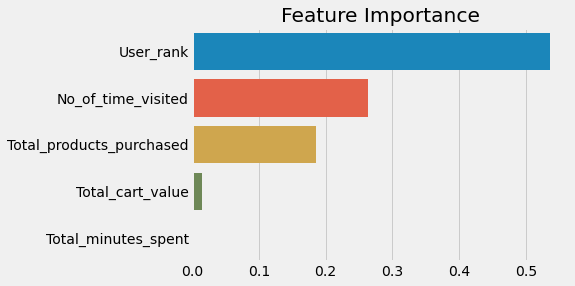

In [310]:
Feature_importance_xgb = pd.Series(data = xbg_tuned.feature_importances_, 
                               index=['Total_minutes_spent',
                                      'No_of_time_visited',
                                      'Total_cart_value',
                                      'Total_products_purchased',
                                      'User_rank']).sort_values(ascending=False)
plt.title("Feature Importance")
sns.barplot(y=Feature_importance_xgb.index,x=Feature_importance_xgb.values,orient ='h')

### Model Evaluation 

In [311]:
model_metric = pd.concat([xgb_metric,rf_model_metric],ignore_index=True)
model_metric

,Model,RMSE,MAE,R2_score
0,xgb_tuned_train,0.003521,0.000012,0.999981
1,xgb_tuned_test,0.133235,0.017752,0.975729
2,xgb_train,0.003521,0.000012,0.999981
3,xgb_test,0.133235,0.017752,0.975729
4,RandomForest_train,0.013958,0.000195,0.999700
5,RandomForest_test,0.128483,0.016508,0.977429
6,RandomForest_tuned_train,0.020894,0.000437,0.999328
7,RandomForest_tuned,0.131411,0.017269,0.976389


In [314]:
model_metric.sort_values(by='RMSE',ascending=True)

,Model,RMSE,MAE,R2_score
0,xgb_tuned_train,0.003521,0.000012,0.999981
2,xgb_train,0.003521,0.000012,0.999981
4,RandomForest_train,0.013958,0.000195,0.999700
6,RandomForest_tuned_train,0.020894,0.000437,0.999328
5,RandomForest_test,0.128483,0.016508,0.977429
7,RandomForest_tuned,0.131411,0.017269,0.976389
1,xgb_tuned_test,0.133235,0.017752,0.975729
3,xgb_test,0.133235,0.017752,0.975729


## Conclusion

    - Data is trained with Random forest and XGBoost.
    - Accuracy achieved – 99% with training data
		                - 97% with test data
    - We still see overfitting in the data 


## Future Improvements:
 - Need to find more features
 - Gather more data
 - Try with different hyperparameters.


##  Thank you